# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1125]:
# Importing necessary libraries


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display
from matplotlib.ticker import MaxNLocator

# this will help in making the Python code more structured automatically (good coding practice)
!pip install black[jupyter] --quiet

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed roles
pd.set_option("display.max_rows", 100)

custom = {"axes.edgecolor": "purple", "grid.linestyle": "solid", "grid.color": "black"}
sns.set_style("dark", rc=custom)

pd.set_option("display.float_format", lambda x: "{:.2f}".format(x))

%matplotlib inline

## Loading the dataset

In [1126]:
# let colab access my google drive
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1127]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/Python_Course/Project_3/used_device_data.csv")

!black /content/drive/MyDrive/Python_Course/Project_3/'SLF_Project_LearnerNotebook_FullCode.ipynb'

reformatted /content/drive/MyDrive/Python_Course/Project_3/SLF_Project_LearnerNotebook_FullCode.ipynb

All done! ✨ 🍰 ✨
1 file reformatted.


## Data Overview

- Observations
- Sanity checks

In [1128]:
# returns the first 5 rows
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no           13.00   
1      Honor  Android        17.30  yes  yes           13.00   
2      Honor  Android        16.69  yes  yes           13.00   
3      Honor  Android        25.50  yes  yes           13.00   
4      Honor  Android        15.32  yes   no           13.00   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0              5.00       64.00 3.00  3020.00  146.00          2020   
1             16.00      128.00 8.00  4300.00  213.00          2020   
2              8.00      128.00 8.00  4200.00  213.00          2020   
3              8.00       64.00 6.00  7250.00  480.00          2020   
4              8.00       64.00 3.00  5000.00  185.00          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                   4.31                  4.72  
1        325                   5.16                  5.52  
2        162                   5.11                  5.88  
3        345                   5.14                  5.63  
4        293                   4.39                  4.95

In [1129]:
# View a random sample
df.sample(n=10, random_state=1)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
866      Others  Android        15.24   no  no            8.00   
957      Celkon  Android        10.16   no  no            3.15   
280     Infinix  Android        15.39  yes  no             NaN   
2150       Oppo  Android        12.83  yes  no           13.00   
93           LG  Android        15.29  yes  no           13.00   
1040     Gionee  Android        12.83  yes  no           13.00   
3170        ZTE   Others        10.16   no  no            3.15   
2742       Sony  Android        12.70  yes  no           20.70   
102       Meizu  Android        15.29  yes  no             NaN   
1195        HTC  Android        10.29   no  no            8.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
866               2.00       16.00 4.00  3000.00  206.00          2014   
957               0.30      512.00 0.25  1400.00  140.00          2013   
280               8.00       32.00 2.00  5000.00  185.00          2020   
2150             16.00       64.00 4.00  3200.00  148.00          2017   
93                5.00       32.00 3.00  3500.00  179.00          2019   
1040              8.00       32.00 4.00  3150.00  166.00          2016   
3170              5.00       16.00 4.00  1400.00  125.00          2014   
2742              2.00       16.00 4.00  3000.00  170.00          2013   
102              20.00      128.00 6.00  3600.00  165.00          2019   
1195              2.00       32.00 4.00  2000.00  146.00          2015   

      days_used  normalized_used_price  normalized_new_price  
866         632                   4.04                  5.19  
957         637                   2.80                  3.88  
280         329                   4.37                  4.49  
2150        648                   4.68                  5.64  
93          216                   4.52                  5.30  
1040        970                   4.65                  5.63  
3170       1007                   3.76                  4.24  
2742       1060                   4.42                  5.80  
102         332                   4.96                  6.04  
1195        892                   4.23                  4.88

In [1130]:
# Checking shape of the data (rows by columns)
df.shape

print("There are", df.shape[0], "rows and", df.shape[1], "columns in the data frame.")
print()

# Use info() to print a concise summary of the DataFrame
df.info()

(3454, 15)

There are 3454 rows and 15 columns in the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  n

**Observations:**

There are 3454 rows and 15 columns in the data frame.<br>
brand_name, os, 4g, and 5g have a Dtype of oject. These need converted to categorical variables. <br>
screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, normalized_used_price, and normalized_new_price have a Dtype of float. <br>
release_year and days_used have a Dtype of integer.<br>
main_camera_mp, int_memory, ram, selfie_camera_mp, battery, and weight columns have missing values. <br>


In [1131]:
# Copy data to avoid any changes to original date
df2 = df.copy()

In [1132]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# converting 'brand_name', 'os', '4g', and 5g into categorical data

for col in ["brand_name", "os", "4g", "5g"]:
    df2[col] = df2[col].astype("category")

# Use info() to print a concise summary of the DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

**Observations:**

All variable type are now correct and the memory usage has decreased 116 kb.

## Exploratory Data Analysis (EDA) and Data Prepocessing

Exploratory Data Analysis
- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Data Preprocessing
- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [1133]:
# shows statistical information
df2.describe(include="all").T

count unique      top  freq    mean     std     min  \
brand_name               3454     34   Others   502     NaN     NaN     NaN   
os                       3454      4  Android  3214     NaN     NaN     NaN   
screen_size           3454.00    NaN      NaN   NaN   13.71    3.81    5.08   
4g                       3454      2      yes  2335     NaN     NaN     NaN   
5g                       3454      2       no  3302     NaN     NaN     NaN   
main_camera_mp        3275.00    NaN      NaN   NaN    9.46    4.82    0.08   
selfie_camera_mp      3452.00    NaN      NaN   NaN    6.55    6.97    0.00   
int_memory            3450.00    NaN      NaN   NaN   54.57   84.97    0.01   
ram                   3450.00    NaN      NaN   NaN    4.04    1.37    0.02   
battery               3448.00    NaN      NaN   NaN 3133.40 1299.68  500.00   
weight                3447.00    NaN      NaN   NaN  182.75   88.41   69.00   
release_year          3454.00    NaN      NaN   NaN 2015.97    2.30 2013.00   
days_used             3454.00    NaN      NaN   NaN  674.87  248.58   91.00   
normalized_used_price 3454.00    NaN      NaN   NaN    4.36    0.59    1.54   
normalized_new_price  3454.00    NaN      NaN   NaN    5.23    0.68    2.90   

                          25%     50%     75%     max  
brand_name                NaN     NaN     NaN     NaN  
os                        NaN     NaN     NaN     NaN  
screen_size             12.70   12.83   15.34   30.71  
4g                        NaN     NaN     NaN     NaN  
5g                        NaN     NaN     NaN     NaN  
main_camera_mp           5.00    8.00   13.00   48.00  
selfie_camera_mp         2.00    5.00    8.00   32.00  
int_memory              16.00   32.00   64.00 1024.00  
ram                      4.00    4.00    4.00   12.00  
battery               2100.00 3000.00 4000.00 9720.00  
weight                 142.00  160.00  185.00  855.00  
release_year          2014.00 2015.50 2018.00 2020.00  
days_used              533.50  690.50  868.75 1094.00  
normalized_used_price    4.03    4.41    4.76    6.62  
normalized_new_price     4.79    5.25    5.67    7.85

**Observations:**

Brand_name has 34 unique values <br>
os has 4 unique values <br>
4g and 5g have 2 unique valaues (yes, no) <br>
release_year ranges from 2013 to 2020 <br>
days_used ranges from 91 days to 1094 days <br>
battery ranges from 500 to 9720 <br>
weight ranges from 69 to 855 <br>
rams range from 0.02 to 12


In [1134]:
# Identifies columns that have missing information
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [1135]:
# Breakout of release_year in the data
df2["release_year"].value_counts()

release_year
2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: count, dtype: int64

In [1136]:
# Breakout of os in the data
df2["os"].value_counts()

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

There are 4 types of os in the data. <br>
Most of the data shows the os is Android.

In [1137]:
# Breakout of brand names in the data
df2["brand_name"].value_counts()

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Vivo          117
Micromax      117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Microsoft      22
OnePlus        22
Coolpad        22
BlackBerry     22
Google         15
Infinix        10
Name: count, dtype: int64

There are 34 different brands in the data.

In [1138]:
# checking for unique values
df2.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

Will need to look if the os or the brand name should be dropped since all brand names will be one of the os. <br>

**Missing Values**

**Missing Main Camera Megapixels**

In [1139]:
# Explore missing values from Main camera pixels
missing_main_camera = df2[df2["main_camera_mp"].isnull()]
missing_main_camera.head()
print()

# What os have missing values
missing_main_camera["os"].value_counts()
print()

# What brand names have missing data
missing_main_camera["brand_name"].value_counts()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59    Infinix  Android        17.32  yes  no             NaN   
60    Infinix  Android        15.39  yes  no             NaN   
61    Infinix  Android        15.39  yes  no             NaN   
62    Infinix  Android        15.39  yes  no             NaN   
63    Infinix  Android        15.29  yes  no             NaN   

    selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59              8.00       32.00 2.00  6000.00  209.00          2020   
60              8.00       64.00 4.00  5000.00  185.00          2020   
61              8.00       32.00 2.00  5000.00  185.00          2020   
62             16.00       32.00 3.00  4000.00  178.00          2019   
63             16.00       32.00 2.00  4000.00  165.00          2019   

    days_used  normalized_used_price  normalized_new_price  
59        245                   4.28                  4.60  
60        173                   4.36                  4.71  
61        256                   4.18                  4.51  
62        316                   4.56                  4.60  
63        468                   4.42                  4.87

os
Android    179
Others       0
Windows      0
iOS          0
Name: count, dtype: int64

brand_name
Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Honor          0
Apple          0
XOLO           0
Spice          0
Samsung        0
Celkon         0
Others         0
Gionee         0
Huawei         0
Nokia          0
Google         0
Microsoft      0
Micromax       0
Alcatel        0
Lenovo         0
LG             0
Karbonn        0
HTC            0
Acer           0
Name: count, dtype: int64

179 Androids have missing main camera megapixels data. <br>
15 brands of the Androids have missing main camera megapixels data.

**Missing Selfie Camera Megapixels**

In [1140]:
# Explore missing values from Selfie camera pixels
missing_selfie_camera = df2[df2["selfie_camera_mp"].isnull()]
missing_selfie_camera.head()
print()

# What os have missing values
missing_selfie_camera["os"].value_counts()
print()

# What brand names have missing data
missing_selfie_camera["brand_name"].value_counts()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android        15.32  yes  no           12.20   
1081     Google  Android        12.83  yes  no           12.20   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1080               NaN       64.00 4.00  3430.00  184.00          2018   
1081               NaN       64.00 4.00  2915.00  148.00          2018   

      days_used  normalized_used_price  normalized_new_price  
1080        475                   5.57                  6.87  
1081        424                   4.46                  6.75

os
Android    2
Others     0
Windows    0
iOS        0
Name: count, dtype: int64

brand_name
Google        2
Realme        0
Motorola      0
Nokia         0
OnePlus       0
Oppo          0
Others        0
Panasonic     0
Acer          0
Micromax      0
Samsung       0
Sony          0
Spice         0
Vivo          0
XOLO          0
Xiaomi        0
Microsoft     0
Meizu         0
Alcatel       0
Lenovo        0
Lava          0
LG            0
Karbonn       0
Infinix       0
Huawei        0
Honor         0
HTC           0
Gionee        0
Coolpad       0
Celkon        0
BlackBerry    0
Asus          0
Apple         0
ZTE           0
Name: count, dtype: int64

Only 2 Google Androids have missing selfie camera megapixels data.

**Missing Internal Memory**

In [1141]:
# Explore missing values from Internal Memory
missing_int_memory = df2[df2["int_memory"].isnull()]
missing_int_memory.head()
print()

# What os have missing values
missing_int_memory["os"].value_counts()
print()

# What brand names have missing data
missing_int_memory["brand_name"].value_counts()

brand_name      os  screen_size   4g  5g  main_camera_mp  \
117       Nokia  Others         5.18  yes  no            0.30   
2035      Nokia  Others         5.18   no  no            5.00   
2064      Nokia  Others         5.18   no  no            0.30   
2092      Nokia  Others         7.62   no  no            5.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
117               0.00         NaN 0.02  1200.00   86.50          2019   
2035              0.00         NaN 0.03  1020.00  157.00          2019   
2064              0.00         NaN 0.02  1100.00   78.40          2015   
2092              0.00         NaN 0.02  1010.00  100.00          2013   

      days_used  normalized_used_price  normalized_new_price  
117         234                   2.72                  3.69  
2035        501                   2.34                  3.42  
2064        559                   2.59                  3.38  
2092       1043                   3.54                  4.37

os
Others     4
Android    0
Windows    0
iOS        0
Name: count, dtype: int64

brand_name
Nokia         4
Acer          0
Panasonic     0
Microsoft     0
Motorola      0
OnePlus       0
Oppo          0
Others        0
Realme        0
Alcatel       0
Samsung       0
Sony          0
Spice         0
Vivo          0
XOLO          0
Xiaomi        0
Micromax      0
Meizu         0
Lenovo        0
Lava          0
LG            0
Karbonn       0
Infinix       0
Huawei        0
Honor         0
HTC           0
Google        0
Gionee        0
Coolpad       0
Celkon        0
BlackBerry    0
Asus          0
Apple         0
ZTE           0
Name: count, dtype: int64

4 Nokias are missing internal memory (ROM) in gb data.

**Missing Ram**

In [1142]:
# Explore missing values from Ram
missing_ram = df2[df2["ram"].isnull()]
missing_ram.head()
print()

# What os have missing values
missing_ram["os"].value_counts()
print()

# What brand names have missing data
missing_ram["brand_name"].value_counts()

brand_name      os  screen_size  4g  5g  main_camera_mp  \
114       Nokia  Others         5.18  no  no            0.30   
335       Nokia  Others         5.18  no  no            0.30   
2059      Nokia  Others         5.18  no  no            0.30   
2090      Nokia  Others         7.62  no  no            5.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
114               0.00        0.06  NaN  1020.00   91.30          2020   
335               0.00        0.10  NaN  1200.00   88.20          2020   
2059              0.00        0.06  NaN      NaN   82.60          2016   
2090              0.00        0.06  NaN  1200.00  111.40          2013   

      days_used  normalized_used_price  normalized_new_price  
114         288                   2.73                  2.91  
335         327                   3.06                  3.69  
2059       1023                   2.77                  3.66  
2090       1001                   3.83                  4.61

os
Others     4
Android    0
Windows    0
iOS        0
Name: count, dtype: int64

brand_name
Nokia         4
Acer          0
Panasonic     0
Microsoft     0
Motorola      0
OnePlus       0
Oppo          0
Others        0
Realme        0
Alcatel       0
Samsung       0
Sony          0
Spice         0
Vivo          0
XOLO          0
Xiaomi        0
Micromax      0
Meizu         0
Lenovo        0
Lava          0
LG            0
Karbonn       0
Infinix       0
Huawei        0
Honor         0
HTC           0
Google        0
Gionee        0
Coolpad       0
Celkon        0
BlackBerry    0
Asus          0
Apple         0
ZTE           0
Name: count, dtype: int64

4 Nokias are missing ram data.

**Missing Battery**

In [1143]:
# Explore missing values from Battery
missing_battery = df2[df2["battery"].isnull()]
missing_battery.head()
print()

# What os have missing values
missing_battery["os"].value_counts()
print()

# What brand names have missing data
missing_battery["brand_name"].value_counts()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1829      Meizu  Android        12.83  yes  no           13.00   
1831      Meizu  Android        12.83  yes  no           20.70   
1832      Meizu  Android        13.61  yes  no           20.70   
1962  Microsoft  Windows        25.55   no  no            5.00   
2058      Nokia   Others         5.18   no  no            0.30   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
1829              5.00       16.00 4.00      NaN  145.00          2014   
1831              5.00       16.00 4.00      NaN  158.00          2014   
1832              2.00       16.00 4.00      NaN  147.00          2014   
1962              3.50       32.00 4.00      NaN  675.90          2013   
2058              0.00        0.06 0.02      NaN   81.00          2016   

      days_used  normalized_used_price  normalized_new_price  
1829        986                   4.18                  4.86  
1831       1043                   4.88                  5.99  
1832       1007                   4.74                  5.83  
1962        931                   5.23                  5.80  
2058        815                   2.72                  3.37

os
Android    3
Others     2
Windows    1
iOS        0
Name: count, dtype: int64

brand_name
Meizu         3
Nokia         2
Microsoft     1
Panasonic     0
Motorola      0
OnePlus       0
Oppo          0
Others        0
Realme        0
Alcatel       0
Samsung       0
Sony          0
Spice         0
Vivo          0
XOLO          0
Xiaomi        0
Micromax      0
Acer          0
Lenovo        0
Lava          0
LG            0
Karbonn       0
Infinix       0
Huawei        0
Honor         0
HTC           0
Google        0
Gionee        0
Coolpad       0
Celkon        0
BlackBerry    0
Asus          0
Apple         0
ZTE           0
Name: count, dtype: int64

Meizu, Nokia and Microsoft all have missing battery data.<br>
They are all on different os.

**Missing Weight**

In [1144]:
# Explore missing values from Weight
missing_weight = df2[df2["weight"].isnull()]
missing_weight.head()
print()

# What os have missing values
missing_weight["os"].value_counts()
print()

# What brand names have missing data
missing_weight["brand_name"].value_counts()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android        12.70  yes  no           13.00   
3003       XOLO  Android        12.83  yes  no            8.00   
3004       XOLO  Android        12.70   no  no            8.00   
3005       XOLO  Android        10.29   no  no            5.00   
3006       XOLO  Android        12.70   no  no            5.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3002              5.00       32.00 4.00  2400.00     NaN          2015   
3003              5.00       16.00 4.00  3200.00     NaN          2015   
3004              2.00       32.00 4.00  2100.00     NaN          2015   
3005              0.30       32.00 4.00  1800.00     NaN          2015   
3006              0.30       16.00 4.00  2500.00     NaN          2015   

      days_used  normalized_used_price  normalized_new_price  
3002        576                   4.17                  4.93  
3003        800                   4.28                  5.19  
3004        878                   3.88                  4.08  
3005       1036                   3.82                  4.40  
3006        679                   3.84                  4.35

os
Android    6
Windows    1
Others     0
iOS        0
Name: count, dtype: int64

brand_name
XOLO          7
Acer          0
Panasonic     0
Microsoft     0
Motorola      0
Nokia         0
OnePlus       0
Oppo          0
Others        0
Realme        0
Alcatel       0
Samsung       0
Sony          0
Spice         0
Vivo          0
Xiaomi        0
Micromax      0
Meizu         0
Lenovo        0
Lava          0
LG            0
Karbonn       0
Infinix       0
Huawei        0
Honor         0
HTC           0
Google        0
Gionee        0
Coolpad       0
Celkon        0
BlackBerry    0
Asus          0
Apple         0
ZTE           0
Name: count, dtype: int64

There are 7 XOLO this is missing weight data. <br>
6 showing an OS and 1 shows a Windows os. <br>
This should be checked to see if the 7 phone really has a Windows os.

**Observations:**

Most of the missing data is on Androids.<br>
19 Brands have missing data. <br>
Need to decide if os or brand name is not necessary. Will test this to see which one should be dropped.<br>
Most of the data is on Androids implying more Androids are refurbished that any other os.


**Update Main Camera Megapixels**

In [1145]:
# Create a groupby for brand name, os and main camera mp and calculate the median for non NaN main camera mp
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(
    value=df2.groupby(["os", "brand_name"])["main_camera_mp"].transform("median")
)
df2

# Researched the main camera mp on an Infinx phone and it is 108 mp
# Replace NaN with 108
infinix_main_camera_mp = df2["brand_name"] == "Infinix"
df2.loc[infinix_main_camera_mp, "main_camera_mp"] = 108

# See if there are missing values still
df2["main_camera_mp"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

**Update Selfie Camera Megapixels**

In [1146]:
# Create a groupby for brand name, os and selfie camera mp and calculate the median for non NaN selfie camera mp
df2["selfie_camera_mp"] = df2["selfie_camera_mp"].fillna(
    value=df2.groupby(["os", "brand_name"])["selfie_camera_mp"].transform("median")
)
df2

# See if there is still missing values
df2["selfie_camera_mp"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

**Update Internal Memory**

In [1147]:
# Create a groupby for brand name, os, release year and int memory and calculate the median for non NaN int memory
df2["int_memory"] = df2["int_memory"].fillna(
    value=df2.groupby(["os", "brand_name", "release_year"])["int_memory"].transform(
        "median"
    )
)
df2

# See if there is still missing values
df2["int_memory"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

**Update Ram**

In [1148]:
# Create a groupby for brand name, os, release year and ram and calculate the median for non NaN int memory
df2["ram"] = df2["ram"].fillna(
    value=df2.groupby(["os", "brand_name", "release_year"])["ram"].transform("median")
)
df2

# See if there is still missing values
df2["ram"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

**Update Battery**

In [1149]:
# Create a groupby for brand name, os and battery and calculate the median for non NaN main camera mp
df2["battery"] = df2["battery"].fillna(
    value=df2.groupby(["os", "brand_name"])["battery"].transform("median")
)
df2

# See if there is still missing values
df2["battery"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

**Update Weight**

In [1150]:
# Create a groupby for brand name, os and weight and calculate the median for non NaN main camera mp
df2["weight"] = df2["weight"].fillna(
    value=df2.groupby(["os", "brand_name"])["weight"].transform("median")
)
df2

# See if there is still missing values
df2["weight"].isnull().sum()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                 5.00       64.00 3.00  3020.00  146.00          2020   
1                16.00      128.00 8.00  4300.00  213.00          2020   
2                 8.00      128.00 8.00  4200.00  213.00          2020   
3                 8.00       64.00 6.00  7250.00  480.00          2020   
4                 8.00       64.00 3.00  5000.00  185.00          2020   
...                ...         ...  ...      ...     ...           ...   
3449              8.00       64.00 6.00  5000.00  190.00          2019   
3450              8.00      128.00 8.00  4000.00  200.00          2018   
3451              5.00       32.00 3.00  4000.00  165.00          2020   
3452              5.00       32.00 2.00  4000.00  160.00          2020   
3453              5.00       16.00 2.00  4000.00  168.00          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                   4.31                  4.72  
1           325                   5.16                  5.52  
2           162                   5.11                  5.88  
3           345                   5.14                  5.63  
4           293                   4.39                  4.95  
...         ...                    ...                   ...  
3449        232                   4.49                  6.48  
3450        541                   5.04                  6.25  
3451        201                   4.36                  4.53  
3452        149                   4.35                  4.62  
3453        176                   4.13                  4.28  

[3454 rows x 15 columns]

0

In [1151]:
# Check for missing data
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [1152]:
df2.describe().T

count    mean     std     min     25%     50%     75%  \
screen_size           3454.00   13.71    3.81    5.08   12.70   12.83   15.34   
main_camera_mp        3454.00    9.91    7.11    0.08    5.00   10.00   13.00   
selfie_camera_mp      3454.00    6.56    6.97    0.00    2.00    5.00    8.00   
int_memory            3454.00   54.51   84.94    0.01   16.00   32.00   64.00   
ram                   3454.00    4.03    1.37    0.02    4.00    4.00    4.00   
battery               3454.00 3132.11 1299.43  500.00 2100.00 3000.00 4000.00   
weight                3454.00  182.64   88.36   69.00  142.00  160.00  185.00   
release_year          3454.00 2015.97    2.30 2013.00 2014.00 2015.50 2018.00   
days_used             3454.00  674.87  248.58   91.00  533.50  690.50  868.75   
normalized_used_price 3454.00    4.36    0.59    1.54    4.03    4.41    4.76   
normalized_new_price  3454.00    5.23    0.68    2.90    4.79    5.25    5.67   

                          max  
screen_size             30.71  
main_camera_mp         108.00  
selfie_camera_mp        32.00  
int_memory            1024.00  
ram                     12.00  
battery               9720.00  
weight                 855.00  
release_year          2020.00  
days_used             1094.00  
normalized_used_price    6.62  
normalized_new_price     7.85

In [1153]:
df2.describe(include="category").T  # describe for non-numeric values

count unique      top  freq
brand_name  3454     34   Others   502
os          3454      4  Android  3214
4g          3454      2      yes  2335
5g          3454      2       no  3302

**Univariate Analysis:**

In [1154]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df2, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Creates a combined boxplot and histogram for a given feature in the dataset.

    Args:
        df2: The input dataframe.
        feature (str): The column name for which to create the plot.
        figsize (tuple, optional): Size of the figure (default: (12, 7)).
        kde (bool, optional): Whether to show the density curve (default: False).
        bins (int, optional): Number of bins for the histogram (default: None).

    Returns:
        None (displays the plot)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        figsize=figsize,
        gridspec_kw={"height_ratios": (0.15, 0.85)},
    )

    # Boxplot
    sns.boxplot(data=df2, x=feature, ax=ax_box, showmeans=True, color="#F72585")

    # Histogram
    if bins is None:
        unique_values = df2[feature].unique()
        bins = np.linspace(unique_values.min() - 1, unique_values.max() + 2, num=25)

    sns.histplot(data=df2, x=feature, bins=bins, kde=True, ax=ax_hist)

    # Add mean and median lines
    ax_hist.axvline(df2[feature].mean(), color="purple", linestyle="--", label="Mean")
    ax_hist.axvline(df2[feature].median(), color="blue", linestyle="-", label="Median")

    # Label each bar with its count
    for j, p in enumerate(ax_hist.patches):
        ax_hist.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(1, 10),
            textcoords="offset points",
        )

    ax_hist.legend()
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Frequency")
    ax_hist.set_title(f"Frequency of {feature}")

    plt.tight_layout()

**Screen Size CM**

<Figure size 2000x600 with 0 Axes>

Text(0.5, 43.249999999999986, 'Size of the screen in cm')

screen_size
12.70    575
12.83    409
10.29    219
10.16    188
15.24    129
        ... 
17.40      1
15.82      1
14.53      1
16.15      1
14.81      1
Name: count, Length: 142, dtype: int64

count   3454.00
mean      13.71
std        3.81
min        5.08
25%       12.70
50%       12.83
75%       15.34
max       30.71
Name: screen_size, dtype: float64

<Figure size 2000x600 with 0 Axes>

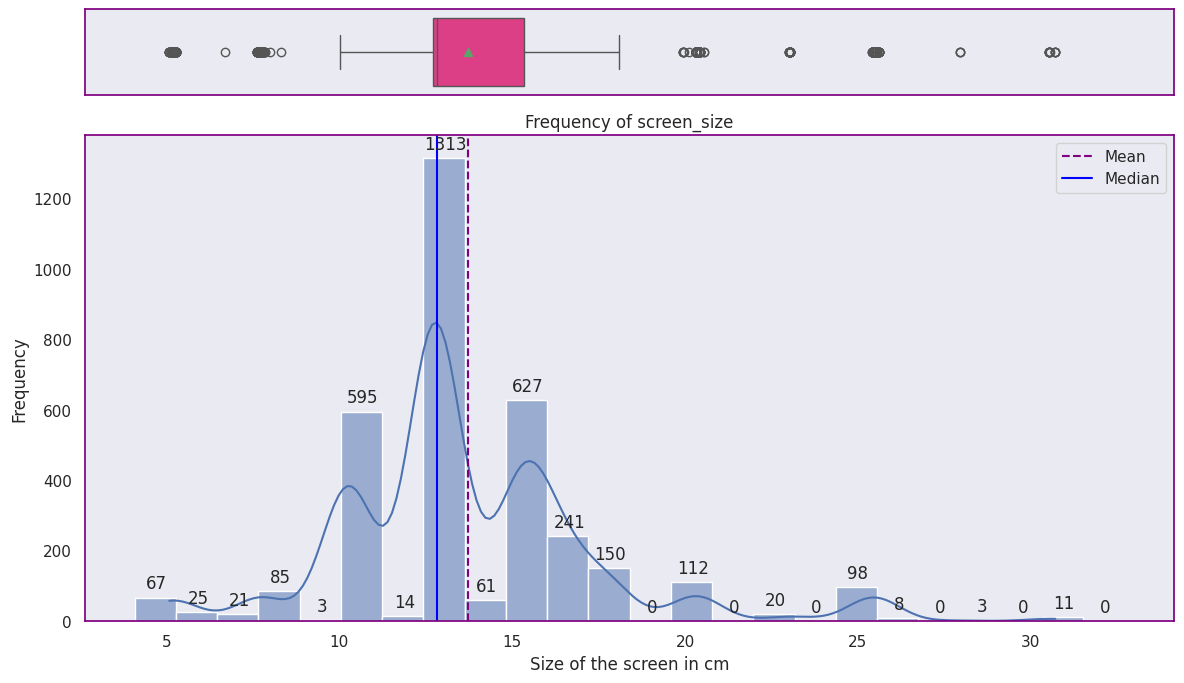

In [1155]:
# Create a figure with a specified size
plt.figure(figsize=(20, 6))

# Plot the histogram and boxplot
histogram_boxplot(df2, "screen_size")

# Set the x-axis label
plt.xlabel("Size of the screen in cm")

df2["screen_size"].value_counts()
print()
df2["screen_size"].describe().T

Distribution is right skewed. <br>
~1321 Devices have an ~ size 13 screen.<br>
There are several outliers.


**Main Camera Megapixels**

Text(0.5, 43.249999999999986, 'Mega Pixels of the Main Camera')

count   3454.00
mean       9.91
std        7.11
min        0.08
25%        5.00
50%       10.00
75%       13.00
max      108.00
Name: main_camera_mp, dtype: float64

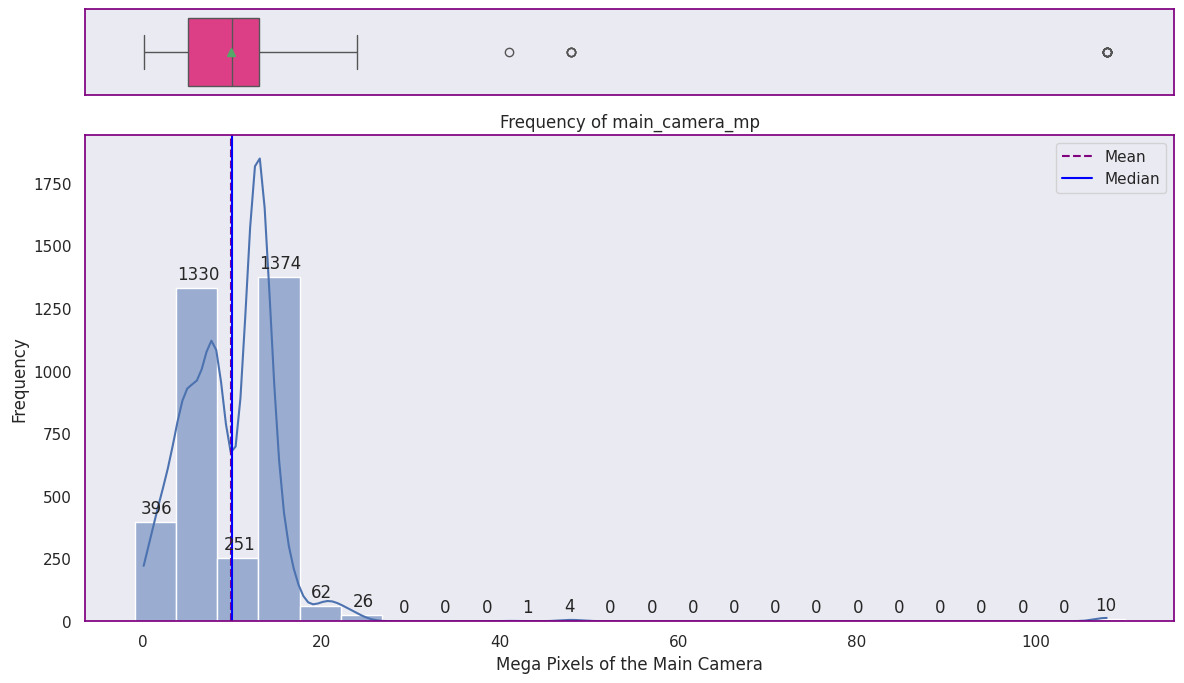

In [1156]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "main_camera_mp")
plt.xlabel("Mega Pixels of the Main Camera")

df2["main_camera_mp"].describe().T

The mean is right under 10.<br>
There are some outliers. <br>
The highest amount of mega pixels is around 15. There are ~1374 devices showing this amount of mega pixels.<br>
Appears to be right skewed.


**Selfie Camera Megapixels**

Text(0.5, 43.249999999999986, 'Mega Pixels of the Selfie Camera')

count   3454.00
mean       6.56
std        6.97
min        0.00
25%        2.00
50%        5.00
75%        8.00
max       32.00
Name: selfie_camera_mp, dtype: float64

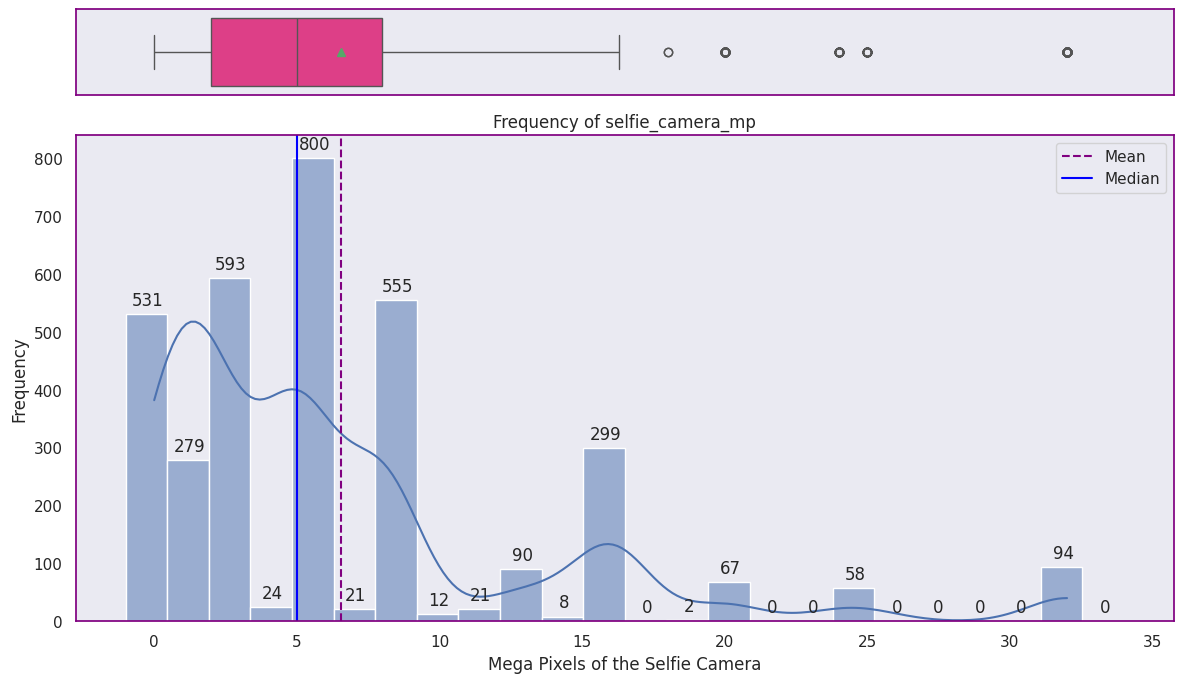

In [1157]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "selfie_camera_mp")
plt.xlabel("Mega Pixels of the Selfie Camera")

df2["selfie_camera_mp"].describe().T

The mean is right under 7.<br>
There are multiple outliers. <br>
The highest amount of mega pixels is around 5. There are little less than 800 devices showing this amount of mega pixels.<br>
Appears to be right skewed.

**Internal Memory**

Text(0.5, 43.249999999999986, 'GB of Internal Memory')

int_memory
16.00      1283
32.00      1083
64.00       509
128.00      372
256.00       86
512.00       44
0.06         20
0.10         19
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: count, dtype: int64

count   3454.00
mean      54.51
std       84.94
min        0.01
25%       16.00
50%       32.00
75%       64.00
max     1024.00
Name: int_memory, dtype: float64

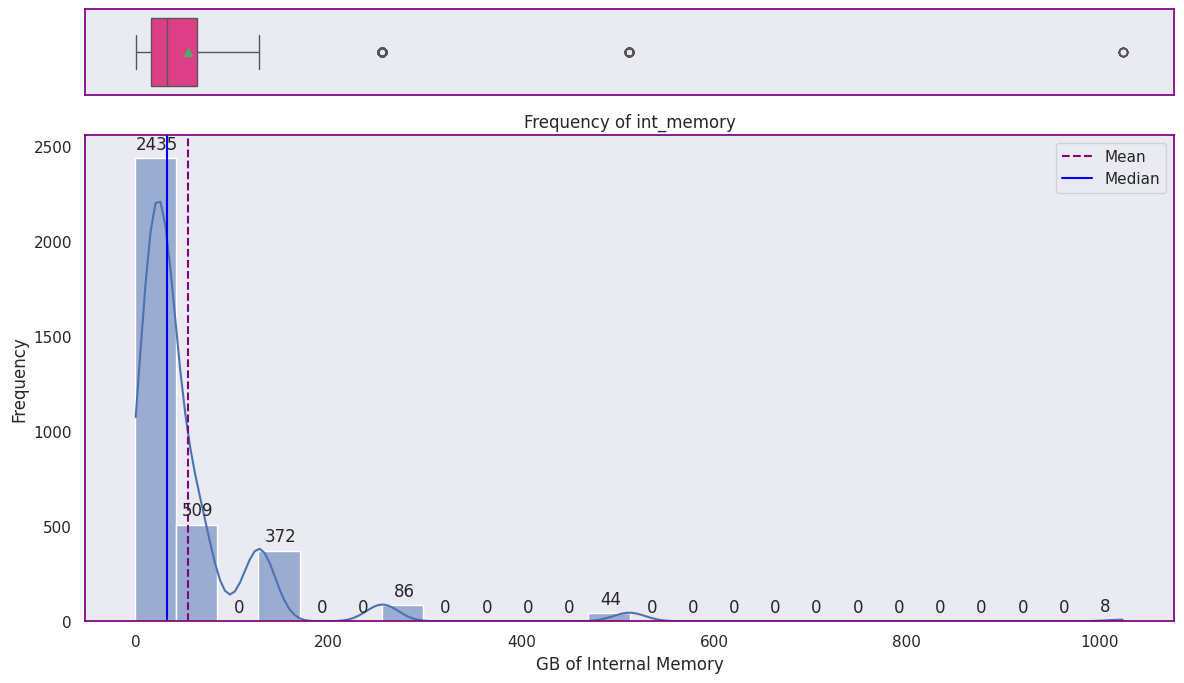

In [1158]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "int_memory")
plt.xlabel("GB of Internal Memory")
df2["int_memory"].value_counts()
print()
df2["int_memory"].describe().T

Very right skewed. <br>
1283 devices have a memory of 16gb and 1083 devices have a memory of 32gb.<br>
There are multiple outliers.

**Ram**

Text(0.5, 43.249999999999986, 'GB of Ram')

ram
4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
0.03       20
0.02       19
12.00      18
0.50        9
1.50        1
Name: count, dtype: int64

count   3454.00
mean       4.03
std        1.37
min        0.02
25%        4.00
50%        4.00
75%        4.00
max       12.00
Name: ram, dtype: float64

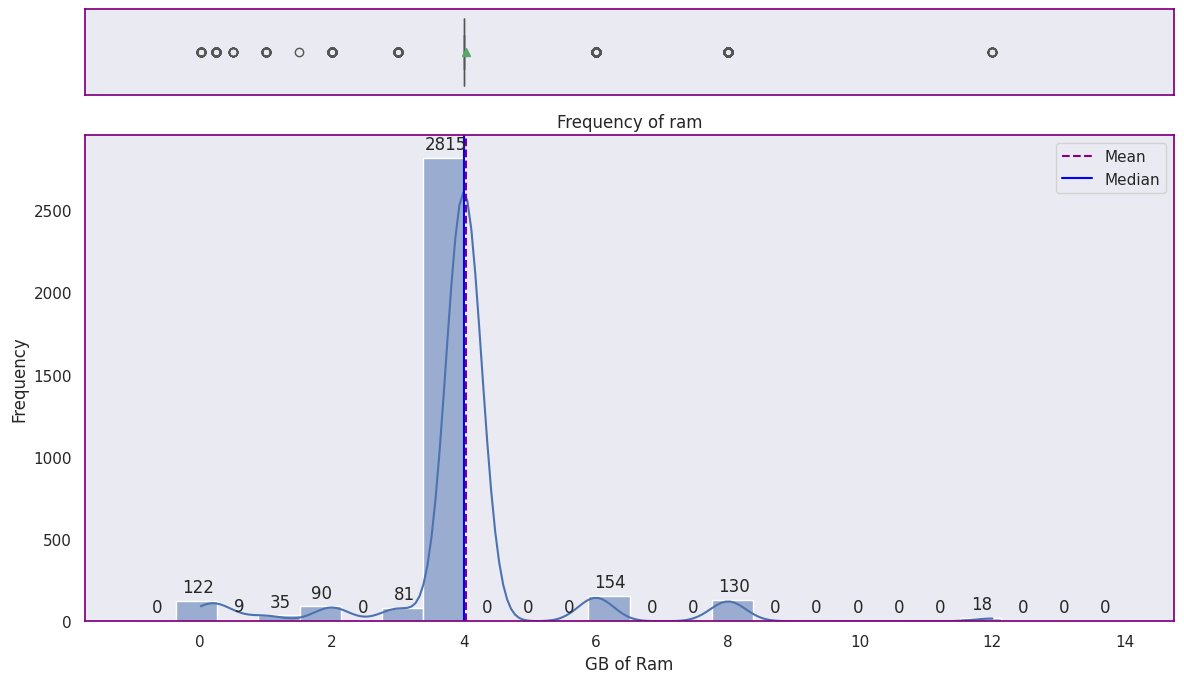

In [1159]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "ram")
plt.xlabel("GB of Ram")
df2["ram"].value_counts()
print()
df2["ram"].describe().T

Most devices are showing ram of 4. There are 2815 devices that have a ram of 4. <br>
As a result there are several outliers. <br>

**Battery**

Text(0.5, 43.249999999999986, 'Energy Capacity of device in mAh')

battery
4000.00    341
3000.00    314
2000.00    244
2500.00    138
2100.00    121
          ... 
6180.00      1
4180.00      1
2180.00      1
2880.00      1
3110.00      1
Name: count, Length: 324, dtype: int64

count   3454.00
mean    3132.11
std     1299.43
min      500.00
25%     2100.00
50%     3000.00
75%     4000.00
max     9720.00
Name: battery, dtype: float64

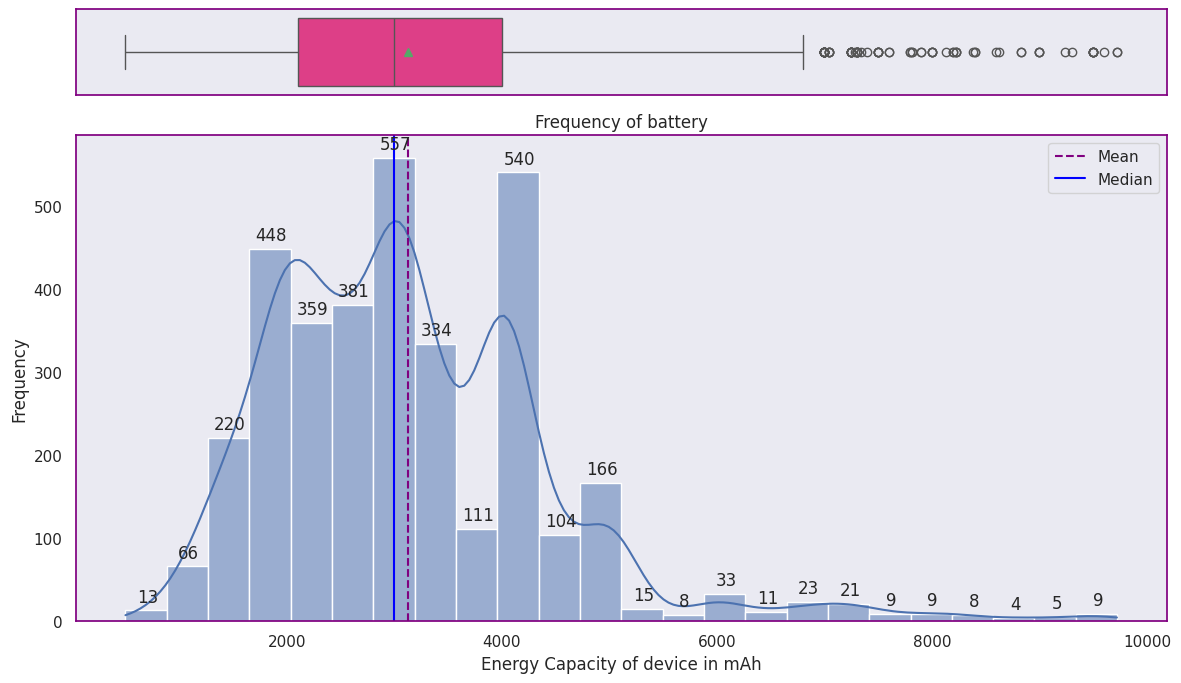

In [1160]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "battery")
plt.xlabel("Energy Capacity of device in mAh")
df2["battery"].value_counts()
print()
df2["battery"].describe().T

There are several outliers. <br>
Distribution is right skewed. <br>
~1002 devices have a battery of 3000 - 4000 mAh.


**Weight**

Text(0.5, 43.249999999999986, 'Weight of device in grams')

weight
150.00    112
140.00     86
160.00     80
155.00     68
145.00     68
         ... 
157.50      1
372.00      1
340.20      1
319.80      1
240.00      1
Name: count, Length: 555, dtype: int64

count   3454.00
mean     182.64
std       88.36
min       69.00
25%      142.00
50%      160.00
75%      185.00
max      855.00
Name: weight, dtype: float64

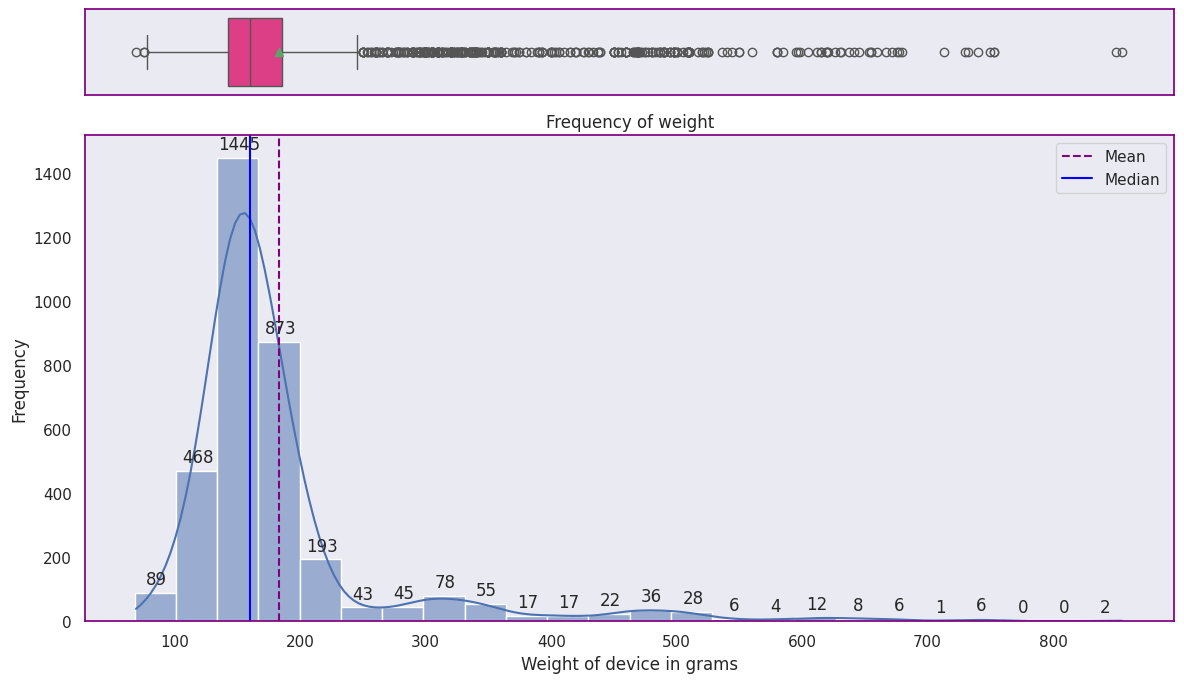

In [1161]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "weight")
plt.xlabel("Weight of device in grams")
df2["weight"].value_counts()
print()
df2["weight"].describe().T

Several outliers <br>
Distribution is right skewed.<br>
Highest percentage of devices have a weight range from 140 - 160 gram.


**Days Used**

Text(0.5, 43.249999999999986, 'Number of days the used/refurbished device has been used')

days_used
578    13
601    13
564    13
682    12
683    12
       ..
245     1
253     1
269     1
307     1
149     1
Name: count, Length: 924, dtype: int64

count   3454.00
mean     674.87
std      248.58
min       91.00
25%      533.50
50%      690.50
75%      868.75
max     1094.00
Name: days_used, dtype: float64

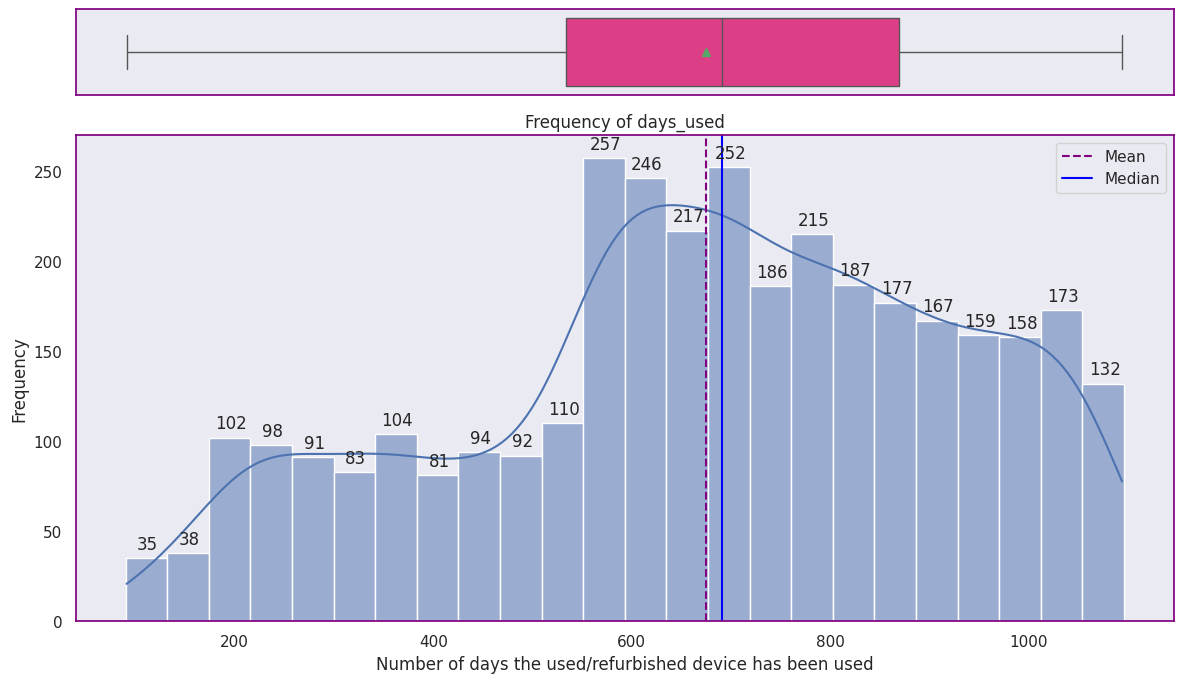

In [1162]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "days_used")
plt.xlabel("Number of days the used/refurbished device has been used")
df2["days_used"].value_counts()
print()
df2["days_used"].describe().T

There are no outliers. <br>
Distribution is left skewed. <br>
Based on the chart ~250 devices were used for ~600 days.

**Normalized New Price**

Text(0.5, 43.249999999999986, 'Normalized price of the new devices in Euros')

normalized_new_price
5.14    6
4.78    5
5.11    4
5.30    4
5.30    4
       ..
4.96    1
4.24    1
4.79    1
6.00    1
4.28    1
Name: count, Length: 2988, dtype: int64

count   3454.00
mean       5.23
std        0.68
min        2.90
25%        4.79
50%        5.25
75%        5.67
max        7.85
Name: normalized_new_price, dtype: float64

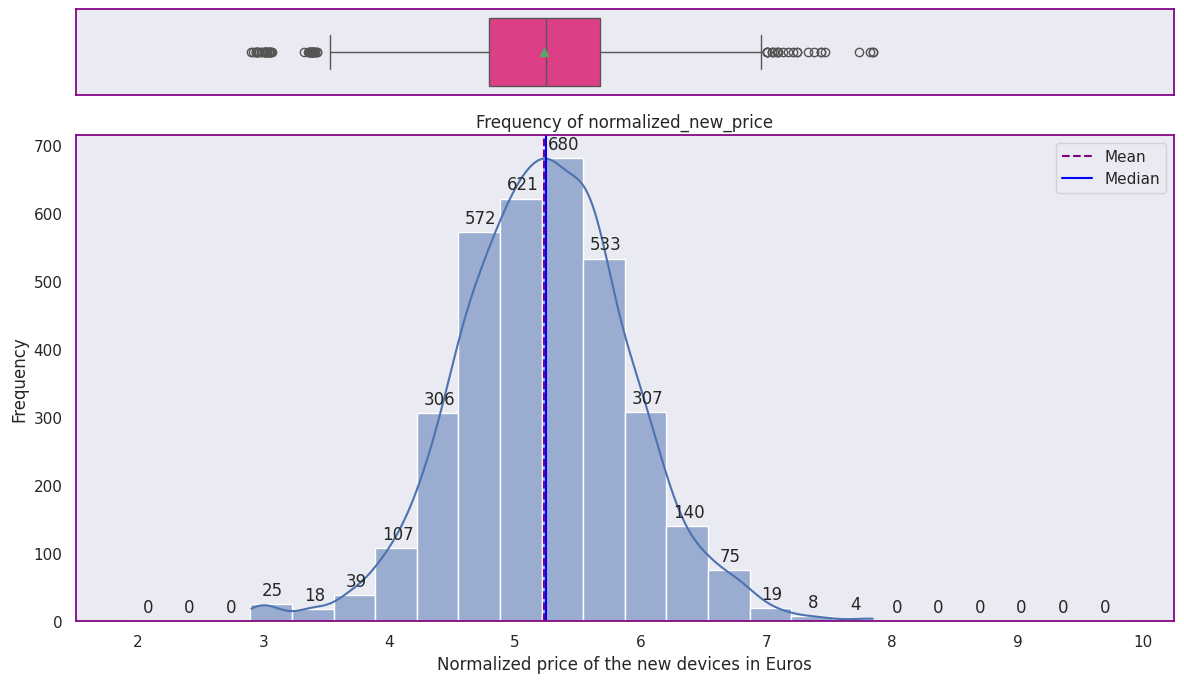

In [1163]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "normalized_new_price")
plt.xlabel("Normalized price of the new devices in Euros")
df2["normalized_new_price"].value_counts()
print()
df2["normalized_new_price"].describe().T

There are several outliers.<br>
Looks to be a normal distribution.<br>
680 devices have ~ a cost of 5.25 Euros.

**Normalized Used Price**

Text(0.5, 43.249999999999986, 'Normalized price of the used devices in Euros')

count   3454.00
mean       4.36
std        0.59
min        1.54
25%        4.03
50%        4.41
75%        4.76
max        6.62
Name: normalized_used_price, dtype: float64

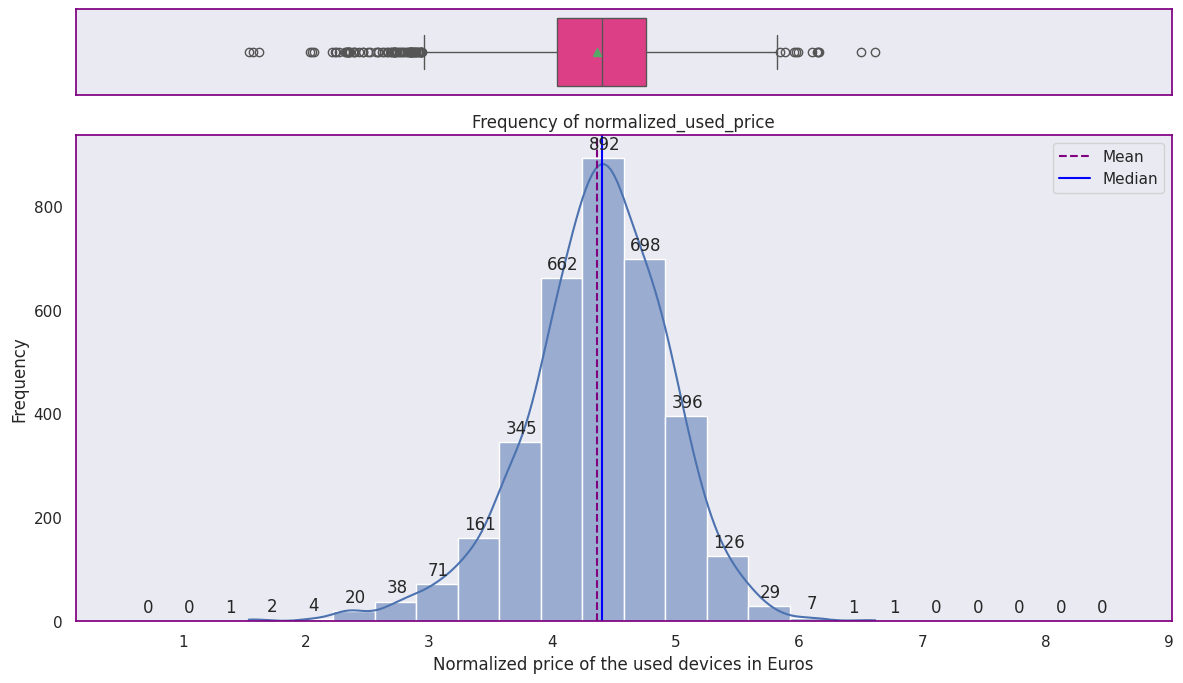

In [1164]:
# Plot the histogram and boxplot
histogram_boxplot(df2, "normalized_used_price")
plt.xlabel("Normalized price of the used devices in Euros")
print()
df2["normalized_used_price"].describe().T

**1.	What does the distribution of normalized used device prices look like?**

There are several outliers.<br>
Looks to be a normal distribution.<br>
Majority of the devices have a cost between 3.5 and 5.5 Euros.

**Categorical Variables**

In [1165]:
# function to create labeled barplots


def labeled_barplot(df2, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    df2: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,  # Assign the x variable to hue
        palette="cubehelix",  # Set the hue to the same variable
        legend=False,  # Disable the legend
        order=df2[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with its count and percentage
    for p in ax.patches:
        prc = "{:.1f}%".format(100.0 * p.get_height() / total)  # percentage
        cnt = p.get_height()  # count
        xx = p.get_x() + p.get_width() / 2  # x coordinate of bar percentage label
        yy = p.get_height()  # y coordinate of bar percentage label

        # Annotate percentage
        ax.annotate(
            prc,
            (xx, yy),
            ha="center",
            va="center",
            style="italic",
            size=12,
            xytext=(0, 10),
            textcoords="offset points",
        )

        # Annotate count (adjust vertical position)
        ax.annotate(
            cnt,
            (xx, yy + 5),
            ha="center",
            va="bottom",  # Adjusted to display above the percentage label
            size=12,
            xytext=(0, 20),
            textcoords="offset points",
        )

    # Increase y-axis size by 100
    plt.ylim(0, ax.get_ylim()[1] + 100)

**Brand Name**

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


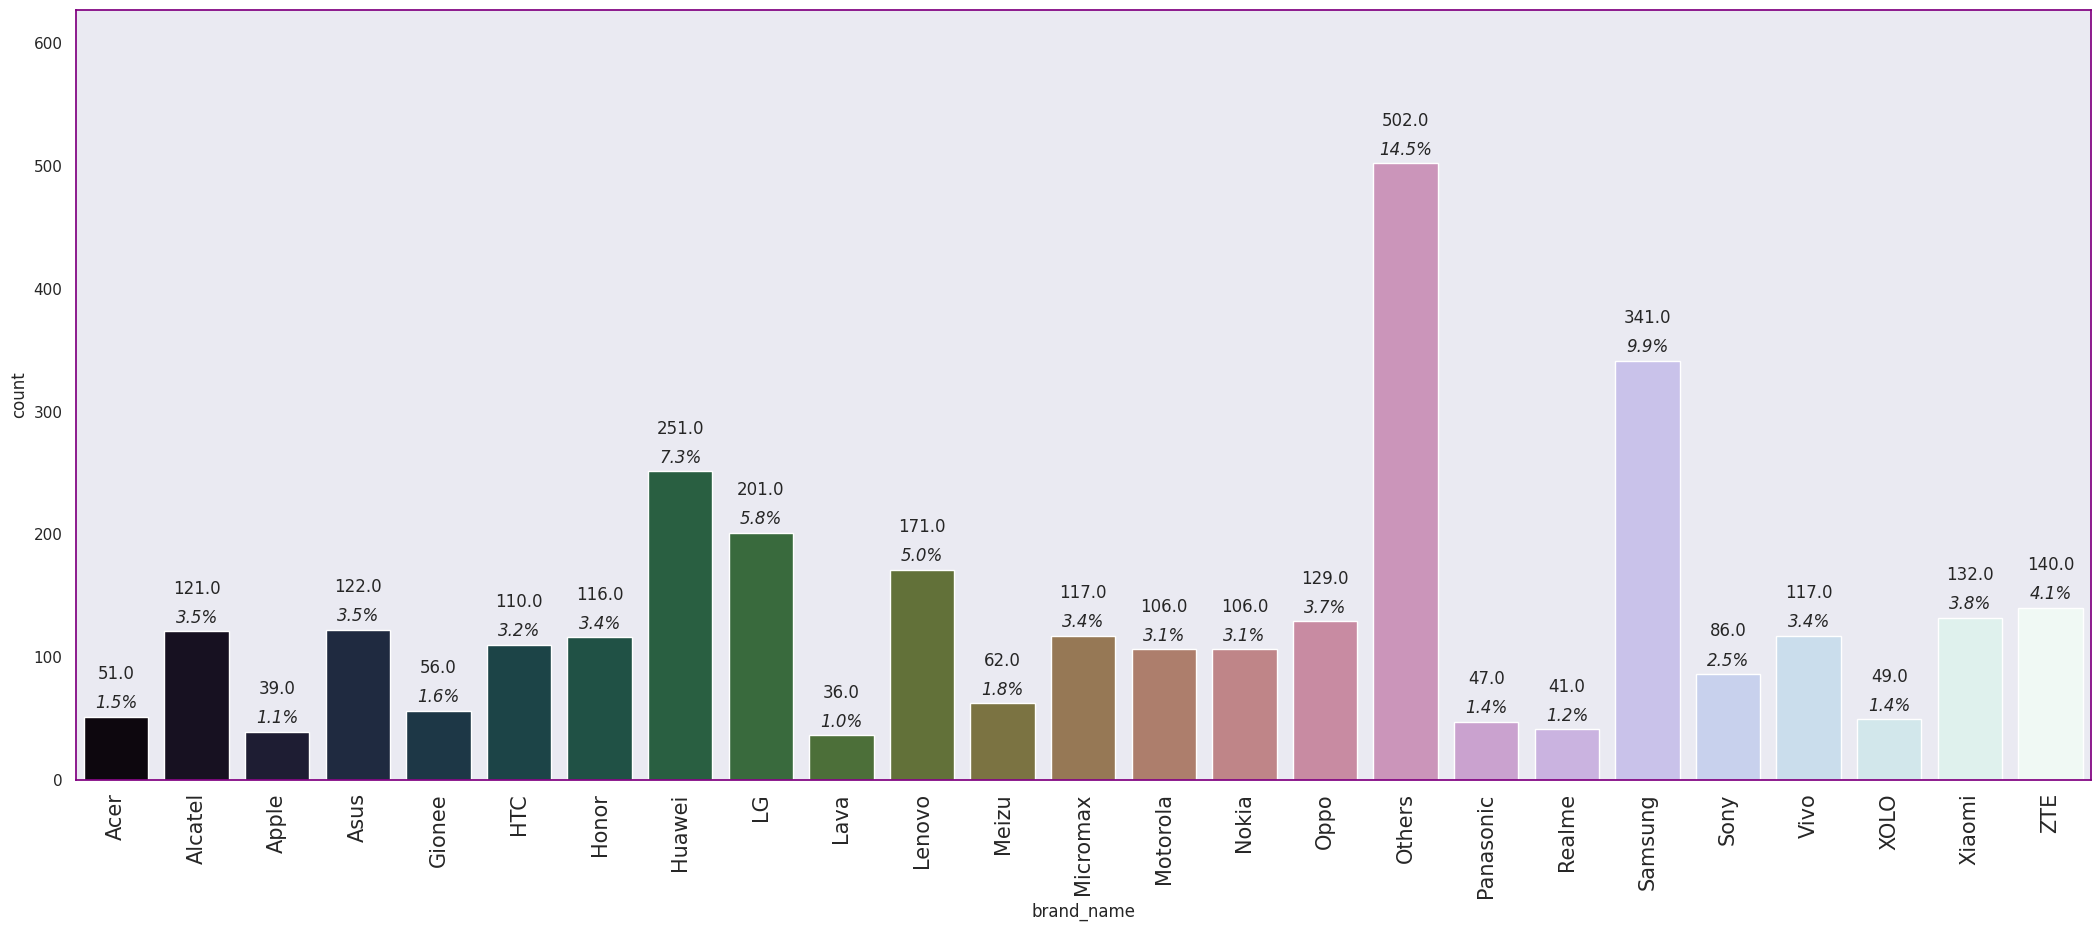

In [1166]:
# Labeled barplot for brand name
labeled_barplot(df, "brand_name", perc=True, n=25)

502 devices (14.5%) brand is coded as Others. <br>
The next highest device count is for brand name Samsung. Samusung has 341 devices and makes up 9.9% of all the devices.

**Release Year**

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


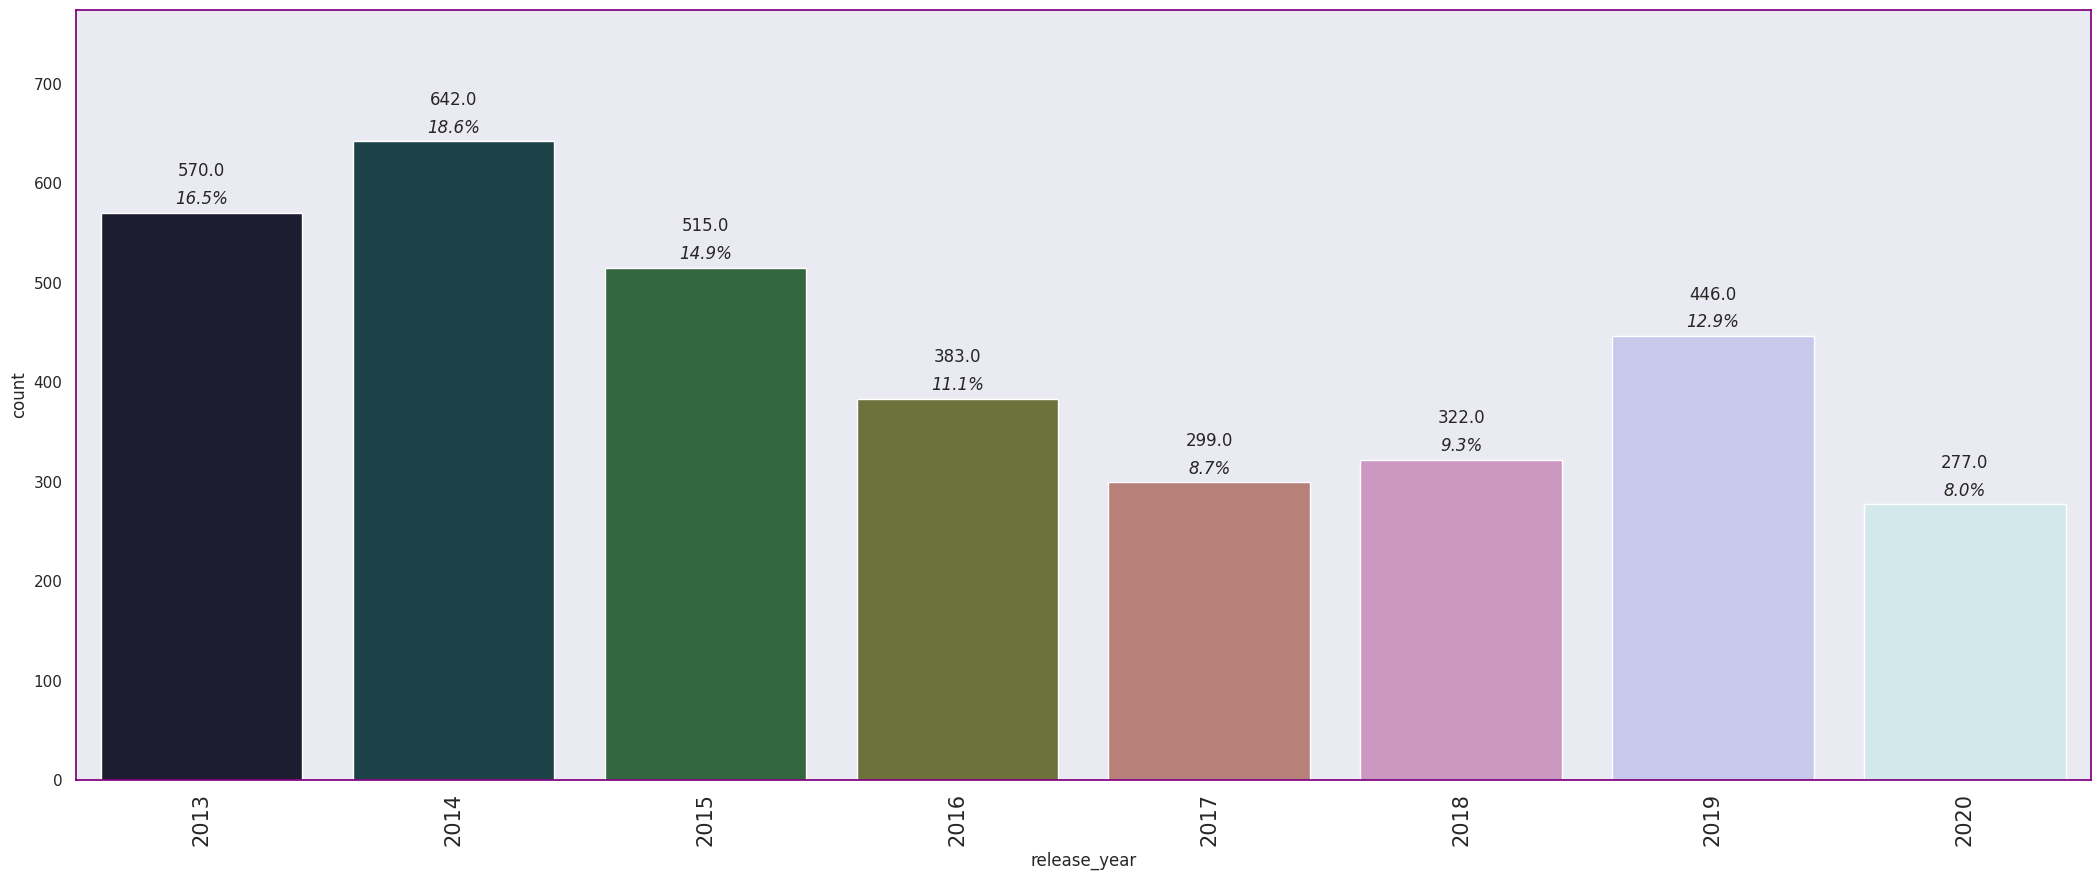

In [1167]:
# Labeled barplot for release year
labeled_barplot(df, "release_year", perc=True, n=25)

The biggest release year is 2014. 642 devices (18.6%) were released in 2014. <br>
The next biggest release year is 2013. 2013 had 570 devices (16.5%). <br>
Release years range from 2013 to 2020

**Operating System**

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


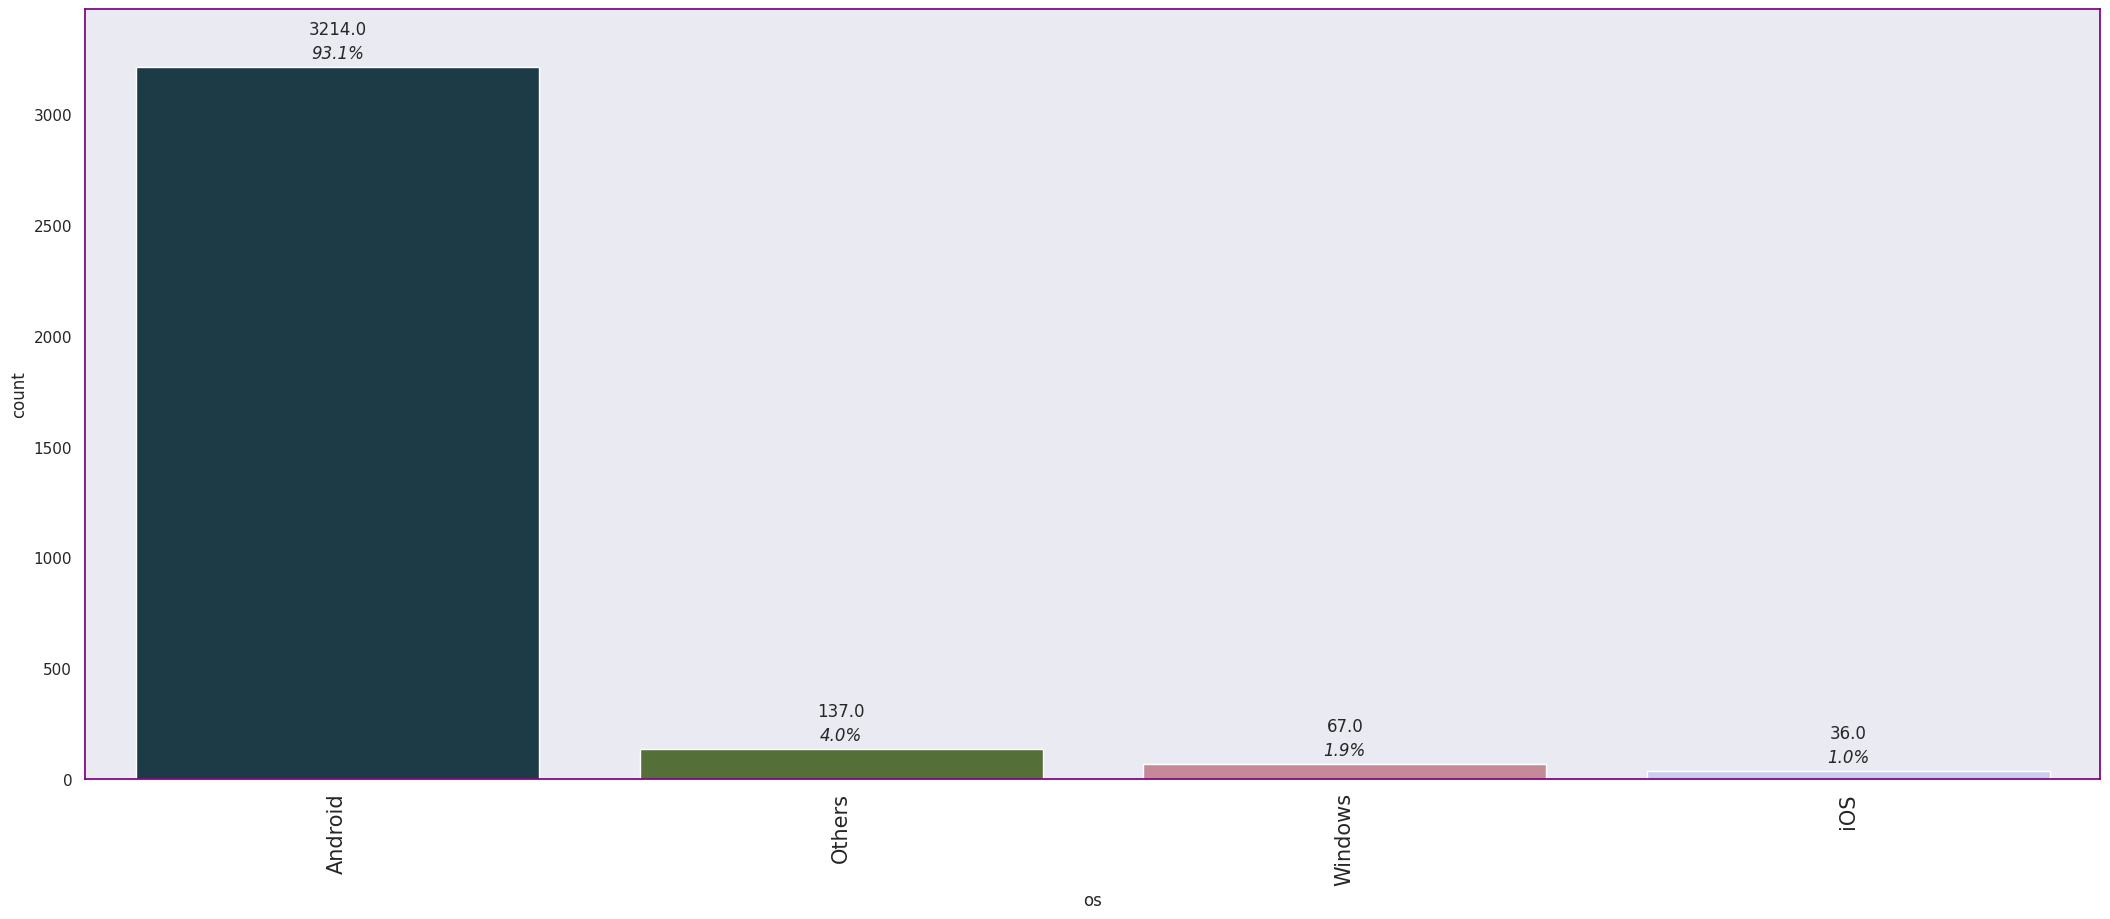

In [1168]:
# Labeled barplot for os
labeled_barplot(df, "os", perc=True, n=25)

**2.	What percentage of the used device market is dominated by Android devices?**

Most of the devices are Androids. <br>
3214 devices (93.1%) are Androids.

**4G**

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


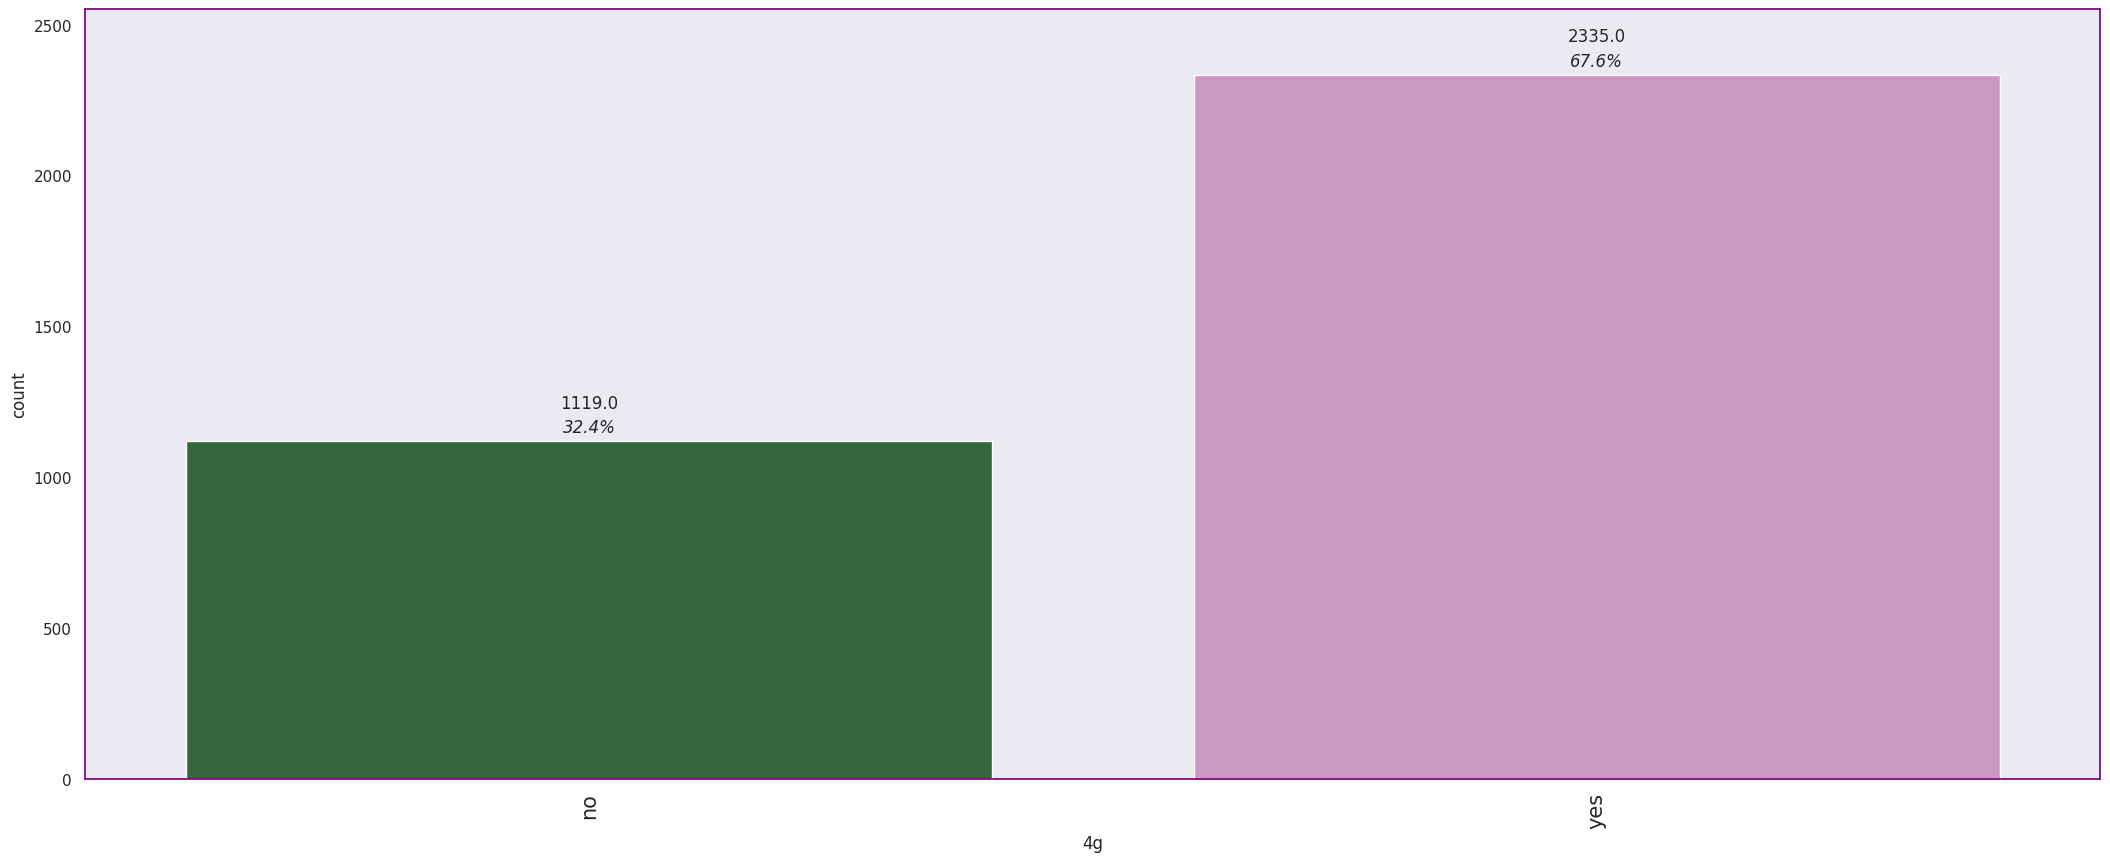

In [1169]:
# Labeled barplot for 4g
labeled_barplot(df, "4g", perc=True, n=25)

2335 devices (67.6%) have 4G. <br>
1119 devices (32.4%) do not have 4G.

**5G**

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


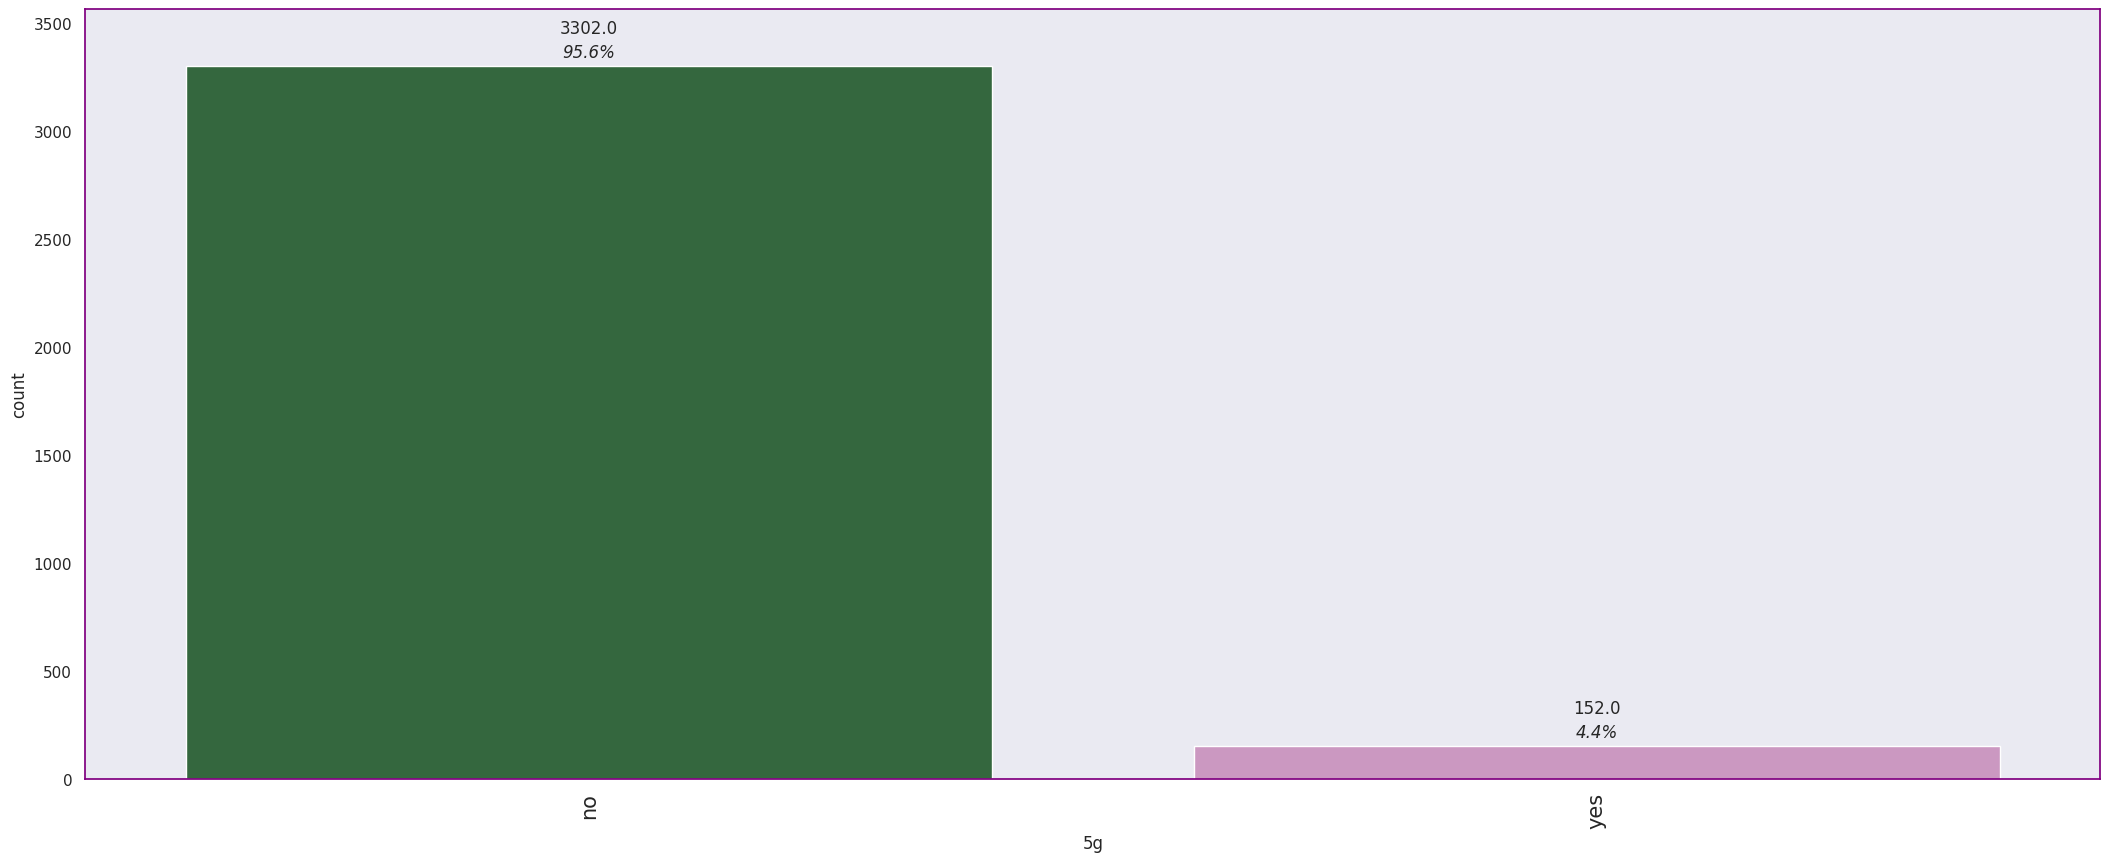

In [1170]:
# Labeled barplot for 5g
labeled_barplot(df, "5g", perc=True, n=25)

Most devices do not have 5G. <br>
Only 152 devices (4.4%) have 5G. <br>
3302 devices (95.6%) do not have 5G.

Most of the devices are Androids. <br>
3214 devices (93.1%) are Androids.

**Bivariate Analysis:**

<Figure size 1500x700 with 0 Axes>

<Axes: >

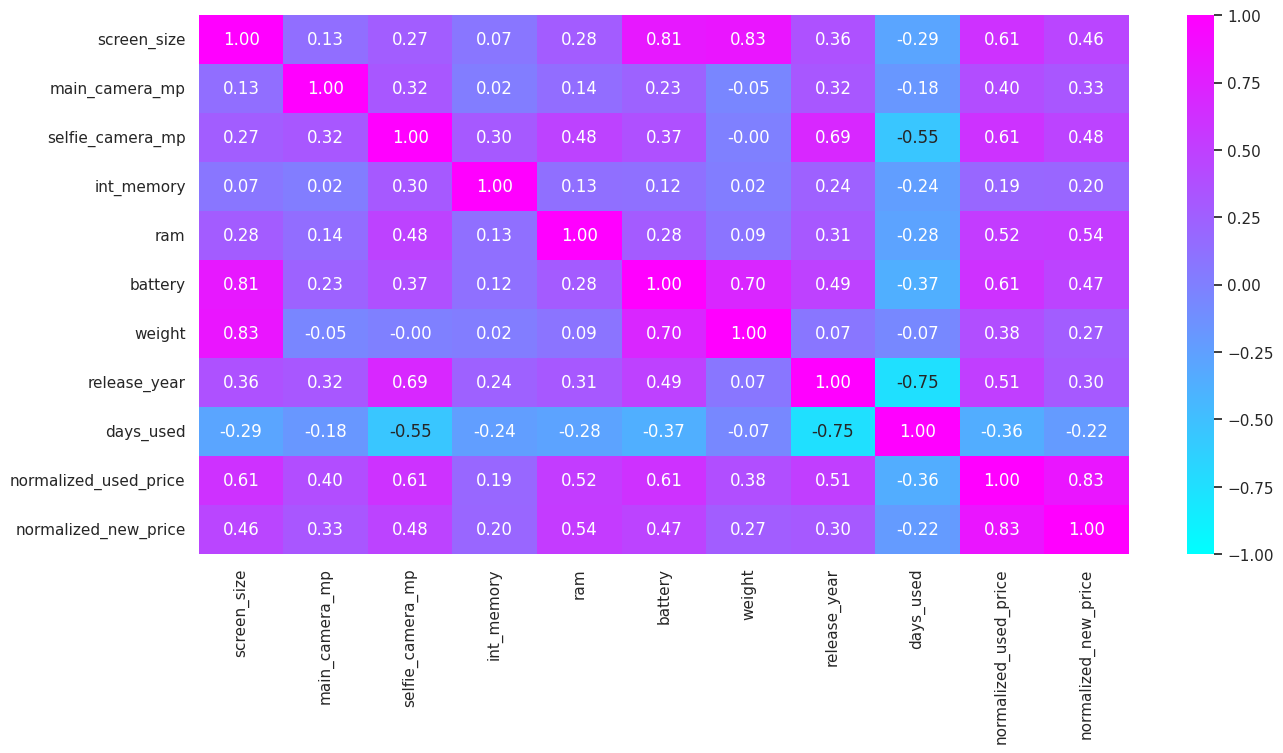

In [1171]:
heatmap_list = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable.

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[heatmap_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="cool"
)
plt.show()

**Brand Name and Ram**

<Figure size 2500x600 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='ram'>

Text(0.5, 1.0, 'Rams per Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Rams')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

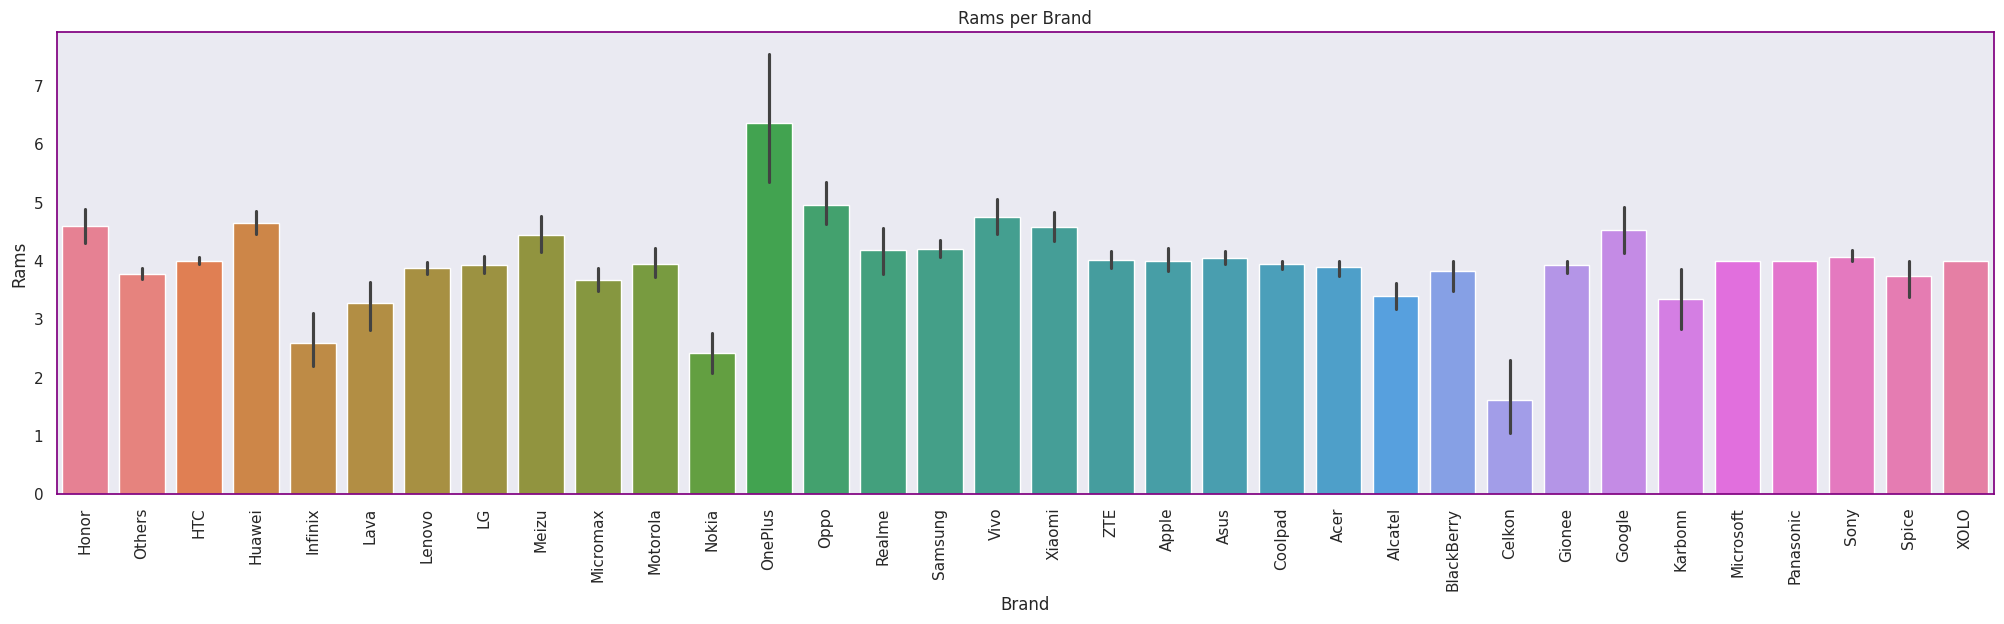

In [1172]:
# Create the bar plot
plt.figure(figsize=(25, 6))
sns.barplot(x="brand_name", y="ram", data=df, hue="brand_name")
plt.title("Rams per Brand")
plt.xlabel("Brand")
plt.ylabel("Rams")
plt.xticks(rotation=90)

plt.show()

brand_name
Acer         3.90
Alcatel      3.41
Apple        4.00
Asus         4.05
BlackBerry   3.83
Name: ram, dtype: float64

<Figure size 2500x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='brand_name', ylabel='ram'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Alcatel'),
  Text(2, 0, 'Apple'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'BlackBerry'),
  Text(5, 0, 'Celkon'),
  Text(6, 0, 'Coolpad'),
  Text(7, 0, 'Gionee'),
  Text(8, 0, 'Google'),
  Text(9, 0, 'HTC'),
  Text(10, 0, 'Honor'),
  Text(11, 0, 'Huawei'),
  Text(12, 0, 'Infinix'),
  Text(13, 0, 'Karbonn'),
  Text(14, 0, 'LG'),
  Text(15, 0, 'Lava'),
  Text(16, 0, 'Lenovo'),
  Text(17, 0, 'Meizu'),
  Text(18, 0, 'Micromax'),
  Text(19, 0, 'Microsoft'),
  Text(20, 0, 'Motorola'),
  Text(21, 0, 'Nokia'),
  Text(22, 0, 'OnePlus'),
  Text(23, 0, 'Oppo'),
  Text(24, 0, 'Others'),
  Text(25, 0, 'Panasonic'),
  Text(26, 0, 'Realme'),
  Text(27, 0, 'Samsung'),
  Text(28, 0, 'Sony'),
  Text(29, 0, 'Spice'),
  Text(30, 0, 'Vivo'),
  Text(31, 0, 'XOLO'),
  Text(32, 0, 'Xiaomi

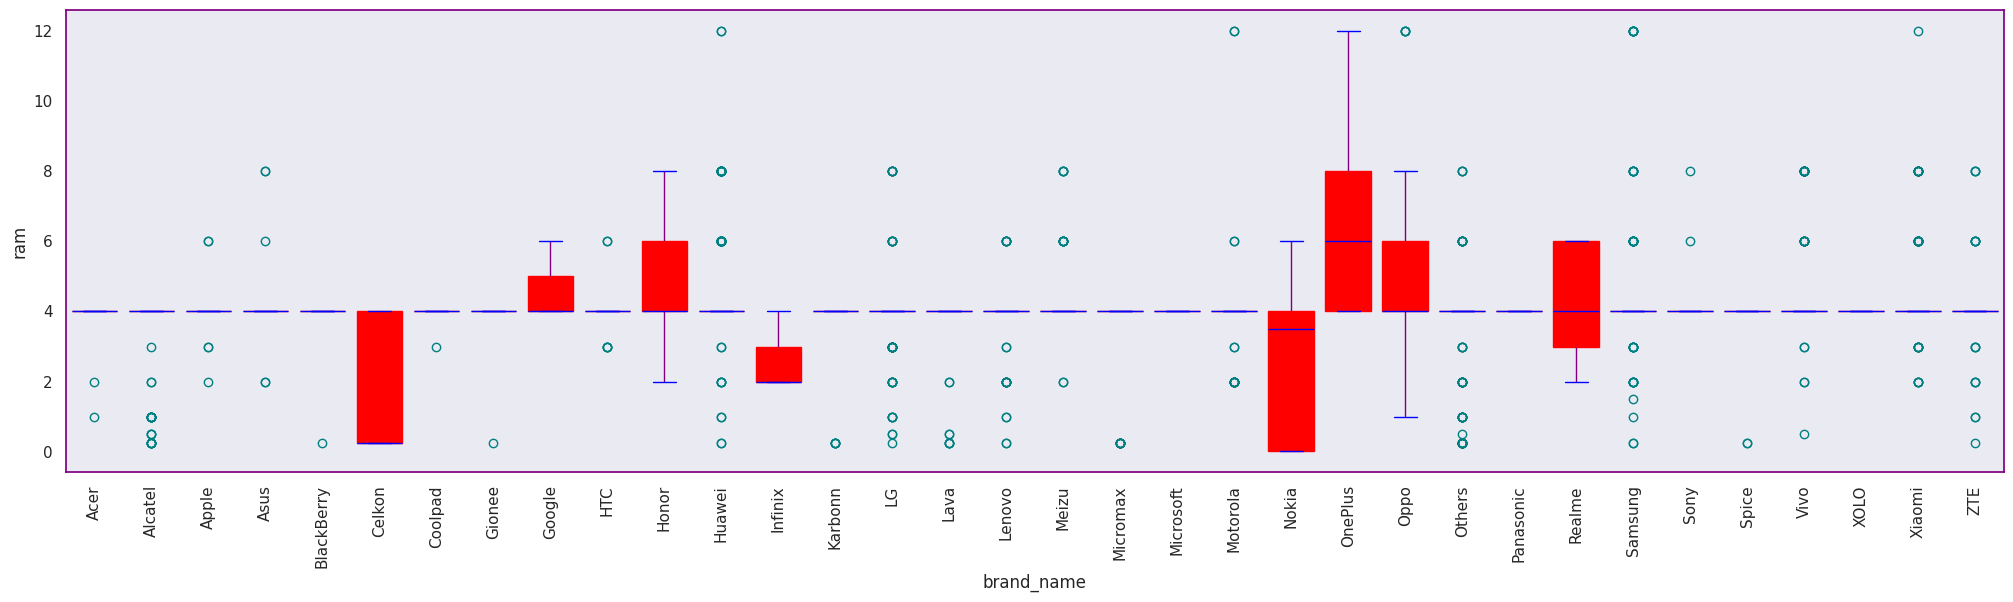

In [1173]:
# Create a groupby that includes brand name and the mean ram
average_ram_per_brand_name = df2.groupby("brand_name")["ram"].mean()
average_ram_per_brand_name.head()
print()
print()

plt.figure(figsize=(25, 6))
# specify colors
c = "red"
d = "blue"
e = "purple"
f = "teal"

# Create boxplot for brand name and ram
sns.boxplot(
    data=df2,
    y="ram",
    x="brand_name",
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor=c, color=c),
    capprops=dict(color=d),
    whiskerprops=dict(color=e),
    flierprops=dict(color=f, markeredgecolor=f),
    medianprops=dict(color=d),
)

plt.xticks(rotation=90)

**3.	The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

OnePlus devices have the most ram compared to the other phones. <br>
Most of the devices have average ram of ~4GB. <br>
Celkon has the lowest averge ram of ~1.5GB.

**Weight and Brand Name**

<Figure size 2500x600 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='weight'>

Text(0.5, 1.0, 'Weight per Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Weight')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

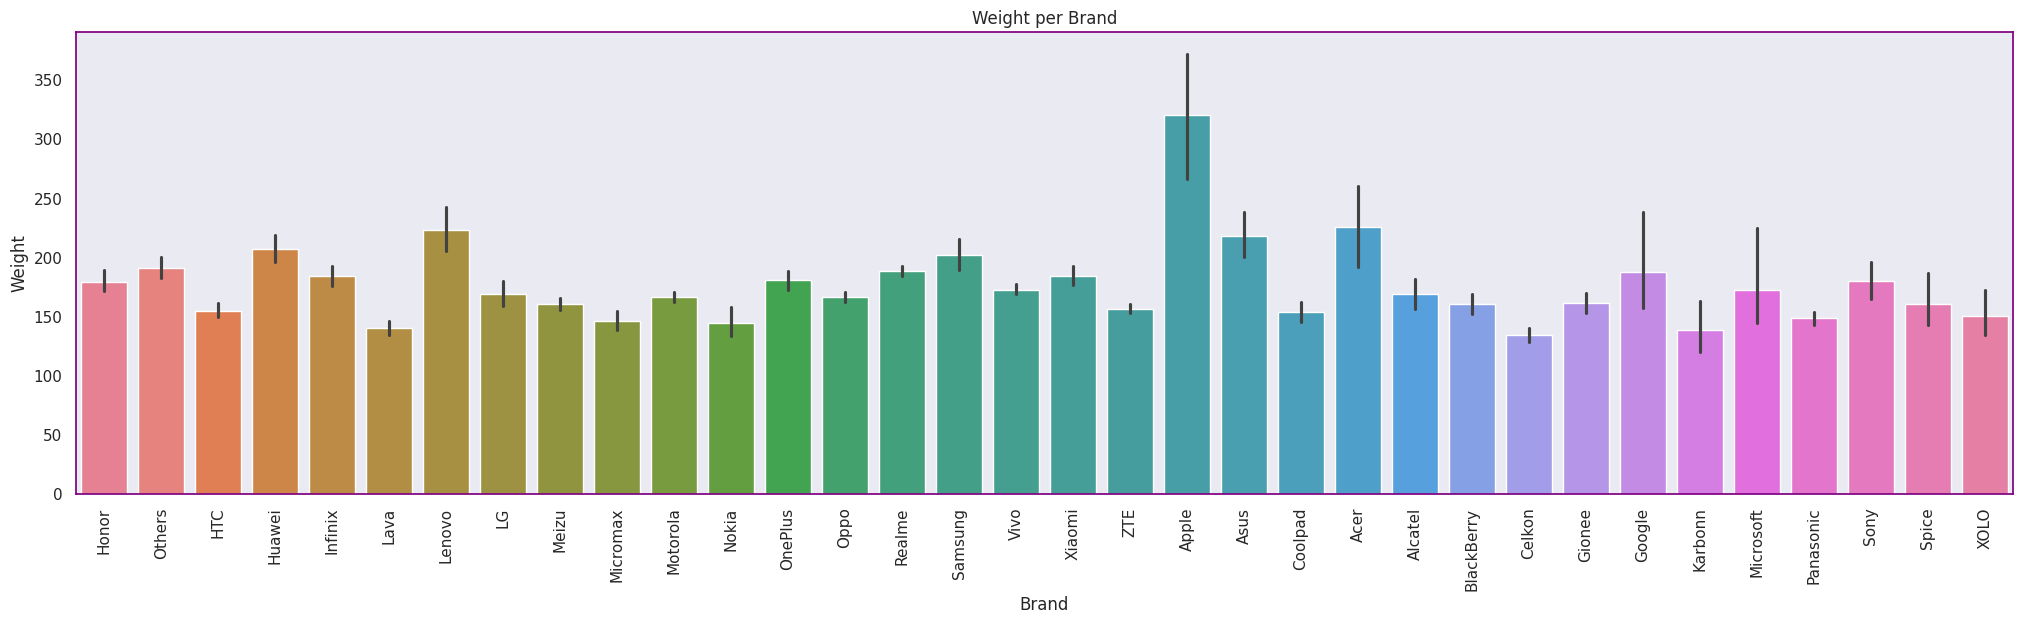

In [1174]:
# Create the bar plot
plt.figure(figsize=(25, 6))
sns.barplot(x="brand_name", y="weight", data=df, hue="brand_name")
plt.title("Weight per Brand")
plt.xlabel("Brand")
plt.ylabel("Weight")
plt.xticks(rotation=90)

plt.show()

Battery and Brand Name

<Figure size 2500x600 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='battery'>

Text(0.5, 1.0, 'Battery per Brand')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Battery')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Lava'),
  Text(6, 0, 'Lenovo'),
  Text(7, 0, 'LG'),
  Text(8, 0, 'Meizu'),
  Text(9, 0, 'Micromax'),
  Text(10, 0, 'Motorola'),
  Text(11, 0, 'Nokia'),
  Text(12, 0, 'OnePlus'),
  Text(13, 0, 'Oppo'),
  Text(14, 0, 'Realme'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Vivo'),
  Text(17, 0, 'Xiaomi'),
  Text(18, 0, 'ZTE'),
  Text(19, 0, 'Apple'),
  Text(20, 0, 'Asus'),
  Text(21, 0, 'Coolpad'),
  Text(22, 0, 'Acer'),
  Text(23, 0, 'Alcatel'),
  Text(24, 0, 'BlackBerry'),
  Text(25, 0, 'Celkon'),
  Text(26, 0, 'Gionee'),
  Text(27, 0, 'Google'),
  Text(28, 0, 'Karbonn'),
  Text(29, 0, 'Microsoft'),
  Text(30, 0, 'Panasonic'),
  Text(31, 0, 'Sony'),
  Text(32, 0, 'Spice'

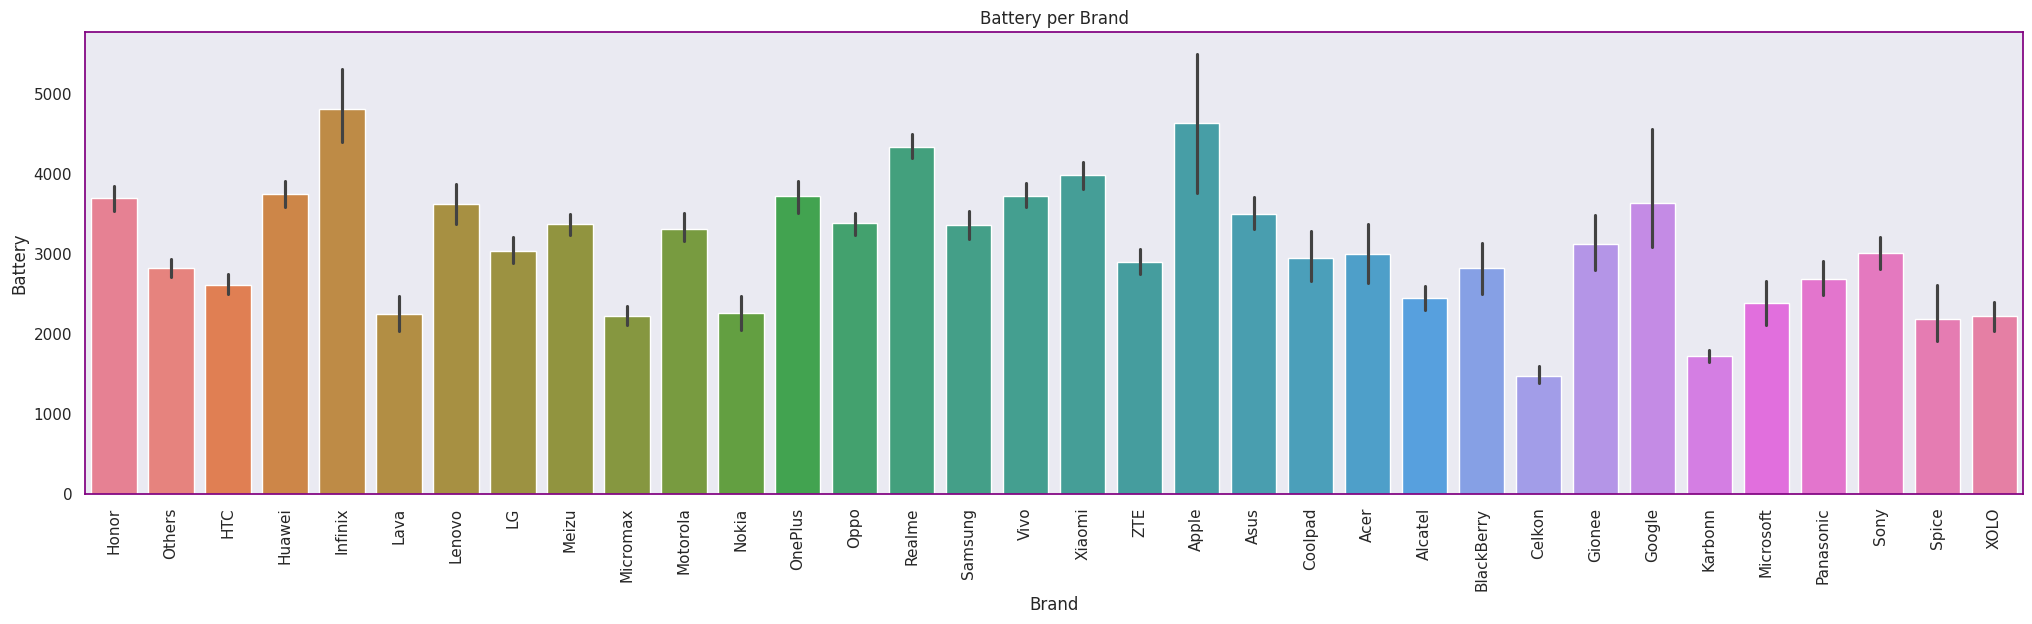

In [1175]:
# Create the bar plot
plt.figure(figsize=(25, 6))
sns.barplot(x="brand_name", y="battery", data=df, hue="brand_name")
plt.title("Battery per Brand")
plt.xlabel("Brand")
plt.ylabel("Battery")
plt.xticks(rotation=90)

plt.show()

brand_name
Acer         225.87
Alcatel      169.01
Apple        320.42
Asus         218.60
BlackBerry   160.57
Name: weight, dtype: float64

<Figure size 2500x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='brand_name', ylabel='weight'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Alcatel'),
  Text(2, 0, 'Apple'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'BlackBerry'),
  Text(5, 0, 'Celkon'),
  Text(6, 0, 'Coolpad'),
  Text(7, 0, 'Gionee'),
  Text(8, 0, 'Google'),
  Text(9, 0, 'HTC'),
  Text(10, 0, 'Honor'),
  Text(11, 0, 'Huawei'),
  Text(12, 0, 'Infinix'),
  Text(13, 0, 'Karbonn'),
  Text(14, 0, 'LG'),
  Text(15, 0, 'Lava'),
  Text(16, 0, 'Lenovo'),
  Text(17, 0, 'Meizu'),
  Text(18, 0, 'Micromax'),
  Text(19, 0, 'Microsoft'),
  Text(20, 0, 'Motorola'),
  Text(21, 0, 'Nokia'),
  Text(22, 0, 'OnePlus'),
  Text(23, 0, 'Oppo'),
  Text(24, 0, 'Others'),
  Text(25, 0, 'Panasonic'),
  Text(26, 0, 'Realme'),
  Text(27, 0, 'Samsung'),
  Text(28, 0, 'Sony'),
  Text(29, 0, 'Spice'),
  Text(30, 0, 'Vivo'),
  Text(31, 0, 'XOLO'),
  Text(32, 0, 'Xiaomi

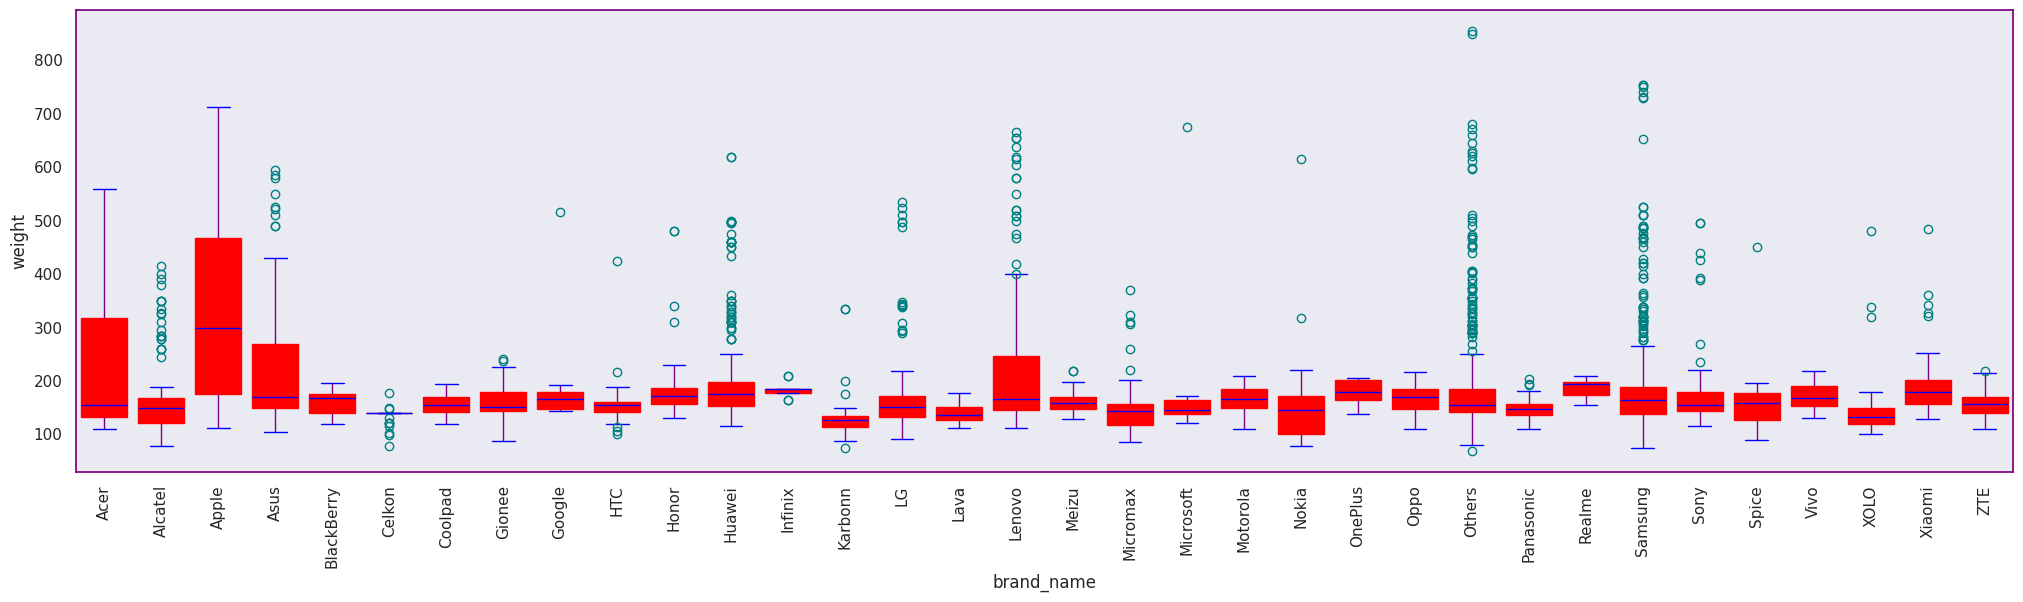

In [1176]:
# Create a groupby that includes brand name and the mean weight
average_weight_per_brand_name = df2.groupby("brand_name")["weight"].mean()
average_weight_per_brand_name.head()
print()
print()

plt.figure(figsize=(25, 6))
# specify colors
c = "red"
d = "blue"
e = "purple"
f = "teal"

# Create boxplot for brand name and ram
sns.boxplot(
    data=df2,
    y="weight",
    x="brand_name",
    notch=False,
    patch_artist=True,
    boxprops=dict(facecolor=c, color=c),
    capprops=dict(color=d),
    whiskerprops=dict(color=e),
    flierprops=dict(color=f, markeredgecolor=f),
    medianprops=dict(color=d),
)

plt.xticks(rotation=90)

Apple devices weight the most. <br>
Most devices have outliers.

**4.	A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [1177]:
df2.isnull().sum()

# Convert brand_name to object and the weight into int (just in case):

greater_than_4500_battery = df2.loc[df2["battery"] > 4500]

greater_than_4500_battery["brand_name"] = greater_than_4500_battery[
    "brand_name"
].astype("object")

greater_than_4500_battery["weight"] = greater_than_4500_battery["weight"].astype("int")

# In the groupby, add dropna=True so it can handle any weird stuff it does not like in your dataframe:

result = df2.groupby("brand_name", dropna=False).agg({"weight": "median"})

result

print()
greater_than_4500_battery.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<ipython-input-1177-1b2d3324e6cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_than_4500_battery["brand_name"] = greater_than_4500_battery[
<ipython-input-1177-1b2d3324e6cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greater_than_4500_battery["weight"] = greater_than_4500_battery["weight"].astype("int")


weight
brand_name        
Acer        155.00
Alcatel     149.00
Apple       299.00
Asus        170.00
BlackBerry  167.50
Celkon      140.00
Coolpad     155.00
Gionee      151.50
Google      167.00
HTC         155.00
Honor       171.75
Huawei      175.00
Infinix     185.00
Karbonn     126.50
LG          152.00
Lava        137.00
Lenovo      165.40
Meizu       159.50
Micromax    143.00
Microsoft   146.00
Motorola    166.00
Nokia       145.00
OnePlus     180.00
Oppo        169.50
Others      154.50
Panasonic   146.70
Realme      195.00
Samsung     165.00
Sony        154.50
Spice       158.00
Vivo        167.80
XOLO        132.00
Xiaomi      180.00
ZTE         157.50

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Not all phones have a battery greater than 4500. <br>
Apple has the highest weight at an average of 299 grams.<br>
Karbonn has the loweist weight at an average of 126.50 grams.



**5.	Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [1178]:
screen_greater_than_6 = df2[
    df2.screen_size > 6 * 2.54
]  # data set of >6 inches screen size, the multiplication of 2.54 converts the cm to inches (15.24 cm = ~6 inches)
screen_greater_than_6.shape

(1099, 15)

In [1179]:
screen_greater_than_6.brand_name.value_counts().sort_values(
    ascending=False
)  # printing the screens larger than 6 inches on descending order

brand_name
Huawei        149
Samsung       119
Others         99
Vivo           80
Honor          72
Oppo           70
Lenovo         69
Xiaomi         69
LG             59
Motorola       42
Asus           41
Realme         40
Alcatel        26
Apple          24
Acer           19
Meizu          17
ZTE            17
OnePlus        16
Nokia          15
Sony           12
Infinix        10
Micromax        7
HTC             7
Google          4
XOLO            3
Gionee          3
Coolpad         3
Spice           2
Panasonic       2
Karbonn         2
Microsoft       1
Celkon          0
BlackBerry      0
Lava            0
Name: count, dtype: int64

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


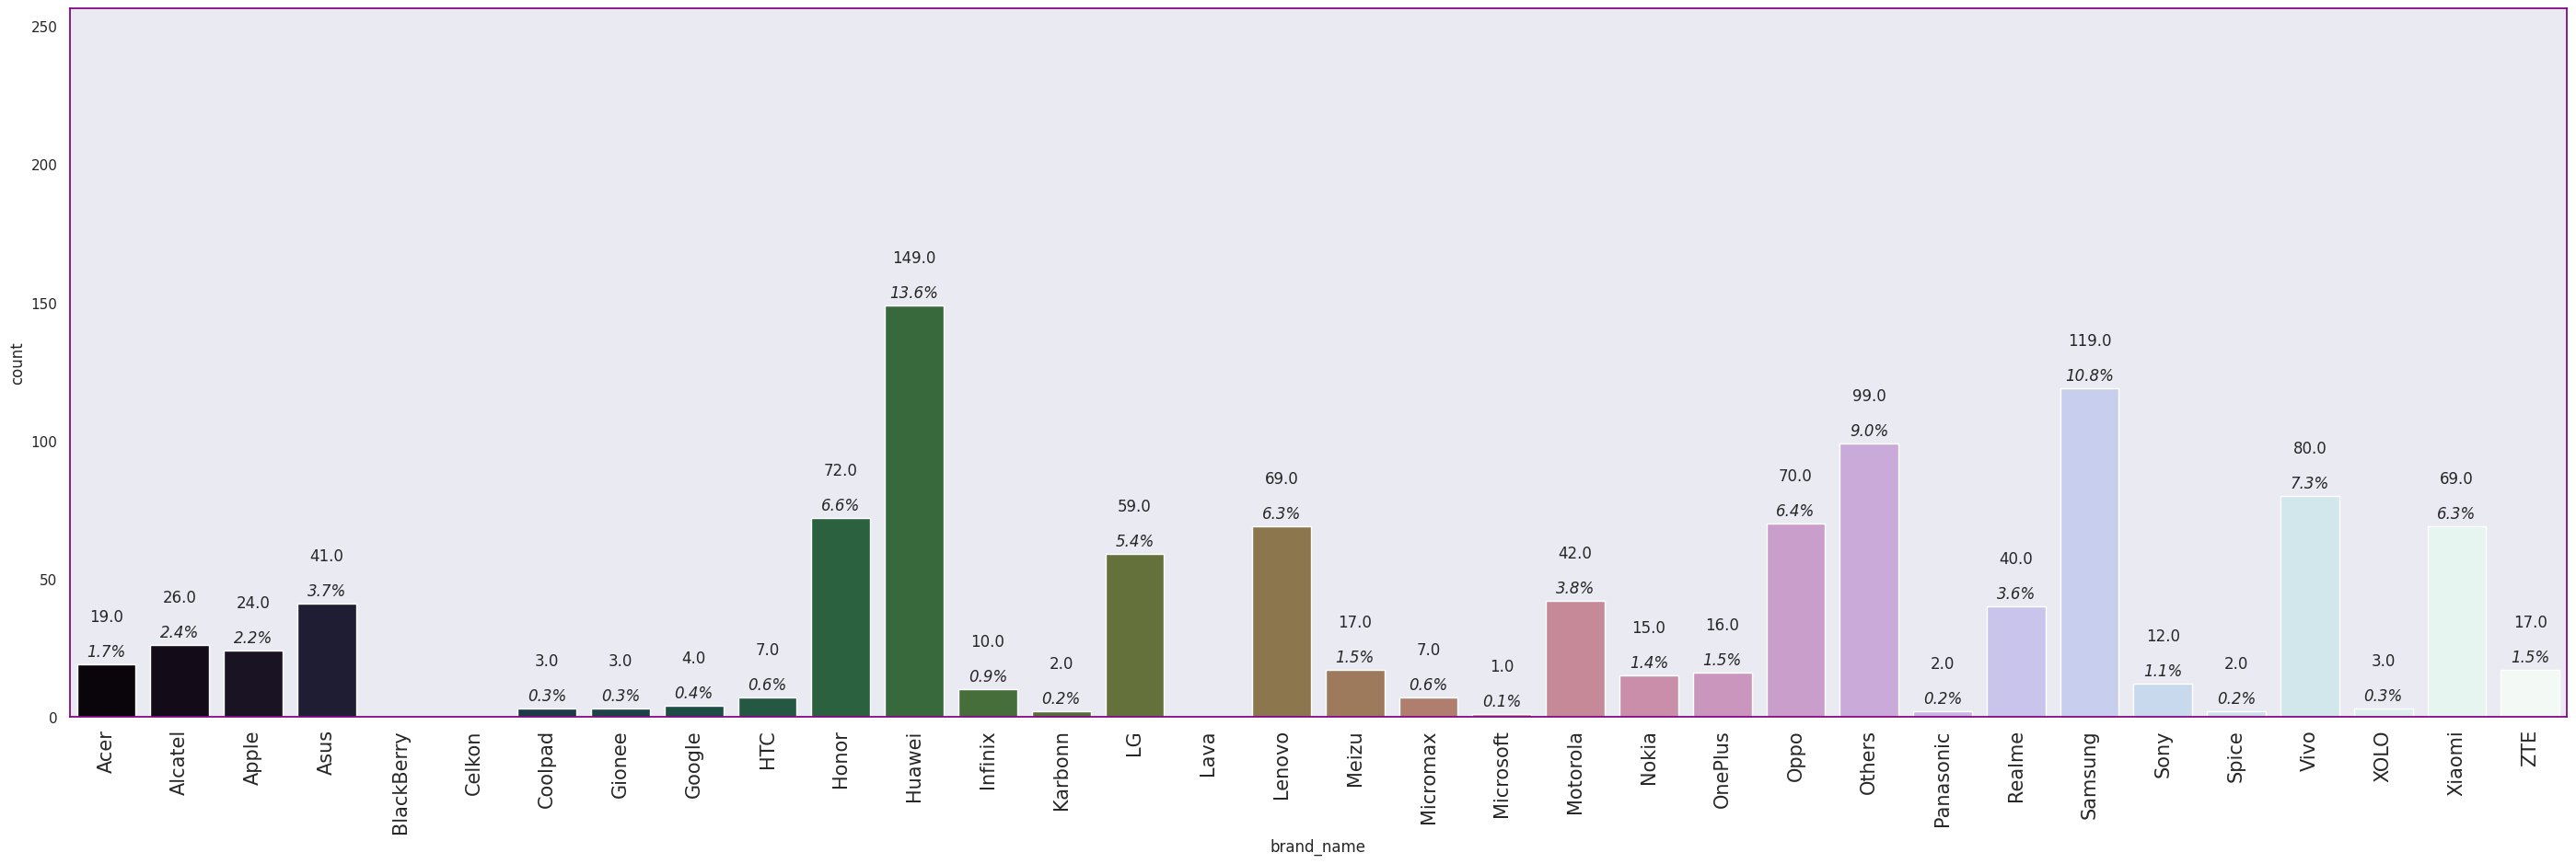

In [1180]:
labeled_barplot(
    df2=screen_greater_than_6, feature="brand_name", perc=True, n=34)
  # plotting screens bigger than 6 inches using barplot.



1099 phones have a screen size greater than 6. <br>
All but 3 brands offer screens higher than 6. The three brands are BlackBerry, Celkon and Lava. <br>
The most devices come from the brand Huawei (149 devices) and Samsung (119 devices)

**Featured Engineering**

In [1181]:
# Create a device cost range
df2["device_cost_range"] = pd.cut(
    x=df2.normalized_new_price,
    bins=[-np.infty, 5.25, 6.00, np.infty],
    labels=["Budget", "Mid-Range", "Premium"],
)

df2[
    "device_cost_range"
].value_counts()  # creating the device category based on the price values

device_cost_range
Budget       1753
Mid-Range    1310
Premium       391
Name: count, dtype: int64

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


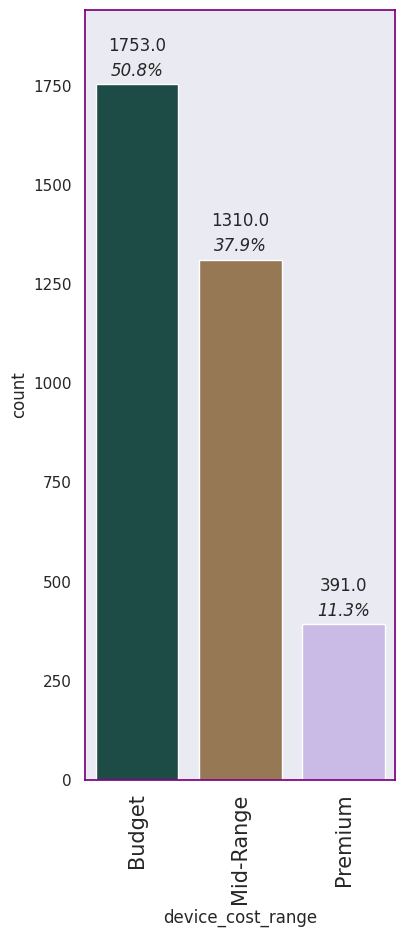

In [1182]:
labeled_barplot(df2, "device_cost_range", perc=True)  # plotting the device cost range

50.8% of all devices have a price of 5.25 or less Euros. <br>
37.9% of all devices have a price between 5.25 and 6.00 Euros. <br>
11.3% of all devices have a price greater than 6.00 Euros.

**6.	A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [1183]:
selfie_camera_greater_than_8 = df2[
    df2.selfie_camera_mp > 8
]  # data set of >8 mp selfie cameras
selfie_camera_greater_than_8.shape

(655, 16)

In [1184]:
selfie_camera_greater_than_8.brand_name.value_counts().sort_values(
    ascending=False
)  # printing the selfie cameras bigger than 8 mp in descending order

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Gionee         4
Infinix        4
Coolpad        3
Micromax       2
Panasonic      2
BlackBerry     2
Acer           1
Apple          0
XOLO           0
Spice          0
Google         0
Karbonn        0
Lava           0
Microsoft      0
Alcatel        0
Celkon         0
Name: count, dtype: int64

<ipython-input-1165-65ce46487b3d>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


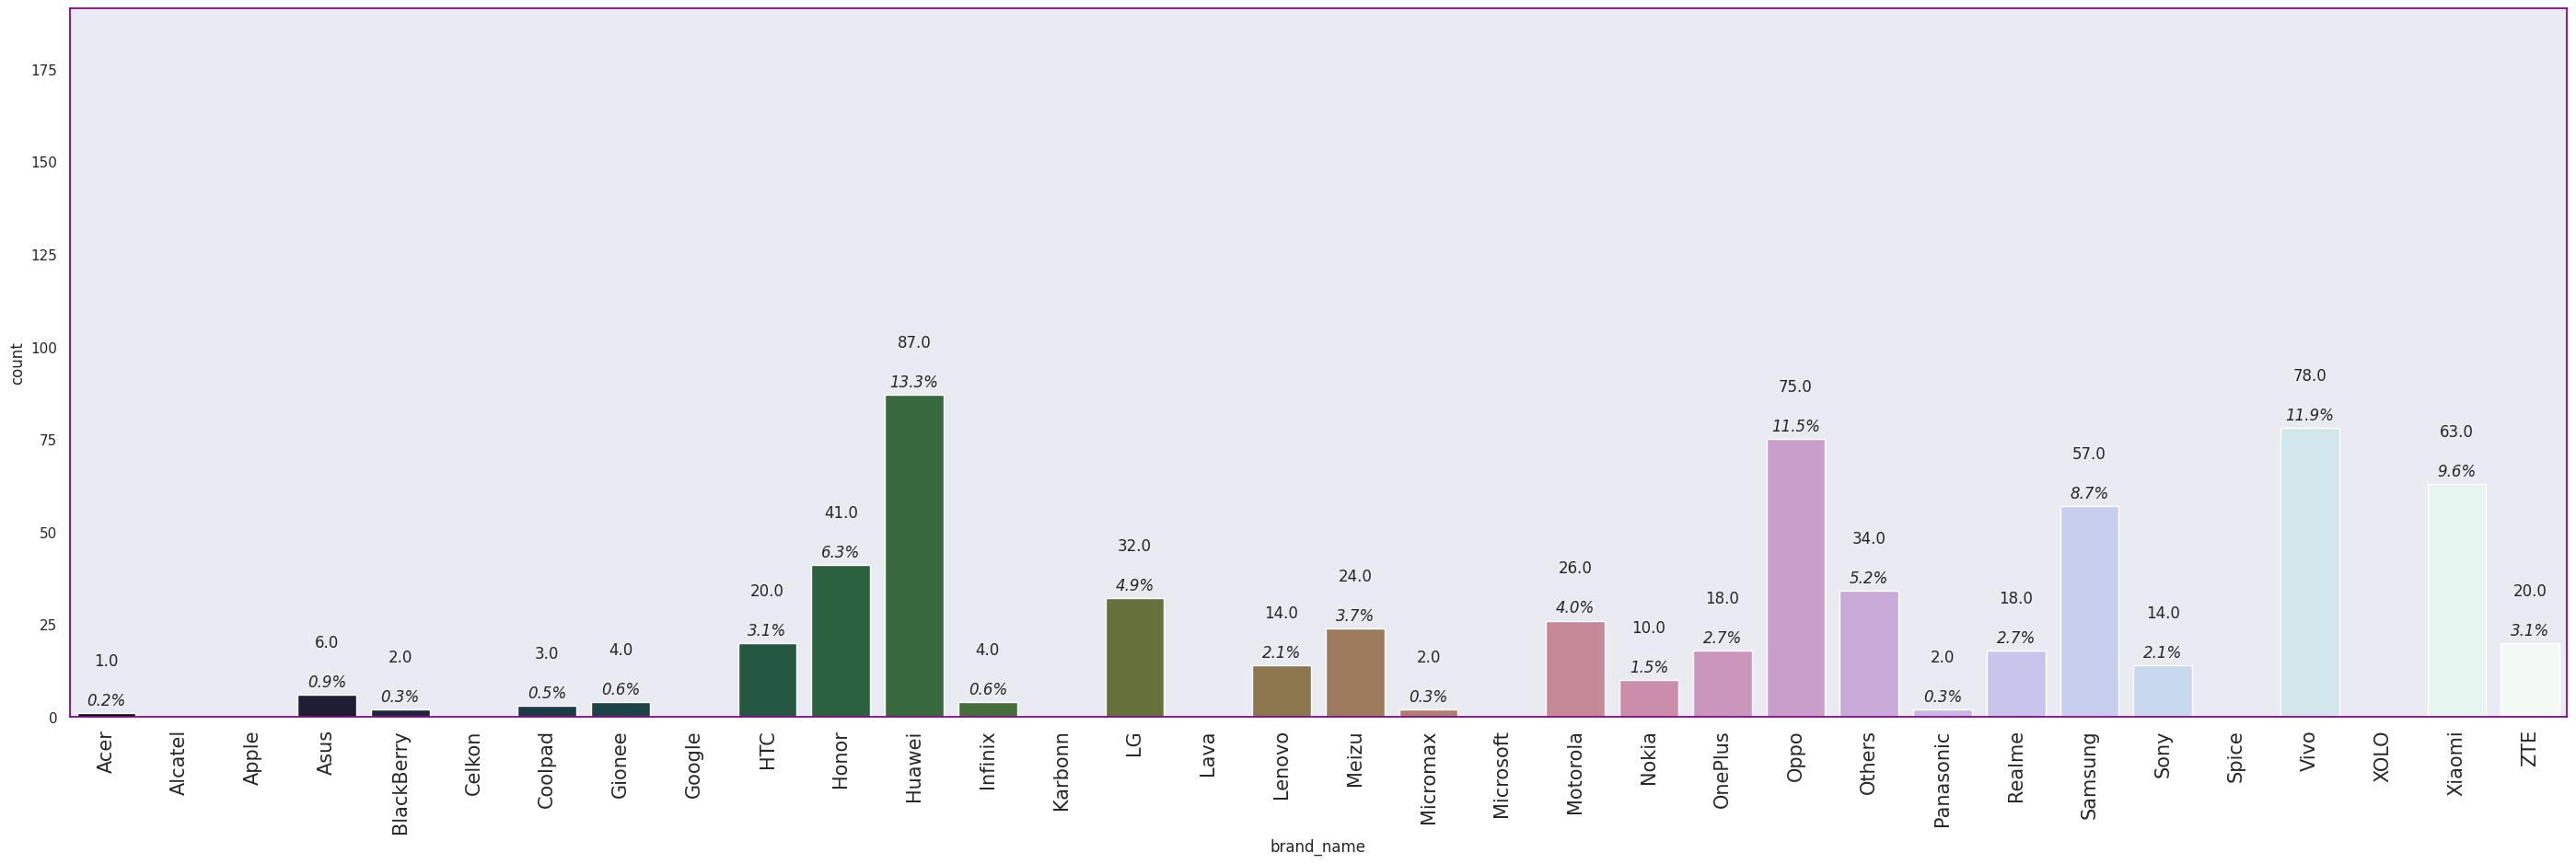

In [1185]:
labeled_barplot(
    df2=selfie_camera_greater_than_8, feature="brand_name", perc=True, n=34
)  # plotting selfie cameras bigger than 8 MP using barplot.

<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='brand_name', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Alcatel'),
  Text(2, 0, 'Apple'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'BlackBerry'),
  Text(5, 0, 'Celkon'),
  Text(6, 0, 'Coolpad'),
  Text(7, 0, 'Gionee'),
  Text(8, 0, 'Google'),
  Text(9, 0, 'HTC'),
  Text(10, 0, 'Honor'),
  Text(11, 0, 'Huawei'),
  Text(12, 0, 'Infinix'),
  Text(13, 0, 'Karbonn'),
  Text(14, 0, 'LG'),
  Text(15, 0, 'Lava'),
  Text(16, 0, 'Lenovo'),
  Text(17, 0, 'Meizu'),
  Text(18, 0, 'Micromax'),
  Text(19, 0, 'Microsoft'),
  Text(20, 0, 'Motorola'),
  Text(21, 0, 'Nokia'),
  Text(22, 0, 'OnePlus'),
  Text(23, 0, 'Oppo'),
  Text(24, 0, 'Others'),
  Text(25, 0, 'Panasonic'),
  Text(26, 0, 'Realme'),
  Text(27, 0, 'Samsung'),
  Text(28, 0, 'Sony'),
  Text(29, 0, 'Spice'),
  Text(30, 0, 'Vivo'),
  Text(31, 0, 'XOLO'),
  Text(32, 0, 'Xiaomi

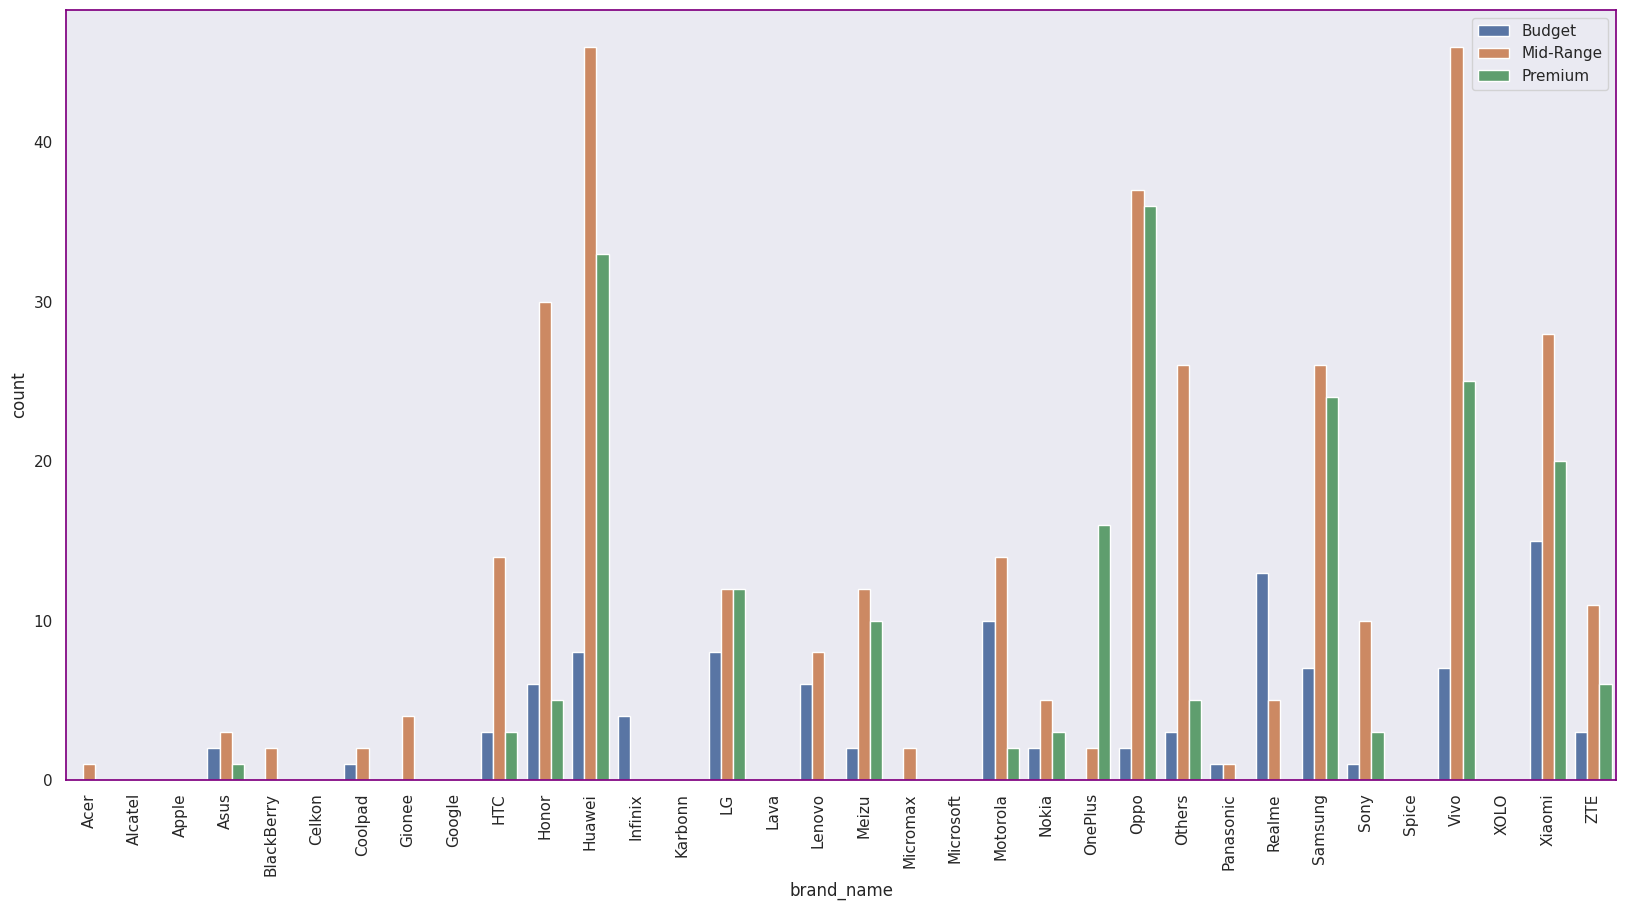

In [1186]:
plt.figure(figsize=(20, 10))
sns.countplot(
    data=selfie_camera_greater_than_8, x="brand_name", hue="device_cost_range"
)  ## countplot for 'brandname' with hue = 'device_cost_range' on selfie_camera_greater_than_8
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

In [1187]:
# Calculate brand counts by range
brand_counts_by_range = (
    selfie_camera_greater_than_8.groupby(["brand_name", "device_cost_range"])
    .size()
    .reset_index(name="counts")
)
brand_counts_by_range.head()

brand_name device_cost_range  counts
0       Acer            Budget       0
1       Acer         Mid-Range       1
2       Acer           Premium       0
3    Alcatel            Budget       0
4    Alcatel         Mid-Range       0

In [1188]:
# Calculate brand counts
brand_counts = selfie_camera_greater_than_8["brand_name"].value_counts()
brand_counts

brand_name
Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
ZTE           20
HTC           20
Realme        18
OnePlus       18
Sony          14
Lenovo        14
Nokia         10
Asus           6
Gionee         4
Infinix        4
Coolpad        3
Micromax       2
Panasonic      2
BlackBerry     2
Acer           1
Apple          0
XOLO           0
Spice          0
Google         0
Karbonn        0
Lava           0
Microsoft      0
Alcatel        0
Celkon         0
Name: count, dtype: int64

In [1189]:
# Step 1: Calculate the total count for each 'brand_name'
total_counts = (
    selfie_camera_greater_than_8.groupby("brand_name")
    .size()
    .reset_index(name="total_counts")
)

# Step 2: Group by both 'brand_name' and 'device_cost_range' and calculate counts
brand_counts_by_range = (
    selfie_camera_greater_than_8.groupby(["brand_name", "device_cost_range"])
    .size()
    .reset_index(name="counts")
)

# Step 3: Merge the total counts with the grouped counts
brand_counts_by_range = brand_counts_by_range.merge(total_counts, on="brand_name")

# Calculate percentage
brand_counts_by_range["percentage"] = (
    brand_counts_by_range["counts"] / brand_counts_by_range["total_counts"]
) * 100

brand_counts_by_range

brand_name device_cost_range  counts  total_counts  percentage
0         Acer            Budget       0             1        0.00
1         Acer         Mid-Range       1             1      100.00
2         Acer           Premium       0             1        0.00
3      Alcatel            Budget       0             0         NaN
4      Alcatel         Mid-Range       0             0         NaN
..         ...               ...     ...           ...         ...
97      Xiaomi         Mid-Range      28            63       44.44
98      Xiaomi           Premium      20            63       31.75
99         ZTE            Budget       3            20       15.00
100        ZTE         Mid-Range      11            20       55.00
101        ZTE           Premium       6            20       30.00

[102 rows x 5 columns]

In [1190]:
# Get the top 5 brands
top_brands = brand_counts_by_range.nlargest(10, "counts")
total_brands = total_counts.nlargest(10, "total_counts")

# Filter the original dataframe to include only the top 5 brands
top_brands_df = selfie_camera_greater_than_8[
    selfie_camera_greater_than_8["brand_name"].isin(top_brands["brand_name"])
]
total_brand_10_df = selfie_camera_greater_than_8[
    selfie_camera_greater_than_8["brand_name"].isin(total_brands["brand_name"])
]
top_brands
print()
total_brands

brand_name device_cost_range  counts  total_counts  percentage
34     Huawei         Mid-Range      46            87       52.87
91       Vivo         Mid-Range      46            78       58.97
70       Oppo         Mid-Range      37            75       49.33
71       Oppo           Premium      36            75       48.00
35     Huawei           Premium      33            87       37.93
31      Honor         Mid-Range      30            41       73.17
97     Xiaomi         Mid-Range      28            63       44.44
73     Others         Mid-Range      26            34       76.47
82    Samsung         Mid-Range      26            57       45.61
92       Vivo           Premium      25            78       32.05

brand_name  total_counts
11     Huawei            87
30       Vivo            78
23       Oppo            75
32     Xiaomi            63
27    Samsung            57
10      Honor            41
24     Others            34
14         LG            32
20   Motorola            26
17      Meizu            24

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 0, 'Top 7 brands with selfie cameras > 8MP')

Text(0, 0.5, 'Device Count')

Text(0.5, 1.0, 'Top 7 brands with Selfie Cameras > 8MP by Device Count')

(0.0, 50.0)

Text(0, 5, '8')

Text(0, 5, '7')

Text(0, 5, '2')

Text(0, 5, '6')

Text(0, 5, '15')

Text(0, 5, '3')

Text(0, 5, '7')

Text(0, 5, '46')

Text(0, 5, '46')

Text(0, 5, '37')

Text(0, 5, '30')

Text(0, 5, '28')

Text(0, 5, '26')

Text(0, 5, '26')

Text(0, 5, '33')

Text(0, 5, '25')

Text(0, 5, '36')

Text(0, 5, '5')

Text(0, 5, '20')

Text(0, 5, '5')

Text(0, 5, '24')

Text(0, 5, '0')

Text(0, 5, '0')

Text(0, 5, '0')

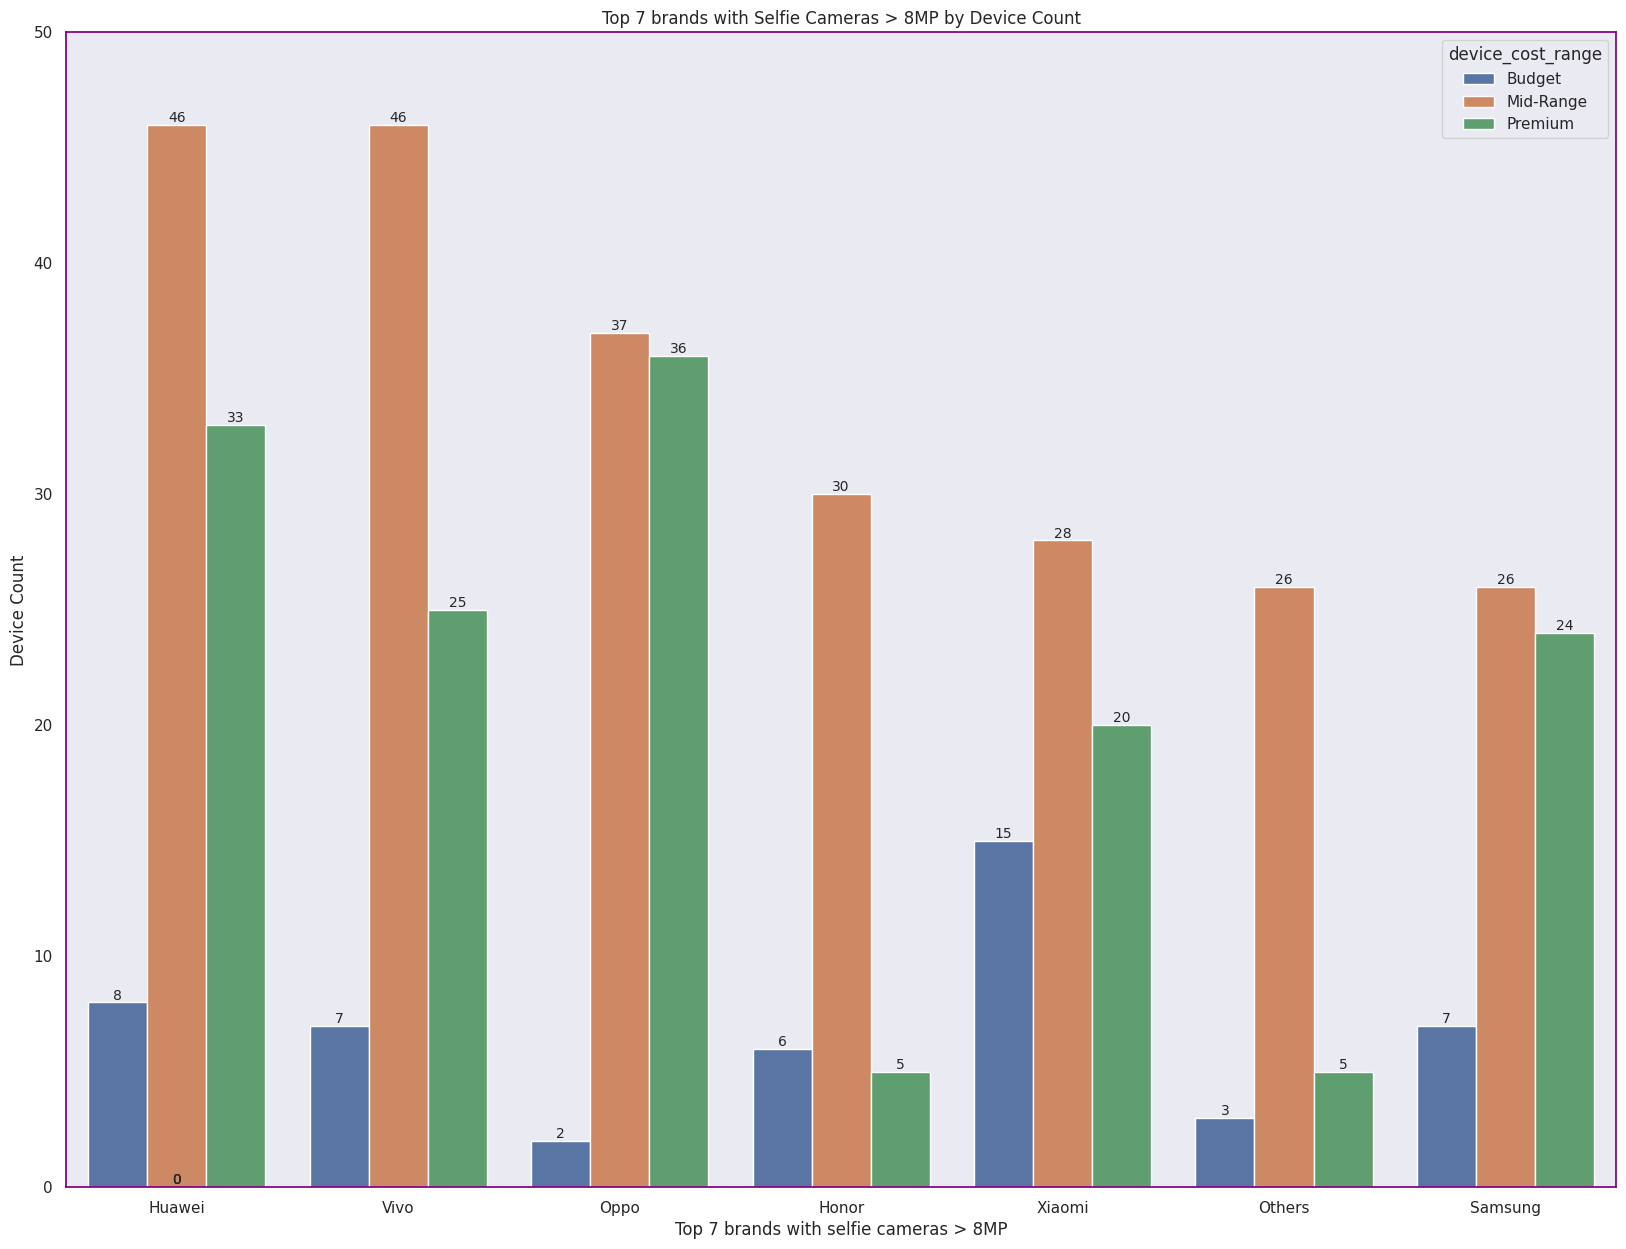

In [1191]:
# Create the bar plot
plt.figure(figsize=(20, 15))
ax = sns.countplot(
    data=total_brand_10_df,
    x="brand_name",
    hue="device_cost_range",
    order=top_brands["brand_name"],
)

plt.xlabel("Top 7 brands with selfie cameras > 8MP")
plt.ylabel("Device Count")
plt.title("Top 7 brands with Selfie Cameras > 8MP by Device Count")
plt.ylim(0, 50)  # Increase the height of the y-axis

# Iterate over each bar patch to add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        format(height, ".0f"),
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="center",
        xytext=(0, 5),  # Adjust this value
        textcoords="offset points",
        fontsize=10,  # Customize the font size
    )

655 devices have a selfie camera with more than 8mp. <br>
Huwaii has the most devices 87 (13.3%) that have a selfie camera more than 8mp. 46 are mid_range devices.<br>
Vivo has the 2nd most devices 78 (11.9%) that have a selfie camera more than 8mp. 46 are mid_range devices. <br>
Oppo has the 3rd most devices 75 (11.5%) that have a selfie camera more than 8mp. 37 are mid-range deivces and 36 are premium devices.  <br>

**7.	Which attributes are highly correlated with the normalized price of a used device?**

<Figure size 1500x700 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

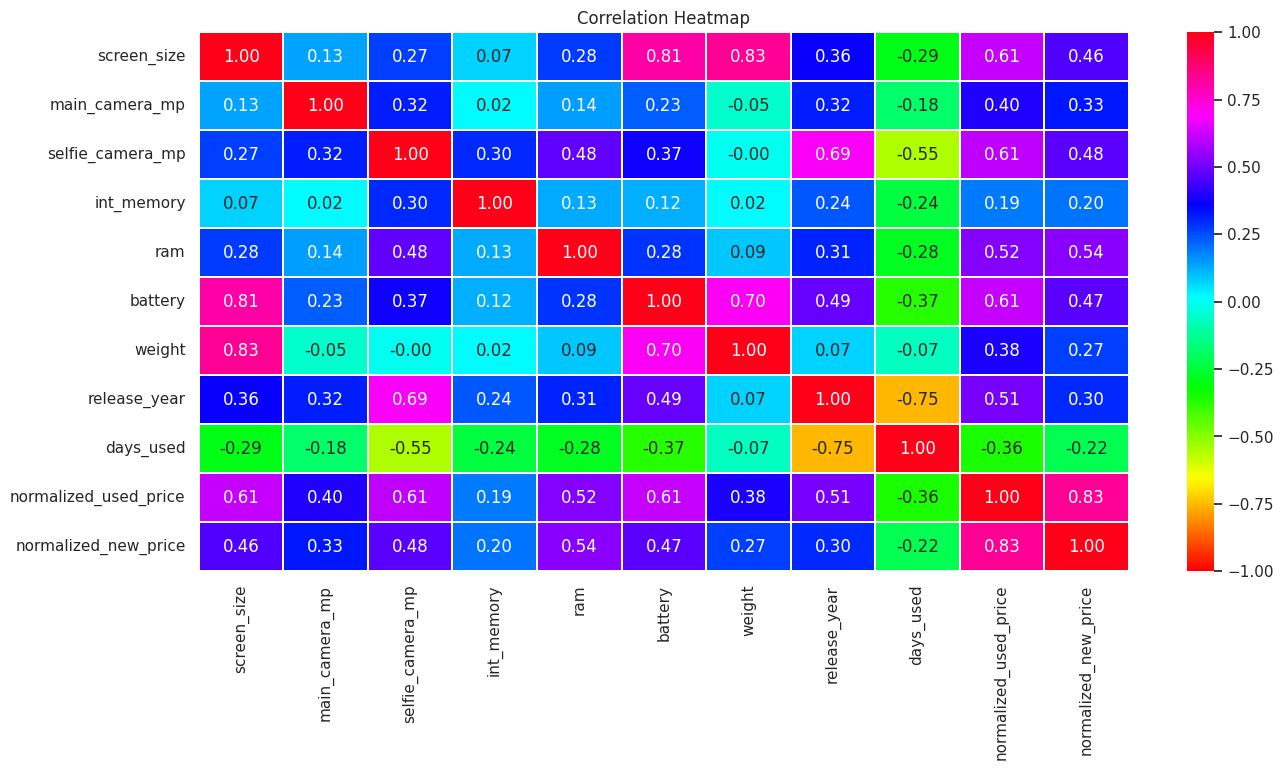

In [1192]:
heatmap_list = df2.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
corr_matrix = df2[heatmap_list].corr()

# Create the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    corr_matrix, annot=True, vmin=-1, vmax=1, cmap="hsv", fmt=".2f", linewidths=0.05
)
plt.title("Correlation Heatmap")
plt.show()

normalized_used_price is .83 positively correlated with normalized_new_price. This means the higher the normalized_new_price the higher the normalized_used_price tends to increase. <br>
normalized_used_price is .61 positively correlated with screen_size, selfie_camera_mp, and battery. This has a moderate impact on normalized_used_price. <br>
normalized_used_price is .52 positively correlated with ram. This has a moderate impact on normalized_used_price.<br>
normalized_used_price is .40 positively correlated with main_camera_mp. This has between and low and moderate impact on normalized_used_price. <br>
normalized_used_price is .38 positively correlated with weight. This has between and low and moderate impact on normalized_used_price. <br>
normalized_used_price is .19 positively correlated with weight. This is the least correlated column to normalized_used_price. It has a low impact on normalized_used_price. <br>
normalized_used_price is .36 negatively correlated with days_used. This has between and low and moderate impact on normalized_used_price.


**Outlier Check**

**Outlier Check on Screen size:**

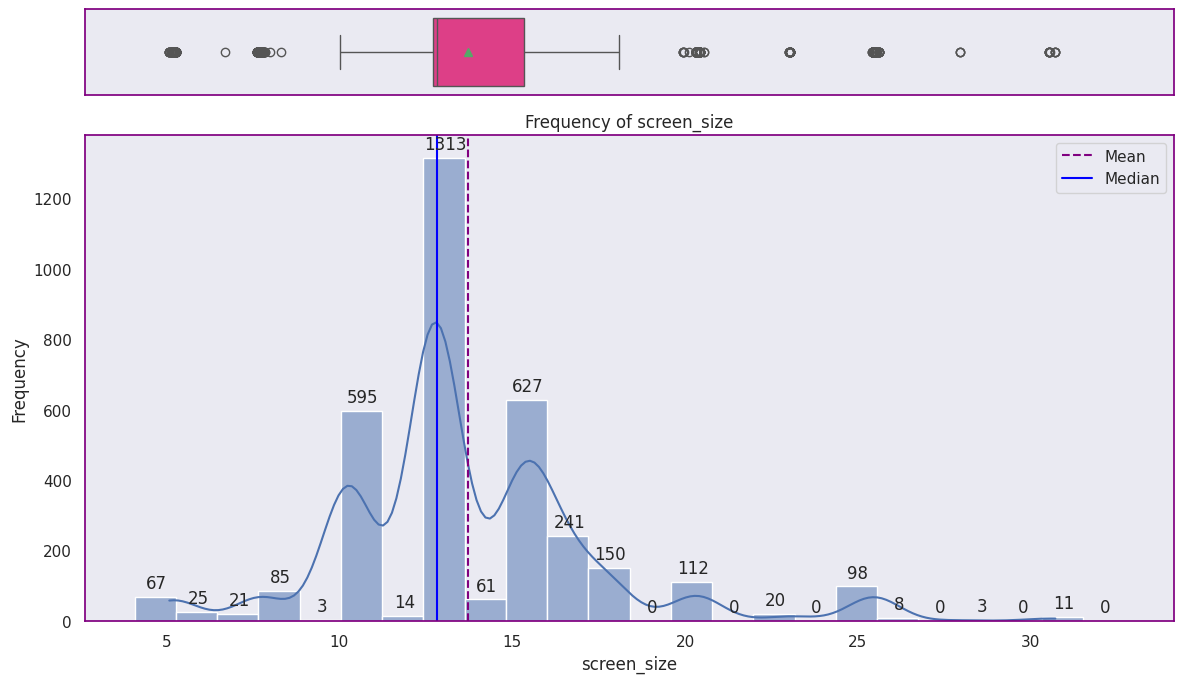

In [1193]:
histogram_boxplot(df2, "screen_size") # box_plot for main_camera_mp

In [1194]:
df2[df2["screen_size"]>20].describe()

screen_size  main_camera_mp  selfie_camera_mp  int_memory    ram  \
count       247.00          247.00            247.00      247.00 247.00   
mean         23.30            6.89              3.50       49.20   3.91   
std           2.91            3.23              3.28      111.09   1.07   
min          20.12            0.30              0.30        8.00   0.50   
25%          20.32            5.00              1.60       16.00   4.00   
50%          23.04            8.00              2.00       32.00   4.00   
75%          25.43            8.00              5.00       32.00   4.00   
max          30.71           13.00             24.00     1024.00  12.00   

       battery  weight  release_year  days_used  normalized_used_price  \
count   247.00  247.00        247.00     247.00                 247.00   
mean   5682.18  431.31       2015.81     682.99                   4.82   
std    1842.17  140.08          2.33     242.31                   0.40   
min    1200.00  118.00       2013.00     129.00                   3.83   
25%    4435.00  329.00       2014.00     546.00                   4.56   
50%    5200.00  439.00       2015.00     696.00                   4.78   
75%    7040.00  508.00       2018.00     886.50                   5.01   
max    9720.00  855.00       2020.00    1089.00                   6.62   

       normalized_new_price  
count                247.00  
mean                   5.61  
std                    0.55  
min                    4.39  
25%                    5.30  
50%                    5.56  
75%                    5.86  
max                    7.85

In [1195]:
df2[df2["screen_size"]>20].describe()

screen_size  main_camera_mp  selfie_camera_mp  int_memory    ram  \
count       247.00          247.00            247.00      247.00 247.00   
mean         23.30            6.89              3.50       49.20   3.91   
std           2.91            3.23              3.28      111.09   1.07   
min          20.12            0.30              0.30        8.00   0.50   
25%          20.32            5.00              1.60       16.00   4.00   
50%          23.04            8.00              2.00       32.00   4.00   
75%          25.43            8.00              5.00       32.00   4.00   
max          30.71           13.00             24.00     1024.00  12.00   

       battery  weight  release_year  days_used  normalized_used_price  \
count   247.00  247.00        247.00     247.00                 247.00   
mean   5682.18  431.31       2015.81     682.99                   4.82   
std    1842.17  140.08          2.33     242.31                   0.40   
min    1200.00  118.00       2013.00     129.00                   3.83   
25%    4435.00  329.00       2014.00     546.00                   4.56   
50%    5200.00  439.00       2015.00     696.00                   4.78   
75%    7040.00  508.00       2018.00     886.50                   5.01   
max    9720.00  855.00       2020.00    1089.00                   6.62   

       normalized_new_price  
count                247.00  
mean                   5.61  
std                    0.55  
min                    4.39  
25%                    5.30  
50%                    5.56  
75%                    5.86  
max                    7.85

Outliers do not appear to be errors.

**Outlier Check on main_camera_mp size:**

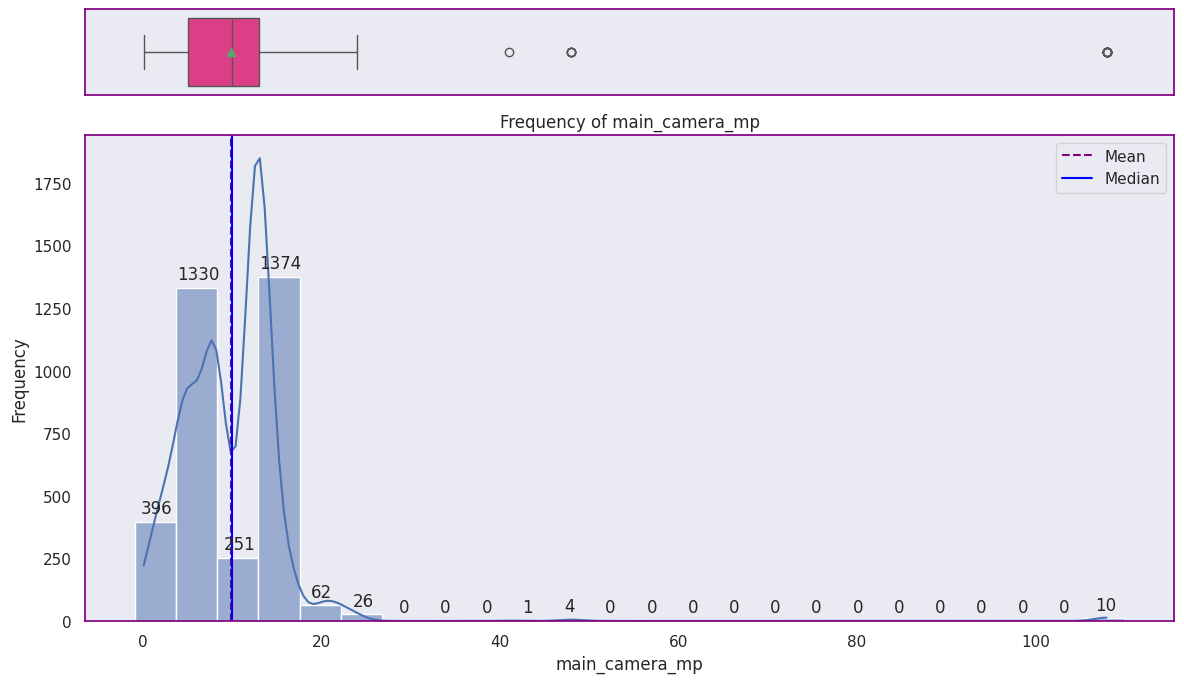

In [1196]:
histogram_boxplot(df2, "main_camera_mp") # box_plot for main_camera_mp

In [1197]:
df2[df2["main_camera_mp"]>40]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59      Infinix  Android        17.32  yes  no          108.00   
60      Infinix  Android        15.39  yes  no          108.00   
61      Infinix  Android        15.39  yes  no          108.00   
62      Infinix  Android        15.39  yes  no          108.00   
63      Infinix  Android        15.29  yes  no          108.00   
210         ZTE  Android        16.89  yes  no           48.00   
215         ZTE  Android        16.89  yes  no           48.00   
278     Infinix  Android        17.32  yes  no          108.00   
279     Infinix  Android        15.39  yes  no          108.00   
280     Infinix  Android        15.39  yes  no          108.00   
281     Infinix  Android        15.39  yes  no          108.00   
282     Infinix  Android        15.29  yes  no          108.00   
2097      Nokia  Windows        10.29  yes  no           41.00   
3240   Motorola  Android        15.34  yes  no           48.00   
3381   Motorola  Android        15.34  yes  no           48.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.00       32.00 2.00  6000.00  209.00          2020   
60                8.00       64.00 4.00  5000.00  185.00          2020   
61                8.00       32.00 2.00  5000.00  185.00          2020   
62               16.00       32.00 3.00  4000.00  178.00          2019   
63               16.00       32.00 2.00  4000.00  165.00          2019   
210              16.00      128.00 8.00  5000.00  215.00          2019   
215              16.00       64.00 6.00  5000.00  215.00          2019   
278               8.00       32.00 2.00  6000.00  209.00          2020   
279               8.00       64.00 4.00  5000.00  185.00          2020   
280               8.00       32.00 2.00  5000.00  185.00          2020   
281              16.00       32.00 3.00  4000.00  178.00          2019   
282              16.00       32.00 2.00  4000.00  165.00          2019   
2097              1.20       32.00 4.00  2000.00  158.00          2013   
3240             25.00      128.00 4.00  3600.00  165.00          2019   
3381             25.00      128.00 4.00  3600.00  165.00          2019   

      days_used  normalized_used_price  normalized_new_price device_cost_range  
59          245                   4.28                  4.60            Budget  
60          173                   4.36                  4.71            Budget  
61          256                   4.18                  4.51            Budget  
62          316                   4.56                  4.60            Budget  
63          468                   4.42                  4.87            Budget  
210         336                   5.67                  6.71           Premium  
215         506                   5.26                  6.22           Premium  
278         320                   4.41                  4.61            Budget  
279         173                   4.50                  4.70            Budget  
280         329                   4.37                  4.49            Budget  
281         356                   4.42                  4.61            Budget  
282         497                   4.42                  4.87            Budget  
2097        988                   5.11                  5.99         Mid-Range  
3240        371                   5.33                  5.54         Mid-Range  
3381        422                   5.33                  5.54         Mid-Range

Outliers do not appear to be errors.

**Outlier Check on selfie_camera_mp**

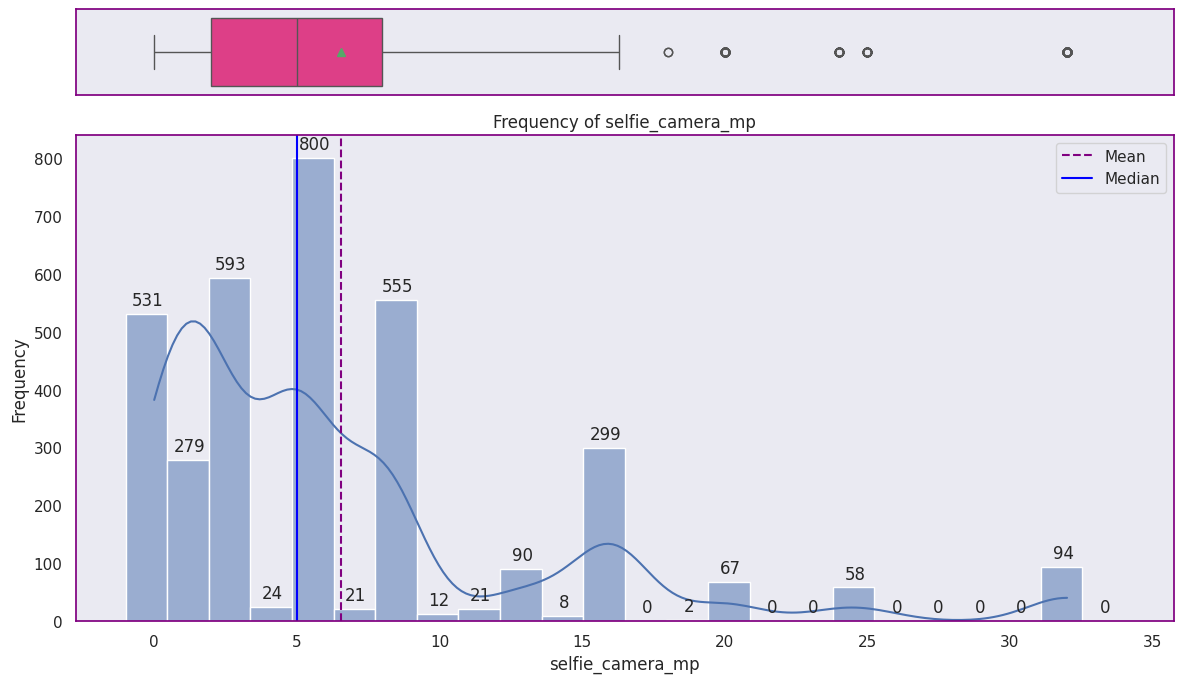

In [1198]:
histogram_boxplot(df2, "selfie_camera_mp") # box_plot for selfie_camera_mp

In [1199]:
selfie_outliers=df2[df2["selfie_camera_mp"]>25]
selfie_outliers.sample(n=10)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
73       Lenovo  Android        16.23  yes  yes            8.00   
3201      Honor  Android        15.77  yes   no           13.00   
122        Oppo  Android        16.64  yes  yes           13.00   
41       Huawei  Android        15.90  yes   no           13.00   
84           LG  Android        15.34  yes  yes            8.00   
3391       Oppo  Android        15.37  yes  yes           13.00   
3311     Xiaomi  Android        16.43  yes   no           12.00   
128        Oppo  Android        15.34  yes  yes            8.00   
3250       Oppo  Android        15.37  yes  yes           13.00   
347        Oppo  Android        15.34  yes  yes            8.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
73               32.00      128.00  6.00  4000.00  185.00          2019   
3201             32.00      128.00  4.00  3400.00  164.00          2019   
122              32.00      128.00  8.00  4000.00  172.00          2020   
41               32.00       64.00  6.00  4000.00  178.00          2019   
84               32.00      256.00  8.00  4000.00  192.00          2019   
3391             32.00      256.00 12.00  4025.00  171.00          2020   
3311             32.00      256.00  8.00  5260.00  208.00          2019   
128              32.00      128.00  8.00  4025.00  181.00          2019   
3250             32.00      256.00 12.00  4025.00  171.00          2020   
347              32.00      128.00  8.00  4025.00  181.00          2019   

      days_used  normalized_used_price  normalized_new_price device_cost_range  
73          370                   5.34                  5.99         Mid-Range  
3201        182                   3.85                  4.93            Budget  
122         187                   5.17                  6.15           Premium  
41          206                   5.00                  5.29         Mid-Range  
84          383                   5.47                  7.00           Premium  
3391        348                   5.63                  6.23           Premium  
3311        355                   5.53                  6.33           Premium  
128         397                   4.87                  6.09           Premium  
3250        227                   5.45                  6.23           Premium  
347         330                   4.90                  6.09           Premium

In [1200]:
df2[df2["selfie_camera_mp"]>25].describe()

screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
count        94.00           94.00             94.00       94.00 94.00   
mean         15.86           11.63             32.00      133.45  6.64   
std           0.49            2.01              0.00       47.54  1.84   
min          15.27            8.00             32.00       64.00  4.00   
25%          15.37           10.50             32.00      128.00  6.00   
50%          15.90           13.00             32.00      128.00  6.00   
75%          16.23           13.00             32.00      128.00  8.00   
max          16.94           13.00             32.00      256.00 12.00   

       battery  weight  release_year  days_used  normalized_used_price  \
count    94.00   94.00         94.00      94.00                  94.00   
mean   4089.36  181.58       2019.37     295.05                   5.16   
std     458.18   13.13          0.49     105.76                   0.32   
min    3340.00  152.90       2019.00      91.00                   3.85   
25%    4000.00  172.45       2019.00     213.50                   5.03   
50%    4000.00  180.00       2019.00     282.50                   5.18   
75%    4315.00  186.00       2020.00     367.25                   5.36   
max    6000.00  217.00       2020.00     520.00                   5.79   

       normalized_new_price  
count                 94.00  
mean                   5.87  
std                    0.47  
min                    4.93  
25%                    5.60  
50%                    5.88  
75%                    6.09  
max                    7.00

Appears the outliers might be in error since they are all 32 mp but their main_camera_mp are very low. <br>
Appear to be mistakes and should be dropped.

In [1201]:
df2.drop(selfie_camera_outliers.index,axis=0, inplace=True) # dropping the selfie_camera_mp outliers as there is no meanningful values.

In [1202]:
df2.shape

(3454, 16)

In [1203]:
df2.selfie_camera_mp.describe() # checking "selfie_camera" again using describe()

count   3454.00
mean       6.56
std        6.97
min        0.00
25%        2.00
50%        5.00
75%        8.00
max       32.00
Name: selfie_camera_mp, dtype: float64

**Outlier Check on int_memory**

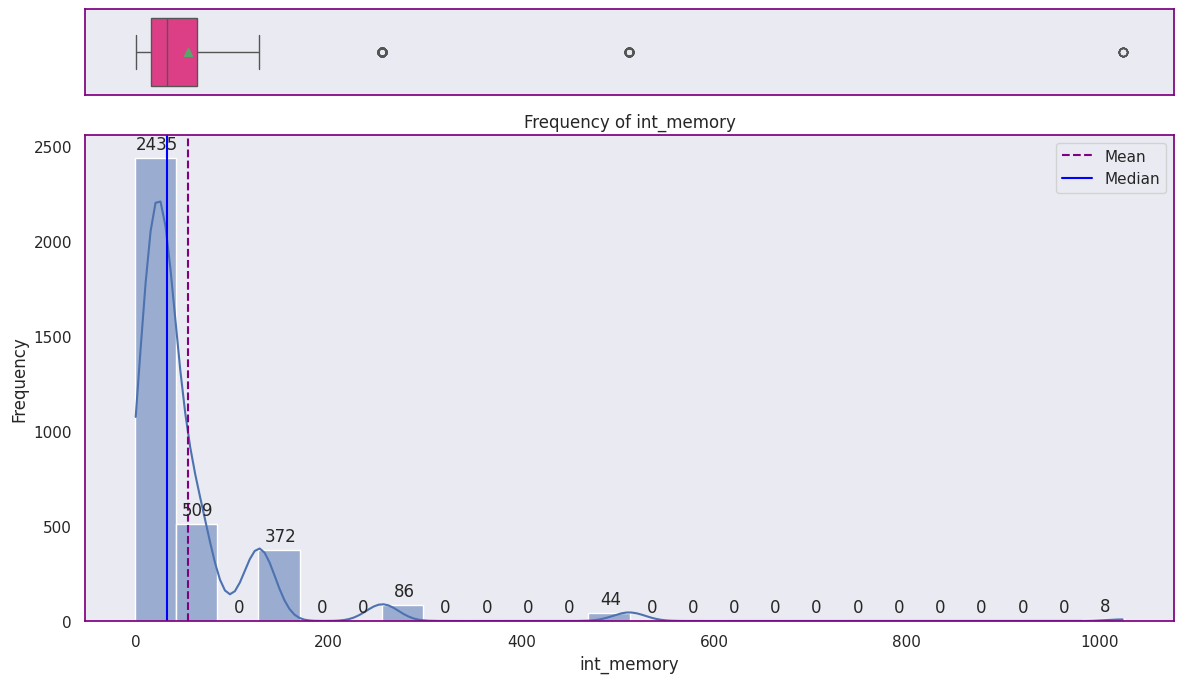

In [1204]:
histogram_boxplot(df2, "int_memory") # box_plot for int_memory

In [1205]:
df2[df2["int_memory"]>200].describe() # checking the values with >200 GM int_memory

screen_size  main_camera_mp  selfie_camera_mp  int_memory    ram  \
count       138.00          138.00            138.00      138.00 138.00   
mean         12.84            7.82              9.54      382.14   4.01   
std           4.73            4.97             10.10      198.65   3.89   
min           5.18            0.30              0.30      256.00   0.25   
25%           7.75            2.29              0.30      256.00   0.25   
50%          15.24            8.00              8.00      256.00   4.00   
75%          16.23           13.00             16.00      512.00   8.00   
max          30.71           16.00             32.00     1024.00  12.00   

       battery  weight  release_year  days_used  normalized_used_price  \
count   138.00  138.00        138.00     138.00                 138.00   
mean   2957.80  171.48       2016.35     581.54                   4.43   
std    1484.08   65.05          2.92     269.93                   1.23   
min    1000.00   75.00       2013.00     112.00                   2.06   
25%    1462.50  135.50       2013.00     356.50                   3.13   
50%    3300.00  166.50       2018.00     571.00                   4.94   
75%    4061.25  198.00       2019.00     827.75                   5.47   
max    9720.00  631.00       2020.00    1056.00                   6.62   

       normalized_new_price  
count                138.00  
mean                   5.44  
std                    1.39  
min                    2.95  
25%                    4.10  
50%                    5.99  
75%                    6.59  
max                    7.85

In [1206]:
df2[df2["int_memory"]>200].sample(n=10)

brand_name       os  screen_size   4g   5g  main_camera_mp  \
2944     Xiaomi  Android        15.21  yes   no           13.00   
161        Vivo  Android        17.50  yes  yes           13.00   
3334      Honor  Android        16.69  yes  yes           13.00   
2112    OnePlus  Android        16.28  yes   no           13.00   
1631     Lenovo  Android        10.16   no   no            3.15   
3166        ZTE  Android        10.16   no   no            3.15   
2251     Others  Android        12.70   no   no            5.00   
2932     Xiaomi  Android        15.70  yes   no           13.00   
1621     Lenovo  Android         7.75   no   no            2.00   
1645         LG  Android        15.24  yes   no           13.00   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
2944              5.00      256.00 4.00  3400.00  191.00          2018   
161              16.00      256.00 8.00  4500.00  219.50          2020   
3334              8.00      256.00 8.00  4000.00  190.00          2020   
2112             16.00      256.00 4.00  3700.00  185.00          2018   
1631              1.00      512.00 0.25  1500.00  134.00          2013   
3166              5.00      512.00 0.25  1400.00  120.00          2014   
2251              0.30     1024.00 4.00  2200.00  170.00          2013   
2932             20.00      256.00 4.00  4000.00  182.00          2018   
1621              1.00      512.00 0.25  1300.00  112.00          2013   
1645              5.00      256.00 4.00  3300.00  158.00          2018   

      days_used  normalized_used_price  normalized_new_price device_cost_range  
2944        590                   5.19                  5.99         Mid-Range  
161         226                   5.47                  6.45           Premium  
3334        266                   5.56                  6.45           Premium  
2112        496                   5.00                  6.31           Premium  
1631        836                   3.56                  4.51            Budget  
3166       1006                   3.17                  4.10            Budget  
2251        584                   4.07                  5.14            Budget  
2932        390                   4.91                  5.67         Mid-Range  
1621        987                   3.18                  4.24            Budget  
1645        366                   5.40                  6.48           Premium

Outliers do not appear to be errors.

**Outlier Check on ram**

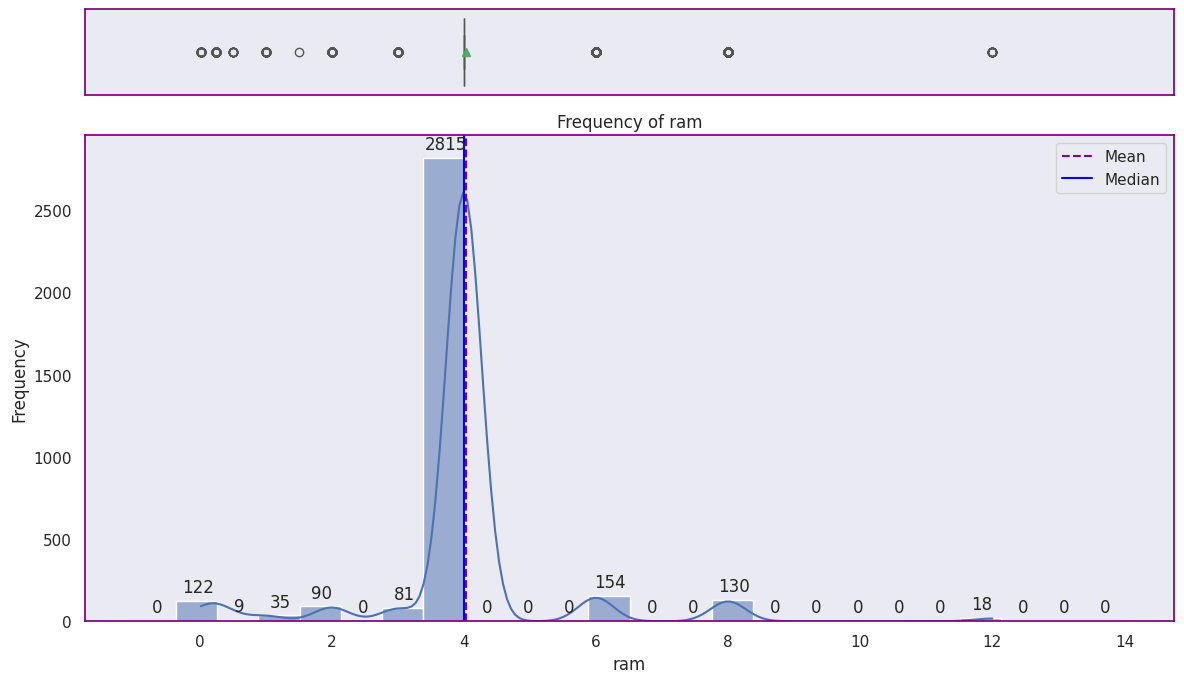

In [1207]:
histogram_boxplot(df2, "ram")

In [1208]:
quartiles = np.quantile(df2['ram'][df2['ram'].notnull()], [.25, .75]) # specifying 1st and 3rd quartile limits
ram_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {ram_4iqr}') # getting the values outside 4 times of IQR
outlier_quartiles = df2.loc[np.abs(df2['ram'] - df2['ram'].median()) > ram_4iqr, 'ram'] # printing those values
outlier_quartiles

Q1 = 4.0, Q3 = 4.0, 4*IQR = 0.0


0      3.00
1      8.00
2      8.00
3      6.00
4      3.00
       ... 
3449   6.00
3450   8.00
3451   3.00
3452   2.00
3453   2.00
Name: ram, Length: 639, dtype: float64

Going to drop ram since most are 4GB. Doesn't appear ram has much impact on anything.

In [1209]:
# Dropping the column ram
df2.drop("ram", axis=1, inplace=True)

**Outlier Check on battery**

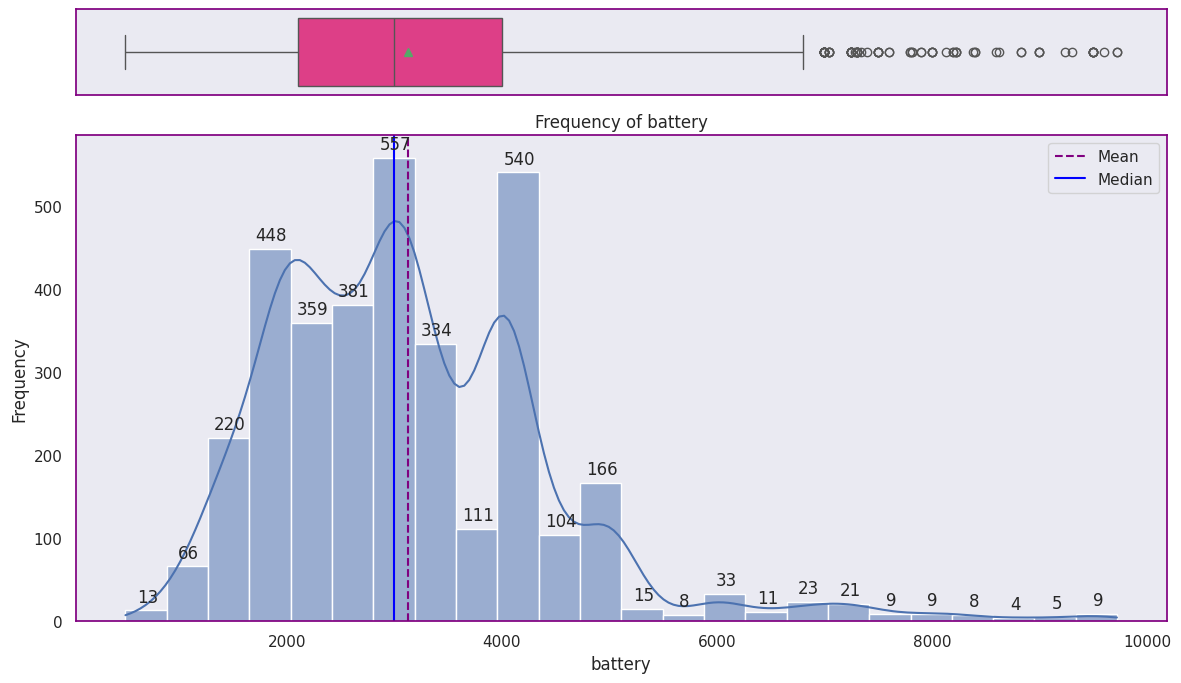

In [1210]:
histogram_boxplot(df2, "battery")

In [1211]:
df2[df2["battery"]>6000].describe() # checking the details of batteries with more than 6000 mAh

screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  \
count       110.00          110.00            110.00      110.00   110.00   
mean         24.49            8.42              4.25       60.80  7467.80   
std           3.54            3.49              2.80      136.21   993.13   
min          12.83            2.00              0.30       16.00  6020.00   
25%          25.41            5.00              2.00       16.00  6800.00   
50%          25.43            8.00              5.00       32.00  7250.00   
75%          25.50           12.00              8.00       64.00  8000.00   
max          30.71           16.00              8.00     1024.00  9720.00   

       weight  release_year  days_used  normalized_used_price  \
count  110.00        110.00     110.00                 110.00   
mean   488.70       2016.18     655.05                   4.96   
std    139.49          2.41     253.31                   0.32   
min    130.40       2013.00     139.00                   4.34   
25%    452.50       2014.00     468.25                   4.74   
50%    488.00       2016.00     645.50                   4.96   
75%    575.00       2018.75     891.25                   5.13   
max    855.00       2020.00    1089.00                   6.16   

       normalized_new_price  
count                110.00  
mean                   5.78  
std                    0.43  
min                    5.07  
25%                    5.52  
50%                    5.70  
75%                    5.99  
max                    7.05

In [1212]:
df2[df2["battery"]>6000].sample(n=10)

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1031     Gionee  Android        15.24  yes  no           12.00   
2371    Samsung  Android        25.53  yes  no           13.00   
51       Huawei  Android        20.42  yes  no           13.00   
33       Huawei  Android        25.50  yes  no            8.00   
1035     Gionee  Android        12.88  yes  no           13.00   
664       Apple      iOS        23.04  yes  no            8.00   
2546    Samsung  Android        25.53  yes  no            8.00   
2585    Samsung  Android        30.53   no  no            8.00   
2588    Samsung  Android        25.43   no  no            8.00   
1545     Lenovo  Android        20.32   no  no            8.00   

      selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
1031              8.00       64.00  6020.00  215.00          2017        623   
2371              8.00      128.00  7040.00  400.00          2019        252   
51                8.00       64.00  6100.00  320.00          2019        462   
33                8.00       64.00  7250.00  450.00          2020        211   
1035              8.00      128.00  7000.00  238.00          2016        656   
664               1.20       16.00  7340.00  437.00          2014        914   
2546              2.10       16.00  7900.00  467.00          2014        723   
2585              2.00       32.00  9500.00  732.00          2014        799   
2588              2.00       16.00  8220.00  469.00          2014        920   
1545              5.00       16.00  6200.00  467.20          2015        770   

      normalized_used_price  normalized_new_price device_cost_range  
1031                   4.99                  6.13           Premium  
2371                   5.36                  6.04           Premium  
51                     5.00                  5.56         Mid-Range  
33                     5.13                  5.52         Mid-Range  
1035                   5.67                  7.05           Premium  
664                    4.59                  6.09           Premium  
2546                   4.63                  6.09           Premium  
2585                   5.33                  6.15           Premium  
2588                   4.74                  5.89         Mid-Range  
1545                   4.72                  5.07            Budget

Outliers do not appear to be errors. They seem to be inline with screen size and weight

**Outlier Check on weight**

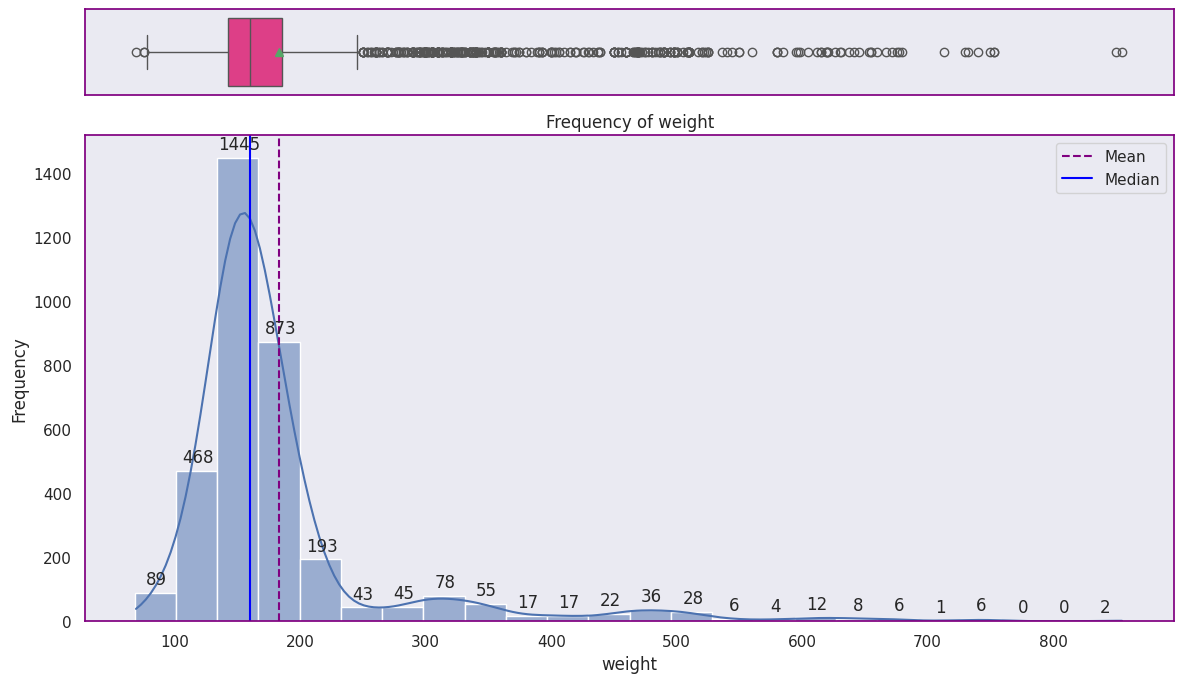

In [1213]:
histogram_boxplot(df2, "weight")

In [1214]:
df2[df2["weight"]>300] # checking the details of devices weighs >300 grams

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android        25.50  yes  yes           13.00   
21       Others  Android        20.32   no   no            8.00   
31       Huawei  Android        20.32  yes   no            5.00   
33       Huawei  Android        25.50  yes   no            8.00   
36       Huawei  Android        25.60  yes  yes           13.00   
...         ...      ...          ...  ...  ...             ...   
2996     Xiaomi  Android        18.01   no   no            8.00   
3030       XOLO  Android        17.78   no   no            5.00   
3039       XOLO  Android        17.78   no   no            2.00   
3040       XOLO  Android        20.32   no   no            2.00   
3051     Others  Android        12.83  yes   no           16.00   

      selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
3                 8.00       64.00  7250.00  480.00          2020        345   
21                0.30       16.00  5680.00  453.60          2013        933   
31                2.00       16.00  5100.00  310.00          2020        231   
33                8.00       64.00  7250.00  450.00          2020        211   
36                8.00      128.00  7250.00  460.00          2020        139   
...                ...         ...      ...     ...           ...        ...   
2996              5.00       16.00  6700.00  360.00          2014        615   
3030              0.30       16.00  4100.00  320.00          2013        686   
3039              0.65       32.00  4000.00  338.00          2013       1039   
3040              0.30       16.00  4000.00  480.00          2013       1004   
3051              8.00       32.00  9000.00  469.00          2018        621   

      normalized_used_price  normalized_new_price device_cost_range  
3                      5.14                  5.63         Mid-Range  
21                     4.45                  5.48         Mid-Range  
31                     4.17                  4.60            Budget  
33                     5.13                  5.52         Mid-Range  
36                     5.18                  6.31           Premium  
...                     ...                   ...               ...  
2996                   4.46                  5.49         Mid-Range  
3030                   4.21                  5.24            Budget  
3039                   4.27                  4.69            Budget  
3040                   4.38                  4.78            Budget  
3051                   4.94                  5.52         Mid-Range  

[287 rows x 15 columns]

Weight is skewed. Creating a log to try to make it a more normal distribution.

Text(0.5, 43.249999999999986, 'Weight of Phone in Grams')

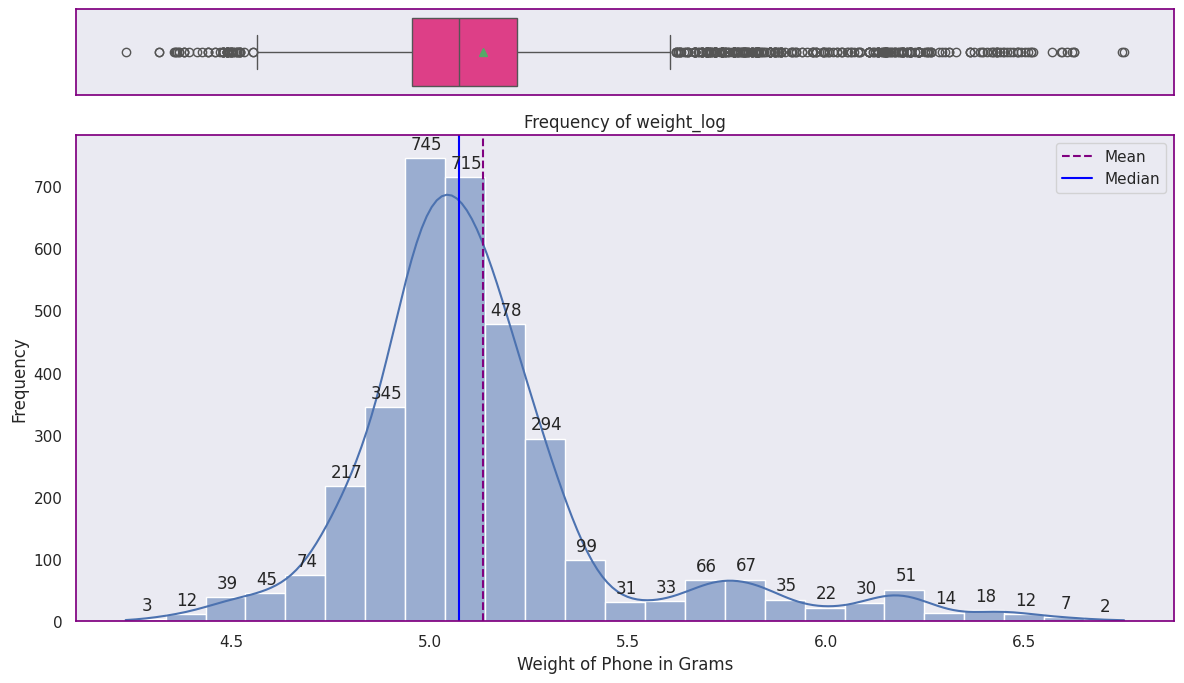

In [1215]:
df2["weight_log"] = np.log(df2["weight"])  # normalized_used_price column

histogram_boxplot(df2, "weight_log", bins=25)
plt.xlabel("Weight of Phone in Grams")

In [1216]:
df2.weight_log.describe()

count   3454.00
mean       5.14
std        0.34
min        4.23
25%        4.96
50%        5.08
75%        5.22
max        6.75
Name: weight_log, dtype: float64

In [1217]:
df2[df2["weight"]>6] # checking the details of devices weighs >6

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no           13.00   
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
4         Honor  Android        15.32  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   
3451    Alcatel  Android        15.80  yes   no           13.00   
3452    Alcatel  Android        15.80  yes   no           13.00   
3453    Alcatel  Android        12.83  yes   no           13.00   

      selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
0                 5.00       64.00  3020.00  146.00          2020        127   
1                16.00      128.00  4300.00  213.00          2020        325   
2                 8.00      128.00  4200.00  213.00          2020        162   
3                 8.00       64.00  7250.00  480.00          2020        345   
4                 8.00       64.00  5000.00  185.00          2020        293   
...                ...         ...      ...     ...           ...        ...   
3449              8.00       64.00  5000.00  190.00          2019        232   
3450              8.00      128.00  4000.00  200.00          2018        541   
3451              5.00       32.00  4000.00  165.00          2020        201   
3452              5.00       32.00  4000.00  160.00          2020        149   
3453              5.00       16.00  4000.00  168.00          2020        176   

      normalized_used_price  normalized_new_price device_cost_range  \
0                      4.31                  4.72            Budget   
1                      5.16                  5.52         Mid-Range   
2                      5.11                  5.88         Mid-Range   
3                      5.14                  5.63         Mid-Range   
4                      4.39                  4.95            Budget   
...                     ...                   ...               ...   
3449                   4.49                  6.48           Premium   
3450                   5.04                  6.25           Premium   
3451                   4.36                  4.53            Budget   
3452                   4.35                  4.62            Budget   
3453                   4.13                  4.28            Budget   

      weight_log  
0           4.98  
1           5.36  
2           5.36  
3           6.17  
4           5.22  
...          ...  
3449        5.25  
3450        5.30  
3451        5.11  
3452        5.08  
3453        5.12  

[3454 rows x 16 columns]

Outliers do not appear to be errors. They seem to be inline with screen size and battery

**Outlier Check on days_used**

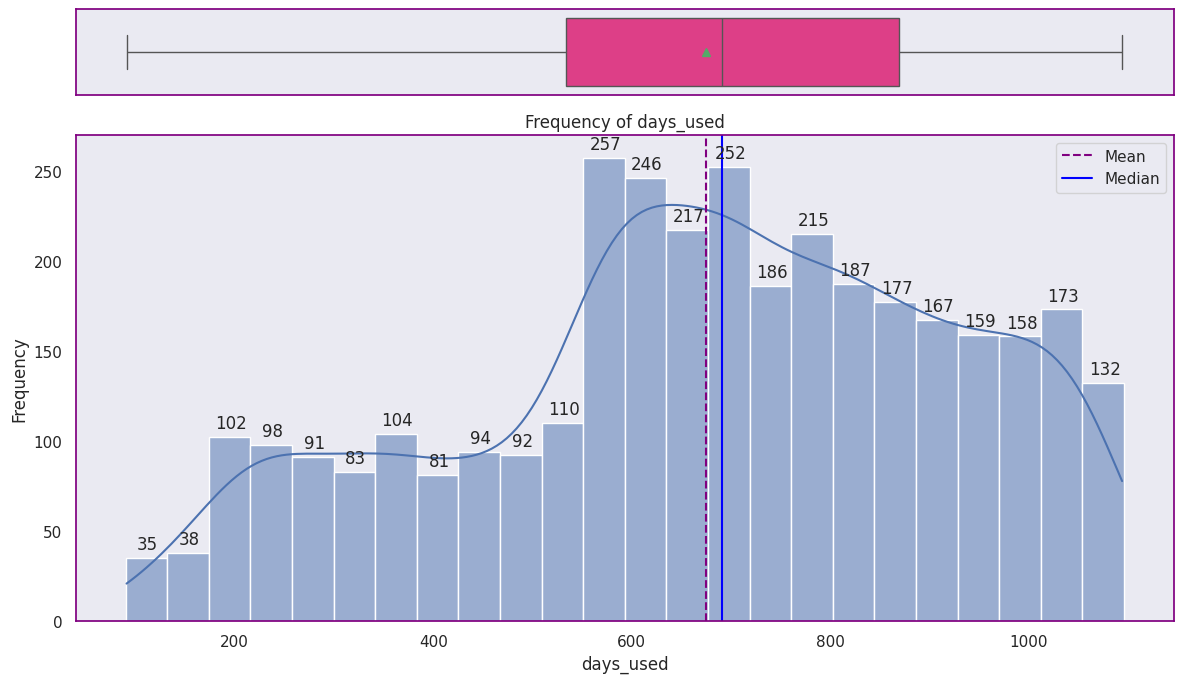

In [1218]:
histogram_boxplot(df2, "days_used")

There are no outliers

**Outlier Checks on normalized_new_price**

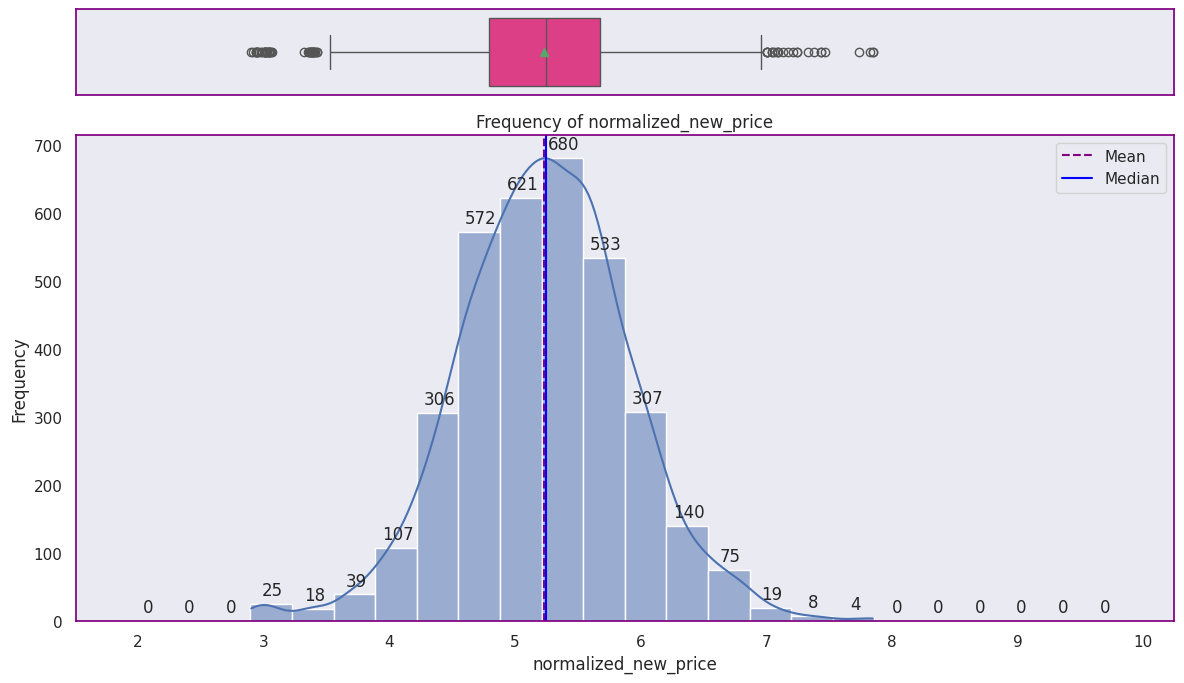

In [1219]:
histogram_boxplot(df2, "normalized_new_price")

In [1220]:
df2[df2["normalized_new_price"]>6] # checking the devices values >6

brand_name       os  screen_size   4g   5g  main_camera_mp  \
12        Honor  Android        16.69  yes  yes           13.00   
25          HTC  Android        15.24  yes   no           13.00   
34       Huawei  Android        16.71  yes  yes           10.50   
36       Huawei  Android        25.60  yes  yes           13.00   
40       Huawei  Android        25.60  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3446      Apple      iOS        12.90  yes   no            8.00   
3447      Apple      iOS        15.27  yes   no            8.00   
3448       Asus  Android        16.74  yes   no           13.00   
3449       Asus  Android        15.34  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   

      selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
12               16.00      128.00  4100.00  206.00          2019        537   
25               14.50      128.00  3930.00  180.00          2019        202   
34               16.00      256.00  4200.00  226.00          2020        120   
36                8.00      128.00  7250.00  460.00          2020        139   
40                8.00      128.00  7250.00  460.00          2019        256   
...                ...         ...      ...     ...           ...        ...   
3446              7.00       64.00  3046.00  188.00          2019        351   
3447              7.00       64.00  3110.00  194.00          2019        208   
3448             24.00      128.00  6000.00  240.00          2019        325   
3449              8.00       64.00  5000.00  190.00          2019        232   
3450              8.00      128.00  4000.00  200.00          2018        541   

      normalized_used_price  normalized_new_price device_cost_range  \
12                     5.38                  6.21           Premium   
25                     5.21                  6.04           Premium   
34                     6.15                  7.24           Premium   
36                     5.18                  6.31           Premium   
40                     5.00                  6.11           Premium   
...                     ...                   ...               ...   
3446                   5.44                  6.71           Premium   
3447                   5.10                  6.29           Premium   
3448                   5.72                  7.06           Premium   
3449                   4.49                  6.48           Premium   
3450                   5.04                  6.25           Premium   

      weight_log  
12          5.33  
25          5.19  
34          5.42  
36          6.13  
40          6.13  
...          ...  
3446        5.24  
3447        5.27  
3448        5.48  
3449        5.25  
3450        5.30  

[391 rows x 16 columns]

These are newer phones so the price seems not in error. Seems comparable with the release_year.

**Outlier Checks on used_price**

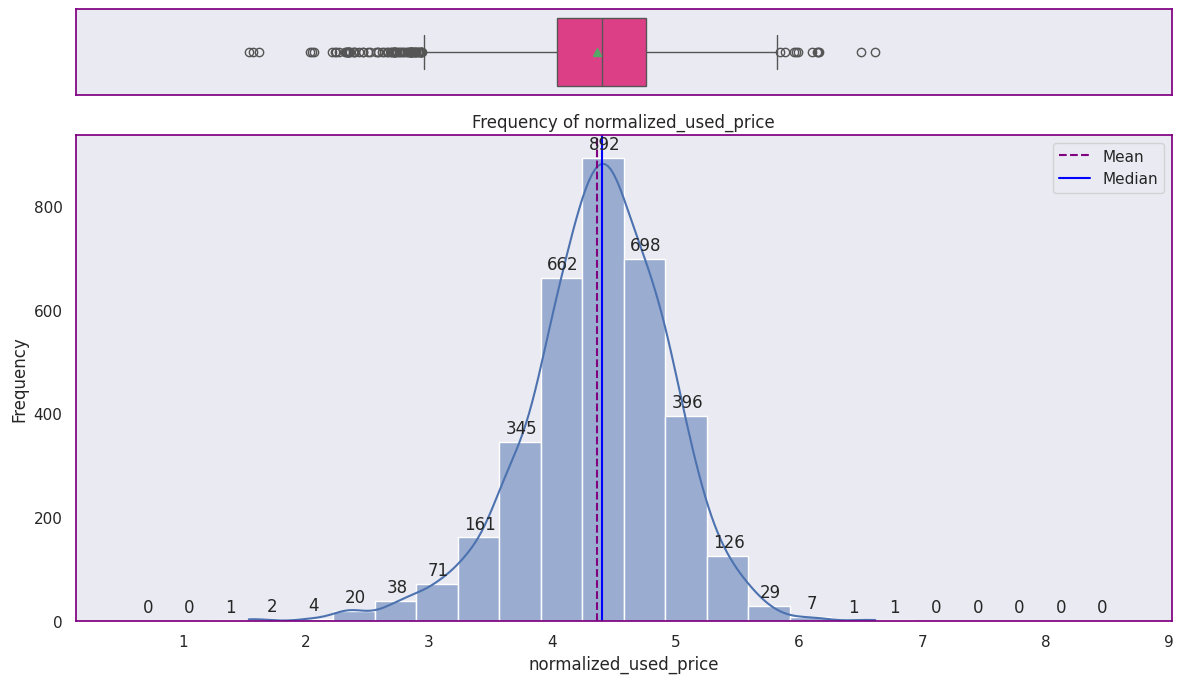

In [1221]:
histogram_boxplot(df2, "normalized_used_price")

In [1222]:
df2[df2["normalized_used_price"]<3] # fetching the details of devices <3 Euros

brand_name       os  screen_size   4g  5g  main_camera_mp  \
104    Micromax  Android         7.75   no  no            0.30   
105    Micromax  Android        10.03   no  no            2.00   
107    Micromax  Android         7.75   no  no            0.30   
113       Nokia   Others         5.18   no  no            0.30   
114       Nokia   Others         5.18   no  no            0.30   
117       Nokia   Others         5.18  yes  no            0.30   
141      Realme  Android        15.27  yes  no           13.00   
323    Micromax  Android         7.75   no  no            0.30   
326    Micromax  Android         7.75   no  no            0.30   
332       Nokia   Others         5.18   no  no            0.30   
333       Nokia   Others         5.18   no  no            0.30   
336       Nokia   Others         5.18  yes  no            0.30   
360      Realme  Android        15.27  yes  no           13.00   
381      Others  Android        17.78   no  no            8.00   
516     Alcatel   Others         7.75   no  no            2.00   
520     Alcatel   Others         7.75   no  no            1.30   
528     Alcatel  Android         7.75   no  no            2.00   
533     Alcatel   Others         5.18   no  no            0.30   
534     Alcatel   Others         5.18   no  no            2.00   
545     Alcatel   Others         5.18   no  no            2.00   
558     Alcatel  Android         7.75   no  no            2.00   
618      Others   Others         5.18   no  no            0.08   
630      Others   Others         5.28   no  no            2.00   
636      Others  Android        17.78   no  no            2.00   
884      Others   Others         5.08   no  no            1.30   
885      Others   Others         5.08   no  no            0.30   
886      Others   Others         5.28   no  no            1.30   
889      Others  Android         7.75   no  no            2.00   
896      Others   Others         5.28   no  no            1.30   
897      Others   Others         5.18   no  no            0.30   
898      Others   Others         5.08   no  no            1.30   
946      Celkon  Android         7.75   no  no            3.15   
950      Celkon  Android         7.75   no  no            3.15   
951      Celkon   Others         7.75   no  no            1.30   
952      Celkon   Others         5.18   no  no            1.30   
953      Celkon   Others         5.28   no  no            1.30   
954      Celkon   Others         5.23   no  no            1.30   
955      Celkon   Others         5.23   no  no            0.30   
957      Celkon  Android        10.16   no  no            3.15   
959      Celkon  Android         7.75   no  no            1.30   
963      Celkon   Others        10.16   no  no            2.00   
964      Celkon   Others         7.75   no  no            2.00   
965      Celkon   Others         5.18   no  no            1.30   
966      Celkon   Others         5.18   no  no            1.30   
967      Celkon   Others         5.23   no  no            1.30   
968      Celkon   Others         5.23   no  no            1.30   
1465       Lava  Android        10.16   no  no            3.15   
1466       Lava  Android         7.75   no  no            2.00   
1467       Lava  Android         7.75   no  no            2.00   
1468       Lava  Android        10.16   no  no            2.00   
1784         LG   Others         5.13   no  no            1.30   
1898   Micromax   Others         5.28   no  no            0.30   
1903   Micromax   Others         5.18   no  no            0.30   
1904   Micromax   Others         5.16   no  no            0.30   
1906   Micromax  Android         7.75   no  no            1.30   
1924   Micromax   Others         5.28   no  no            0.30   
1925   Micromax   Others         5.28   no  no            0.30   
1926   Micromax   Others         5.23   no  no            0.30   
1927   Micromax   Others         5.18   no  no            0.30   
1928   Micromax   Others         5.13   no  n

In [1223]:
df2[df2["normalized_used_price"]>5] # fetching the details of devices >5 Euros

brand_name       os  screen_size   4g   5g  main_camera_mp  \
1         Honor  Android        17.30  yes  yes           13.00   
2         Honor  Android        16.69  yes  yes           13.00   
3         Honor  Android        25.50  yes  yes           13.00   
12        Honor  Android        16.69  yes  yes           13.00   
16        Honor  Android        15.90  yes   no           13.00   
...         ...      ...          ...  ...  ...             ...   
3445      Apple      iOS        15.37  yes   no            8.00   
3446      Apple      iOS        12.90  yes   no            8.00   
3447      Apple      iOS        15.27  yes   no            8.00   
3448       Asus  Android        16.74  yes   no           13.00   
3450       Asus  Android        15.24  yes   no           13.00   

      selfie_camera_mp  int_memory  battery  weight  release_year  days_used  \
1                16.00      128.00  4300.00  213.00          2020        325   
2                 8.00      128.00  4200.00  213.00          2020        162   
3                 8.00       64.00  7250.00  480.00          2020        345   
12               16.00      128.00  4100.00  206.00          2019        537   
16               32.00      128.00  3750.00  172.00          2019        395   
...                ...         ...      ...     ...           ...        ...   
3445              7.00       64.00  3969.00  226.00          2019        298   
3446              7.00       64.00  3046.00  188.00          2019        351   
3447              7.00       64.00  3110.00  194.00          2019        208   
3448             24.00      128.00  6000.00  240.00          2019        325   
3450              8.00      128.00  4000.00  200.00          2018        541   

      normalized_used_price  normalized_new_price device_cost_range  \
1                      5.16                  5.52         Mid-Range   
2                      5.11                  5.88         Mid-Range   
3                      5.14                  5.63         Mid-Range   
12                     5.38                  6.21           Premium   
16                     5.02                  5.52         Mid-Range   
...                     ...                   ...               ...   
3445                   5.34                  6.73           Premium   
3446                   5.44                  6.71           Premium   
3447                   5.10                  6.29           Premium   
3448                   5.72                  7.06           Premium   
3450                   5.04                  6.25           Premium   

      weight_log  
1           5.36  
2           5.36  
3           6.17  
12          5.33  
16          5.15  
...          ...  
3445        5.42  
3446        5.24  
3447        5.27  
3448        5.48  
3450        5.30  

[416 rows x 16 columns]

Outliers are not in error. They appear to be the result of brand and release year

In [1224]:
# Check for outliers
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3454 non-null   float64 
 6   selfie_camera_mp       3454 non-null   float64 
 7   int_memory             3454 non-null   float64 
 8   battery                3454 non-null   float64 
 9   weight                 3454 non-null   float64 
 10  release_year           3454 non-null   int64   
 11  days_used              3454 non-null   int64   
 12  normalized_used_price  3454 non-null   float64 
 13  normalized_new_price   3454 non-null   float64 
 14  device_cost_range      3454 non-null   c

<Figure size 2000x3000 with 0 Axes>

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623ddb8ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623eee1360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623e08fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623eee1780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623eee30a0>],
 'means': []}

Text(0.5, 1.0, 'screen_size')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62507265c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62507272e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6250726500>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6250725b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62507277f0>],
 'means': []}

Text(0.5, 1.0, 'main_camera_mp')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623f9c93c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623f9c8d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623f9c9bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623f9cb880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623f9cb700>],
 'means': []}

Text(0.5, 1.0, 'selfie_camera_mp')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f624a750b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f624a7518a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f624a750a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f624a7524a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f624a7512a0>],
 'means': []}

Text(0.5, 1.0, 'int_memory')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62402faa70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62402fafb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f62402fa7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f62402fb520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62402fb7c0>],
 'means': []}

Text(0.5, 1.0, 'battery')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d7c2770>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d7c2cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d7c24d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d7c31f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d7c3490>],
 'means': []}

Text(0.5, 1.0, 'weight')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d34f430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d34f970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d34f190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d34feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d384190>],
 'means': []}

Text(0.5, 1.0, 'release_year')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d385d20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d3d0820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d3a5840>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d3d0d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d3d1000>],
 'means': []}

Text(0.5, 1.0, 'days_used')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d238310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d238850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d238070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d238d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d239030>],
 'means': []}

Text(0.5, 1.0, 'normalized_used_price')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d2942b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d2947f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d25bfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d294d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d294fd0>],
 'means': []}

Text(0.5, 1.0, 'normalized_new_price')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d2e44f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d2e4940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d2e4250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d2e4e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d2e5120>],
 'means': []}

Text(0.5, 1.0, 'weight_log')

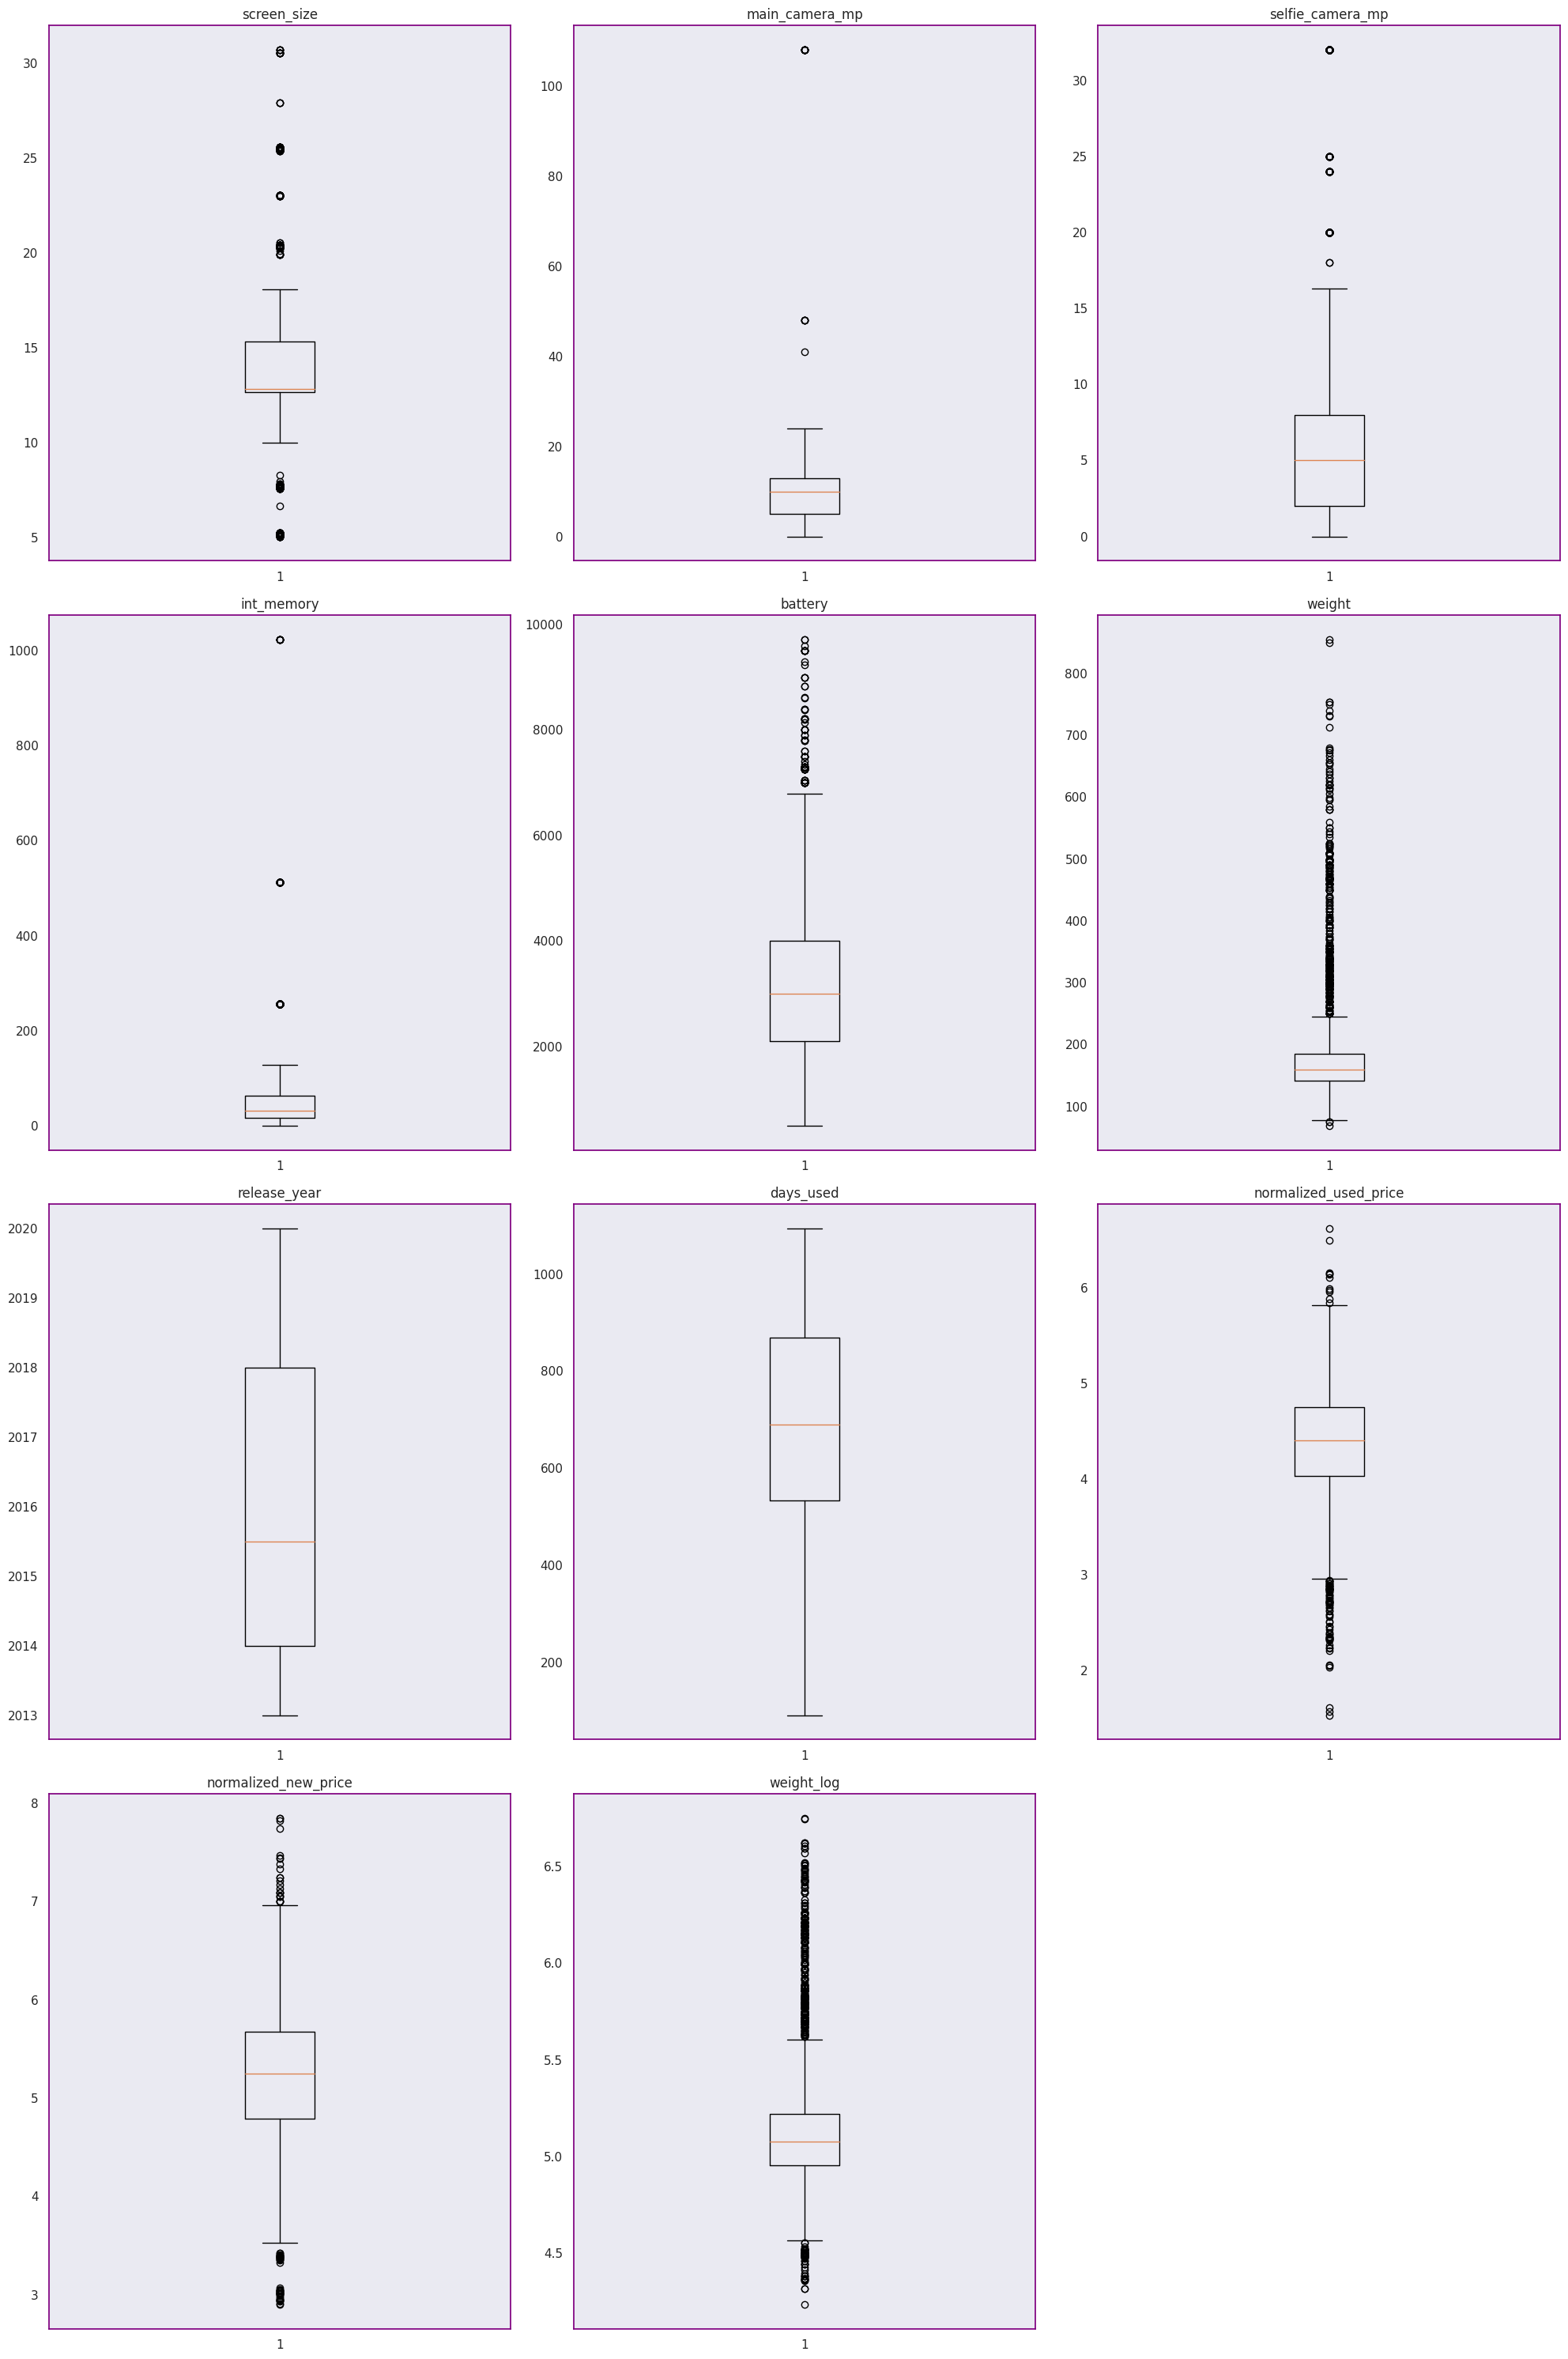

Text(0.5, 1.0, 'Numerical Column Boxplots')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f623d142dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f623d143310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f623d142b30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f623d143850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f623d143af0>],
 'means': []}

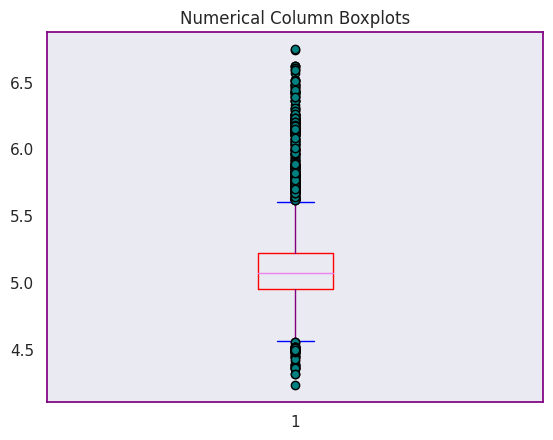

In [1225]:
numeric_columns = df2.select_dtypes(include=np.number).columns.to_list()


# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Update color properties
boxprops = dict(color="red")  # Change the box color to red
capprops = dict(color="blue")  # Change the cap color to blue
whiskerprops = dict(color="purple")  # Change the whisker color to purple
flierprops = dict(markerfacecolor="teal")  # Change the flier marker color to teal
medianprops = dict(color="violet")  # Change the median line color to violet

# Apply the updated properties
fig, ax = plt.subplots()
ax.set_title("Numerical Column Boxplots")

plt.boxplot(
    df2[variable],
    whis=1.5,
    boxprops=boxprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    flierprops=flierprops,
    medianprops=medianprops,
)
plt.show()

<Figure size 1500x4500 with 0 Axes>

<Axes: >

(array([ 92.,   0.,   0.,   1.,  16.,  88.,   1.,   0.,   0., 194., 404.,
          0.,   2.,  12., 720., 589.,   6.,  31.,  28., 342., 247., 119.,
        135.,  31., 127.,  17.,   0.,   0.,   4., 106.,   2.,   0.,   0.,
          0.,   5.,  15.,   0.,   0.,   0.,  98.,   8.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,  11.]),
 array([ 5.08  ,  5.5926,  6.1052,  6.6178,  7.1304,  7.643 ,  8.1556,
         8.6682,  9.1808,  9.6934, 10.206 , 10.7186, 11.2312, 11.7438,
        12.2564, 12.769 , 13.2816, 13.7942, 14.3068, 14.8194, 15.332 ,
        15.8446, 16.3572, 16.8698, 17.3824, 17.895 , 18.4076, 18.9202,
        19.4328, 19.9454, 20.458 , 20.9706, 21.4832, 21.9958, 22.5084,
        23.021 , 23.5336, 24.0462, 24.5588, 25.0714, 25.584 , 26.0966,
        26.6092, 27.1218, 27.6344, 28.147 , 28.6596, 29.1722, 29.6848,
        30.1974, 30.71  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'screen_size')

<Axes: >

(array([2.690e+02, 1.370e+02, 5.500e+02, 7.700e+02, 3.600e+01, 1.415e+03,
        1.900e+01, 1.550e+02, 9.000e+00, 5.300e+01, 2.100e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+01]),
 array([8.000000e-02, 2.238400e+00, 4.396800e+00, 6.555200e+00,
        8.713600e+00, 1.087200e+01, 1.303040e+01, 1.518880e+01,
        1.734720e+01, 1.950560e+01, 2.166400e+01, 2.382240e+01,
        2.598080e+01, 2.813920e+01, 3.029760e+01, 3.245600e+01,
        3.461440e+01, 3.677280e+01, 3.893120e+01, 4.108960e+01,
        4.324800e+01, 4.540640e+01, 4.756480e+01, 4.9723

Text(0.5, 1.0, 'main_camera_mp')

<Axes: >

(array([531.,  87., 192., 586.,   7.,   4.,  20., 800.,   0.,   0.,  21.,
          0., 551.,   0.,   4.,  10.,   2.,   0.,  21.,   0.,  90.,   3.,
          5.,   0.,   0., 299.,   0.,   0.,   2.,   0.,   0.,  67.,   0.,
          0.,   0.,   0.,   0.,  30.,   0.,  28.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  94.]),
 array([ 0.  ,  0.64,  1.28,  1.92,  2.56,  3.2 ,  3.84,  4.48,  5.12,
         5.76,  6.4 ,  7.04,  7.68,  8.32,  8.96,  9.6 , 10.24, 10.88,
        11.52, 12.16, 12.8 , 13.44, 14.08, 14.72, 15.36, 16.  , 16.64,
        17.28, 17.92, 18.56, 19.2 , 19.84, 20.48, 21.12, 21.76, 22.4 ,
        23.04, 23.68, 24.32, 24.96, 25.6 , 26.24, 26.88, 27.52, 28.16,
        28.8 , 29.44, 30.08, 30.72, 31.36, 32.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'selfie_camera_mp')

<Axes: >

(array([1351., 1084.,    0.,  509.,    0.,    0.,  372.,    0.,    0.,
           0.,    0.,    0.,   86.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,   44.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    8.]),
 array([1.0000000e-02, 2.0489800e+01, 4.0969600e+01, 6.1449400e+01,
        8.1929200e+01, 1.0240900e+02, 1.2288880e+02, 1.4336860e+02,
        1.6384840e+02, 1.8432820e+02, 2.0480800e+02, 2.2528780e+02,
        2.4576760e+02, 2.6624740e+02, 2.8672720e+02, 3.0720700e+02,
        3.2768680e+02, 3.4816660e+02, 3.6864640e+02, 3.8912620e+02,
        4.0960600e+02, 4.3008580e+02, 4.5056560e+02, 4.7104540e+02,
        4.9152520e+02, 5.1200500e+02, 5.3248480e+02, 5.5296460e+02,
        5.7344440e+02, 5.9392420e+02, 6.1440400e+02, 6.3488380e+02,
        6.5536360e+02, 6.7584340e+02, 6.9632320e+02, 7.1

Text(0.5, 1.0, 'int_memory')

<Axes: >

(array([  2.,  11.,  23.,  43.,  91., 103.,  92., 133., 414., 129., 232.,
        147.,  98., 440., 172., 162., 122.,  45., 373., 119.,  83.,  83.,
         16.,  24., 142.,   9.,   5.,   4.,   4.,  25.,   9.,   4.,   2.,
         10.,   6.,  16.,  15.,   7.,   2.,   4.,   6.,   6.,   3.,   1.,
          1.,   2.,   3.,   2.,   6.,   3.]),
 array([ 500. ,  684.4,  868.8, 1053.2, 1237.6, 1422. , 1606.4, 1790.8,
        1975.2, 2159.6, 2344. , 2528.4, 2712.8, 2897.2, 3081.6, 3266. ,
        3450.4, 3634.8, 3819.2, 4003.6, 4188. , 4372.4, 4556.8, 4741.2,
        4925.6, 5110. , 5294.4, 5478.8, 5663.2, 5847.6, 6032. , 6216.4,
        6400.8, 6585.2, 6769.6, 6954. , 7138.4, 7322.8, 7507.2, 7691.6,
        7876. , 8060.4, 8244.8, 8429.2, 8613.6, 8798. , 8982.4, 9166.8,
        9351.2, 9535.6, 9720. ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'battery')

<Axes: >

(array([ 15.,  71., 119., 310., 630., 722., 570., 341., 222.,  62.,  22.,
         15.,  20.,  18.,  35.,  43.,  28.,  31.,  16.,   8.,   8.,   9.,
          9.,   5.,  16.,  19.,  14.,  17.,  11.,   5.,   3.,   1.,   4.,
          3.,   5.,   6.,   3.,   4.,   5.,   0.,   1.,   0.,   3.,   3.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 69.  ,  84.72, 100.44, 116.16, 131.88, 147.6 , 163.32, 179.04,
        194.76, 210.48, 226.2 , 241.92, 257.64, 273.36, 289.08, 304.8 ,
        320.52, 336.24, 351.96, 367.68, 383.4 , 399.12, 414.84, 430.56,
        446.28, 462.  , 477.72, 493.44, 509.16, 524.88, 540.6 , 556.32,
        572.04, 587.76, 603.48, 619.2 , 634.92, 650.64, 666.36, 682.08,
        697.8 , 713.52, 729.24, 744.96, 760.68, 776.4 , 792.12, 807.84,
        823.56, 839.28, 855.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'weight')

<Axes: >

(array([570.,   0.,   0.,   0.,   0.,   0.,   0., 642.,   0.,   0.,   0.,
          0.,   0.,   0., 515.,   0.,   0.,   0.,   0.,   0.,   0., 383.,
          0.,   0.,   0.,   0.,   0.,   0., 299.,   0.,   0.,   0.,   0.,
          0.,   0., 322.,   0.,   0.,   0.,   0.,   0.,   0., 446.,   0.,
          0.,   0.,   0.,   0.,   0., 277.]),
 array([2013.  , 2013.14, 2013.28, 2013.42, 2013.56, 2013.7 , 2013.84,
        2013.98, 2014.12, 2014.26, 2014.4 , 2014.54, 2014.68, 2014.82,
        2014.96, 2015.1 , 2015.24, 2015.38, 2015.52, 2015.66, 2015.8 ,
        2015.94, 2016.08, 2016.22, 2016.36, 2016.5 , 2016.64, 2016.78,
        2016.92, 2017.06, 2017.2 , 2017.34, 2017.48, 2017.62, 2017.76,
        2017.9 , 2018.04, 2018.18, 2018.32, 2018.46, 2018.6 , 2018.74,
        2018.88, 2019.02, 2019.16, 2019.3 , 2019.44, 2019.58, 2019.72,
        2019.86, 2020.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'release_year')

<Axes: >

(array([ 17.,  18.,  20.,  15.,  31.,  63.,  47.,  42.,  45.,  45.,  41.,
         45.,  47.,  51.,  42.,  36.,  44.,  44.,  42.,  46.,  40.,  42.,
         70., 124., 128., 120., 116.,  90., 117., 113., 119., 110.,  83.,
         84., 116.,  89.,  92.,  92.,  78.,  93.,  77.,  80.,  64.,  81.,
         72.,  82.,  77.,  84.,  63.,  77.]),
 array([  91.  ,  111.06,  131.12,  151.18,  171.24,  191.3 ,  211.36,
         231.42,  251.48,  271.54,  291.6 ,  311.66,  331.72,  351.78,
         371.84,  391.9 ,  411.96,  432.02,  452.08,  472.14,  492.2 ,
         512.26,  532.32,  552.38,  572.44,  592.5 ,  612.56,  632.62,
         652.68,  672.74,  692.8 ,  712.86,  732.92,  752.98,  773.04,
         793.1 ,  813.16,  833.22,  853.28,  873.34,  893.4 ,  913.46,
         933.52,  953.58,  973.64,  993.7 , 1013.76, 1033.82, 1053.88,
        1073.94, 1094.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'days_used')

<Axes: >

(array([  3.,   0.,   0.,   0.,   1.,   2.,   3.,   8.,   6.,   4.,   5.,
         13.,  14.,  15.,  21.,  23.,  28.,  41.,  48.,  65.,  90.,  95.,
        114., 153., 194., 220., 241., 271., 284., 259., 229., 216., 189.,
        169., 128.,  96.,  63.,  49.,  34.,  25.,  14.,   8.,   4.,   3.,
          1.,   3.,   0.,   0.,   1.,   1.]),
 array([1.53686722, 1.63851854, 1.74016985, 1.84182117, 1.94347248,
        2.0451238 , 2.14677511, 2.24842643, 2.35007774, 2.45172906,
        2.55338038, 2.65503169, 2.75668301, 2.85833432, 2.95998564,
        3.06163695, 3.16328827, 3.26493959, 3.3665909 , 3.46824222,
        3.56989353, 3.67154485, 3.77319616, 3.87484748, 3.97649879,
        4.07815011, 4.17980143, 4.28145274, 4.38310406, 4.48475537,
        4.58640669, 4.688058  , 4.78970932, 4.89136064, 4.99301195,
        5.09466327, 5.19631458, 5.2979659 , 5.39961721, 5.50126853,
        5.60291985, 5.70457116, 5.80622248, 5.90787379, 6.00952511,
        6.11117642, 6.21282774, 6.31447905, 6.

Text(0.5, 1.0, 'normalized_used_price')

<Axes: >

(array([ 10.,  15.,   0.,   0.,  11.,   6.,   1.,  19.,  12.,   9.,  39.,
         29.,  36.,  86.,  62.,  57., 107., 169., 138., 258., 104., 246.,
        156., 203., 234., 164., 256., 155., 189., 130.,  91., 120.,  72.,
         66.,  42.,  29.,  38.,  18.,  20.,  25.,   7.,   7.,   5.,   4.,
          1.,   3.,   1.,   0.,   1.,   3.]),
 array([2.90142159, 3.00034998, 3.09927836, 3.19820674, 3.29713512,
        3.3960635 , 3.49499188, 3.59392026, 3.69284864, 3.79177703,
        3.89070541, 3.98963379, 4.08856217, 4.18749055, 4.28641893,
        4.38534731, 4.48427569, 4.58320408, 4.68213246, 4.78106084,
        4.87998922, 4.9789176 , 5.07784598, 5.17677436, 5.27570275,
        5.37463113, 5.47355951, 5.57248789, 5.67141627, 5.77034465,
        5.86927303, 5.96820141, 6.0671298 , 6.16605818, 6.26498656,
        6.36391494, 6.46284332, 6.5617717 , 6.66070008, 6.75962847,
        6.85855685, 6.95748523, 7.05641361, 7.15534199, 7.25427037,
        7.35319875, 7.45212713, 7.55105552, 7.

Text(0.5, 1.0, 'normalized_new_price')

<Axes: >

(array([  1.,   2.,   9.,   3.,  12.,  27.,  16.,  29.,  24.,  50., 126.,
         91., 150., 195., 377., 368., 352., 363., 242., 236., 181., 113.,
         76.,  23.,  19.,  12.,  14.,  19.,  23.,  43.,  33.,  34.,  26.,
          9.,  12.,  10.,   9.,  21.,  28.,  23.,  10.,   4.,   7.,  11.,
          7.,   5.,   3.,   4.,   0.,   2.]),
 array([4.2341065 , 4.2844464 , 4.3347863 , 4.3851262 , 4.4354661 ,
        4.485806  , 4.5361459 , 4.5864858 , 4.6368257 , 4.6871656 ,
        4.7375055 , 4.7878454 , 4.8381853 , 4.8885252 , 4.93886509,
        4.98920499, 5.03954489, 5.08988479, 5.14022469, 5.19056459,
        5.24090449, 5.29124439, 5.34158429, 5.39192419, 5.44226409,
        5.49260399, 5.54294389, 5.59328379, 5.64362368, 5.69396358,
        5.74430348, 5.79464338, 5.84498328, 5.89532318, 5.94566308,
        5.99600298, 6.04634288, 6.09668278, 6.14702268, 6.19736258,
        6.24770248, 6.29804238, 6.34838227, 6.39872217, 6.44906207,
        6.49940197, 6.54974187, 6.60008177, 6.

Text(0.5, 1.0, 'weight_log')

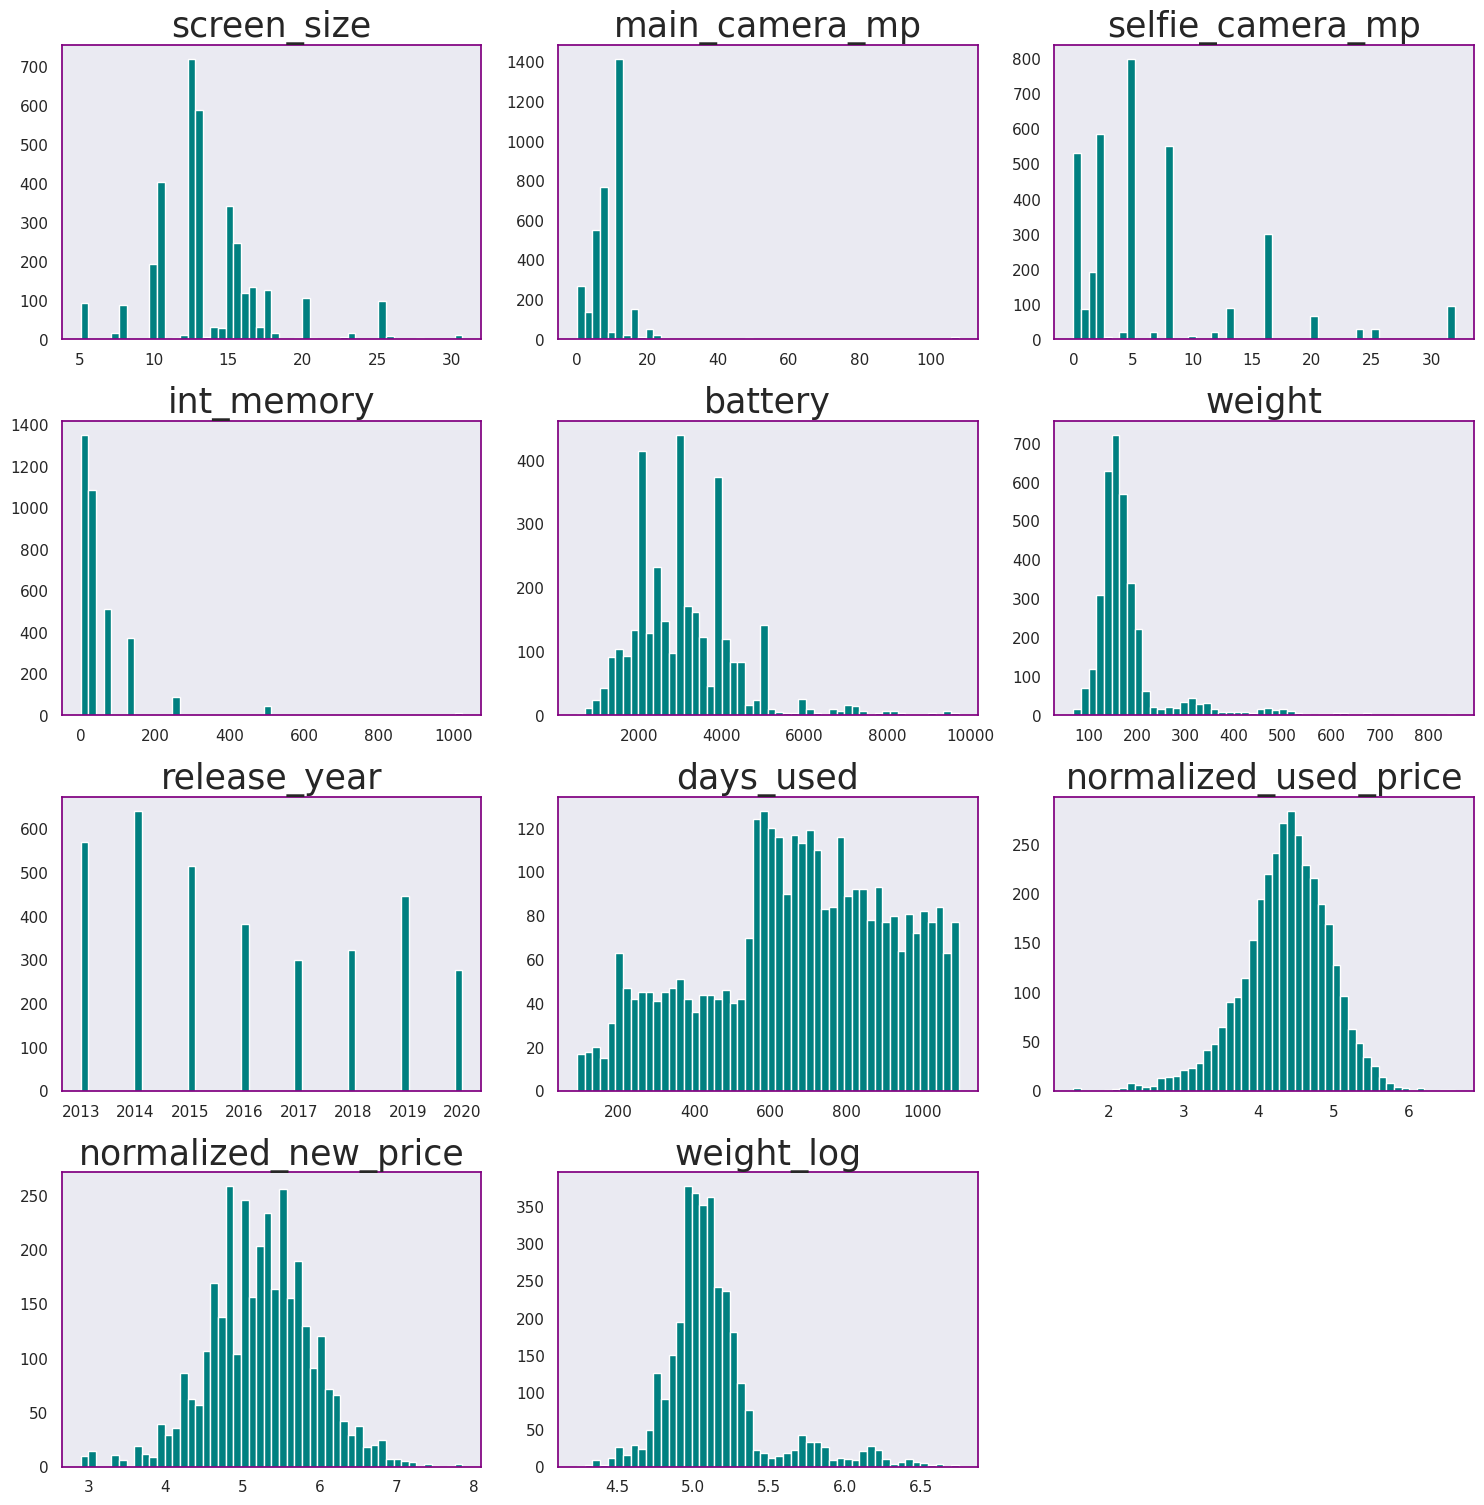

In [1226]:
# Checking the distrinbution of all numeric columns using histplot.

plt.figure(figsize=(15, 45))

for i in range(len(numeric_columns)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[numeric_columns[i]], bins=50,color = "teal")
    plt.tight_layout()
    plt.title(numeric_columns[i], fontsize=25)

plt.show()

<Figure size 1500x700 with 0 Axes>

<Axes: >

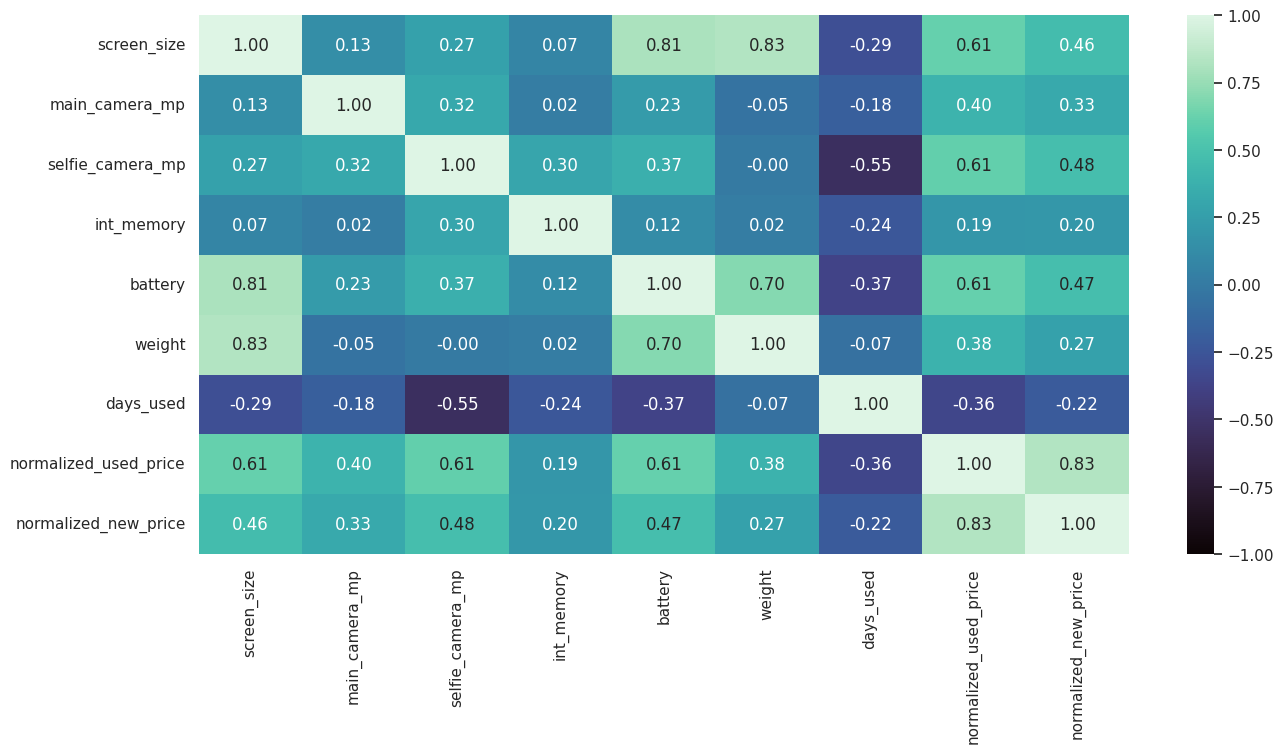

In [1227]:
cols_list = df2.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable.

cols_list.remove("release_year")
cols_list.remove("weight_log")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="mako"
)
plt.show()

There are a lot of outliers in multiple columns. <br>
Only column not to have outliers is days_used. <br>
Removing outliers could lead to missing valuable data.

**Data Preparation for Modeling**

Our goal is to predict the normalized price of used devices. <br>
Need to create a train and a test set of data.<br>
Need to build a Linear Regression model using the train data. <br>
Well use the test data set to test the model built using the train data set.


In [1228]:
df3=df2.copy()

In [1229]:
df3.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'release_year',
       'days_used', 'normalized_used_price', 'normalized_new_price',
       'device_cost_range', 'weight_log'],
      dtype='object')

In [1230]:
df3[df3.isna().any(axis=1)]

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price, device_cost_range, weight_log]
Index: []

In [1231]:
df3.shape

(3454, 16)

In [1232]:
# Define x and y variables
x = df3.drop(["normalized_used_price","weight","device_cost_range"], axis=1) #  dropping normalized_used_price", "device_cost_range", and "weight" from the data
y = df3["normalized_used_price"]

In [1233]:
# independent variable
x.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no           13.00   
1      Honor  Android        17.30  yes  yes           13.00   
2      Honor  Android        16.69  yes  yes           13.00   
3      Honor  Android        25.50  yes  yes           13.00   
4      Honor  Android        15.32  yes   no           13.00   

   selfie_camera_mp  int_memory  battery  release_year  days_used  \
0              5.00       64.00  3020.00          2020        127   
1             16.00      128.00  4300.00          2020        325   
2              8.00      128.00  4200.00          2020        162   
3              8.00       64.00  7250.00          2020        345   
4              8.00       64.00  5000.00          2020        293   

   normalized_new_price  weight_log  
0                  4.72        4.98  
1                  5.52        5.36  
2                  5.88        5.36  
3                  5.63        6.17  
4                  4.95        5.22

In [1234]:
# dependent variable
y.head()

0   4.31
1   5.16
2   5.11
3   5.14
4   4.39
Name: normalized_used_price, dtype: float64

In [1235]:
# creating dummy variables
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,  # Drop the first category to avoid multicollinearity
    dtype=int,
)  # Ensure te output is integer (numeric 0 and 1) instead of Boolean

x.head()

screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  \
0        14.50           13.00              5.00       64.00  3020.00   
1        17.30           13.00             16.00      128.00  4300.00   
2        16.69           13.00              8.00      128.00  4200.00   
3        25.50           13.00              8.00       64.00  7250.00   
4        15.32           13.00              8.00       64.00  5000.00   

   release_year  days_used  normalized_new_price  weight_log  \
0          2020        127                  4.72        4.98   
1          2020        325                  5.52        5.36   
2          2020        162                  5.88        5.36   
3          2020        345                  5.63        6.17   
4          2020        293                  4.95        5.22   

   brand_name_Alcatel  brand_name_Apple  brand_name_Asus  \
0                   0                 0                0   
1                   0                 0                0   
2                   0                 0                0   
3                   0                 0                0   
4                   0                 0                0   

   brand_name_BlackBerry  brand_name_Celkon  brand_name_Coolpad  \
0                      0                  0                   0   
1                      0                  0                   0   
2                      0                  0                   0   
3                      0                  0                   0   
4                      0                  0                   0   

   brand_name_Gionee  brand_name_Google  brand_name_HTC  brand_name_Honor  \
0                  0                  0               0                 1   
1                  0                  0               0                 1   
2                  0                  0               0                 1   
3                  0                  0               0                 1   
4                  0                  0               0                 1   

   brand_name_Huawei  brand_name_Infinix  brand_name_Karbonn  brand_name_LG  \
0                  0                   0                   0              0   
1                  0                   0                   0              0   
2                  0                   0                   0              0   
3                  0                   0                   0              0   
4                  0                   0                   0              0   

   brand_name_Lava  brand_name_Lenovo  brand_name_Meizu  brand_name_Micromax  \
0                0                  0                 0                    0   
1                0                  0                 0                    0   
2                0                  0                 0                    0   
3                0                  0                 0                    0   
4                0                  0                 0                    0   

   brand_name_Microsoft  brand_name_Motorola  brand_name_Nokia  \
0                     0                    0                 0   
1                     0                    0                 0   
2                     0                    0                 0   
3                     0                    0                 0   
4                     0                    0                 0   

   brand_name_OnePlus  brand_name_Oppo  brand_name_Others  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                0                  0   
4                   0                0                  0   

   brand_name_Panasonic  brand_name_Realme  brand_name_Samsung  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0           

In [1236]:
# splitting the data into 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

# checking the shape of the the train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [1237]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

In [1238]:
linearregression = LinearRegression()  # LinearRegression has been imported above

In [1239]:
linearregression.fit(x_train1, y_train)  # fit the dependent and independent train data

LinearRegression()

In [1240]:
# datafram to show the model coefficients and intercept
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train1.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

Coefficients
const                          0.00
screen_size                    0.02
main_camera_mp                 0.02
selfie_camera_mp               0.01
int_memory                     0.00
battery                       -0.00
release_year                   0.02
days_used                      0.00
normalized_new_price           0.44
weight_log                     0.32
brand_name_Alcatel             0.01
brand_name_Apple               0.09
brand_name_Asus                0.01
brand_name_BlackBerry         -0.07
brand_name_Celkon             -0.09
brand_name_Coolpad             0.02
brand_name_Gionee              0.04
brand_name_Google             -0.02
brand_name_HTC                -0.02
brand_name_Honor               0.03
brand_name_Huawei             -0.00
brand_name_Infinix            -1.95
brand_name_Karbonn             0.10
brand_name_LG                 -0.01
brand_name_Lava                0.03
brand_name_Lenovo              0.04
brand_name_Meizu              -0.01
brand_name_Micromax           -0.03
brand_name_Microsoft           0.08
brand_name_Motorola           -0.02
brand_name_Nokia               0.06
brand_name_OnePlus             0.09
brand_name_Oppo                0.01
brand_name_Others             -0.02
brand_name_Panasonic           0.06
brand_name_Realme              0.01
brand_name_Samsung            -0.03
brand_name_Sony               -0.07
brand_name_Spice              -0.02
brand_name_Vivo               -0.02
brand_name_XOLO                0.03
brand_name_Xiaomi              0.08
brand_name_ZTE                -0.01
os_Others                     -0.05
os_Windows                    -0.00
os_iOS                        -0.16
4g_yes                         0.05
5g_yes                        -0.01
Intercept                    -42.93

## Model Building - Linear Regression

**Linear Regression using stats model**

In [1241]:
x_train1 = x_train1.astype(float)  # Convert all columns to float
x_train1.dtypes

const                    float64
screen_size              float64
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
battery                  float64
release_year             float64
days_used                float64
normalized_new_price     float64
weight_log               float64
brand_name_Alcatel       float64
brand_name_Apple         float64
brand_name_Asus          float64
brand_name_BlackBerry    float64
brand_name_Celkon        float64
brand_name_Coolpad       float64
brand_name_Gionee        float64
brand_name_Google        float64
brand_name_HTC           float64
brand_name_Honor         float64
brand_name_Huawei        float64
brand_name_Infinix       float64
brand_name_Karbonn       float64
brand_name_LG            float64
brand_name_Lava          float64
brand_name_Lenovo        float64
brand_name_Meizu         float64
brand_name_Micromax      float64
brand_name_Microsoft     float64
brand_name_Motorola      float64
brand_name

In [1242]:
olsmodel1st = sm.OLS(y_train, x_train1)
olsres = olsmodel1st.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     276.6
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           00:51:36   Log-Likelihood:                 131.29
No. Observations:                   2417   AIC:                            -166.6
Df Residuals:                       2369   BIC:                             111.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Testing

In [1243]:
# compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# compute multiple metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [1244]:
# Checking model performance on the train set (70% data)
print("Performance Training\n")
olsmodel1st_train_perf = model_performance_regression(olsres, x_train1, y_train)
print(olsmodel1st_train_perf)

Performance Training

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.23 0.18       0.85            0.84  4.30


In [1245]:
# Checking model performance on the train set (30% data)
print("Performance Test\n")
olsmodel1st_test_perf = model_performance_regression(olsres, x_test1, y_test)
print(olsmodel1st_test_perf)

Performance Test

   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0  0.24 0.18       0.84            0.84  4.49


**Interpreting the Regression Results:**

Adjusted. R-squared: It reflects the fit of the model.<br>

Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.<br>
In our case, the value for adj. R-squared is 0.846, which is good!<br>

***const* coefficient**: It is the Y-intercept.<br>

It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient. <br>
In our case, the value for const coefficient is -42.9269. <br>
Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant). <br>

In our case, several features have negative coefficients. That means increases in these features reduces the price of the used device in very less values. <br>
The positive coefficients mean increases in those features will increase the price of used device. <br>


## Checking Linear Regression Assumptions

**Linear Regression Assumptions:**

1. No multicollinearity in independent variables
2. There should be a linear relationship between dependent and independent variables
3. The residuals should be independent of each other
4. Residuals must be normally distributed.
5. No heteroscedasticity, Residuals should have constant variance.

## Testing for Multicillinearity

**Multicollinearity:** This occurs when there is a correlation between multiple independent variables in a multiple regression model. Essentially, it means that some of the predictor variables are related to each other, which can adversely affect the regression results.

**Variance Inflation Factor (VIF):** The VIF quantifies how much the variance of a regression coefficient estimate is increased due to collinearity. Specifically, it compares the variance of a parameter estimate when fitting a full model (including other parameters) to the variance of the parameter estimate when fitting the model with only that parameter.

General Rule of Thumb:

 1. If VIF is between 1 and 5, the multicollinearity is low
 2. If VIF is between 5 and 10, the multicollinearity is moderate
 3. If VIF is higher tha 10, the multicollinearity is high

In [1246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [1247]:
checking_vif(x_train1)  # checking VIF on train1

feature        VIF
0                   const 3713721.46
1             screen_size       7.09
2          main_camera_mp       5.50
3        selfie_camera_mp       2.68
4              int_memory       1.35
5                 battery       4.06
6            release_year       4.78
7               days_used       2.65
8    normalized_new_price       2.97
9              weight_log       6.12
10     brand_name_Alcatel       3.40
11       brand_name_Apple      13.04
12        brand_name_Asus       3.33
13  brand_name_BlackBerry       1.63
14      brand_name_Celkon       1.76
15     brand_name_Coolpad       1.47
16      brand_name_Gionee       1.95
17      brand_name_Google       1.32
18         brand_name_HTC       3.41
19       brand_name_Honor       3.34
20      brand_name_Huawei       5.98
21     brand_name_Infinix       4.54
22     brand_name_Karbonn       1.57
23          brand_name_LG       4.84
24        brand_name_Lava       1.71
25      brand_name_Lenovo       4.56
26       brand_name_Meizu       2.18
27    brand_name_Micromax       3.36
28   brand_name_Microsoft       1.87
29    brand_name_Motorola       3.27
30       brand_name_Nokia       3.42
31     brand_name_OnePlus       1.44
32        brand_name_Oppo       3.97
33      brand_name_Others       9.71
34   brand_name_Panasonic       2.11
35      brand_name_Realme       1.94
36     brand_name_Samsung       7.54
37        brand_name_Sony       2.94
38       brand_name_Spice       1.69
39        brand_name_Vivo       3.65
40        brand_name_XOLO       2.14
41      brand_name_Xiaomi       3.72
42         brand_name_ZTE       3.80
43              os_Others       1.71
44             os_Windows       1.59
45                 os_iOS      11.73
46                 4g_yes       2.45
47                 5g_yes       1.42

There are several columns with high VIF so there is definitely multicollinearity. <br>
High VIF columns will need to be dropped. <br>
Columns higher than 10 are brand_name_Apple and os_IOS. <br>
Columns between 5 and 10 are screen_size, main_camera_mp, weight_log, brand_name_Huawei, brand_name_Others, and brand_name_Samsung.


In [1248]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [1249]:
pd.set_option("display.float_format", lambda x: "{:.6f}".format(x))

In [1250]:
col_list = [
    "screen_size",
    "main_camera_mp",
    "weight_log",
    "brand_name_Apple",
    "brand_name_Huwawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_ios"
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res


col  Adj. R-squared after_dropping col  \
0   brand_name_Others                           0.842833   
1    brand_name_Apple                           0.842823   
2  brand_name_Samsung                           0.842817   
3  brand_name_Huwawei                           0.842779   
4              os_ios                           0.842779   
5         screen_size                           0.840189   
6          weight_log                           0.836707   
7      main_camera_mp                           0.830043   

   RMSE after dropping col  
0                 0.231448  
1                 0.231455  
2                 0.231460  
3                 0.231488  
4                 0.231488  
5                 0.233387  
6                 0.235916  
7                 0.240681

In [1251]:
# dropping "brand_name_Others" and check of VIF again.
col_to_drop = "brand_name_Others"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


feature            VIF
0                   const 3713060.846677
1             screen_size       7.042135
2          main_camera_mp       5.496114
3        selfie_camera_mp       2.679081
4              int_memory       1.349697
5                 battery       4.063285
6            release_year       4.778269
7               days_used       2.649911
8    normalized_new_price       2.967449
9              weight_log       6.100547
10     brand_name_Alcatel       1.218717
11       brand_name_Apple      12.187532
12        brand_name_Asus       1.203185
13  brand_name_BlackBerry       1.128476
14      brand_name_Celkon       1.160724
15     brand_name_Coolpad       1.054235
16      brand_name_Gionee       1.090693
17      brand_name_Google       1.046893
18         brand_name_HTC       1.224358
19       brand_name_Honor       1.284828
20      brand_name_Huawei       1.509942
21     brand_name_Infinix       4.266932
22     brand_name_Karbonn       1.076962
23          brand_name_LG       1.353189
24        brand_name_Lava       1.071322
25      brand_name_Lenovo       1.301168
26       brand_name_Meizu       1.136850
27    brand_name_Micromax       1.227856
28   brand_name_Microsoft       1.494295
29    brand_name_Motorola       1.258473
30       brand_name_Nokia       1.464409
31     brand_name_OnePlus       1.078806
32        brand_name_Oppo       1.376836
33   brand_name_Panasonic       1.107531
34      brand_name_Realme       1.165281
35     brand_name_Samsung       1.600712
36        brand_name_Sony       1.214444
37       brand_name_Spice       1.080180
38        brand_name_Vivo       1.328857
39        brand_name_XOLO       1.125674
40      brand_name_Xiaomi       1.313988
41         brand_name_ZTE       1.266371
42              os_Others       1.705367
43             os_Windows       1.587232
44                 os_iOS      11.730873
45                 4g_yes       2.444886
46                 5g_yes       1.423004

Removing brand_name_Others time changed the VIF for brand_name_Apple, brand_name_Huawei, and brand_name_Samsung.

In [1252]:
#Removing from the list VIFs less than 5
col_list = [
    "screen_size",
    "main_camera_mp",
    "weight_log",
    "brand_name_Apple",
    "os_ios"
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

col  Adj. R-squared after_dropping col  \
0  brand_name_Apple                           0.842866   
1            os_ios                           0.842833   
2       screen_size                           0.840200   
3        weight_log                           0.836774   
4    main_camera_mp                           0.830115   

   RMSE after dropping col  
0                 0.231424  
1                 0.231448  
2                 0.233378  
3                 0.235867  
4                 0.240630

There was minimal change for the R-squared and RMSE

In [1253]:
# dropping "oos_iOS" and check of VIF again.
col_to_drop = "os_iOS"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


feature            VIF
0                   const 3711987.203394
1             screen_size       6.961123
2          main_camera_mp       5.491045
3        selfie_camera_mp       2.673669
4              int_memory       1.349599
5                 battery       4.057882
6            release_year       4.776775
7               days_used       2.649412
8    normalized_new_price       2.965480
9              weight_log       6.068362
10     brand_name_Alcatel       1.218643
11       brand_name_Apple       1.215072
12        brand_name_Asus       1.203077
13  brand_name_BlackBerry       1.125644
14      brand_name_Celkon       1.160591
15     brand_name_Coolpad       1.054230
16      brand_name_Gionee       1.090658
17      brand_name_Google       1.046759
18         brand_name_HTC       1.224278
19       brand_name_Honor       1.284312
20      brand_name_Huawei       1.509344
21     brand_name_Infinix       4.262662
22     brand_name_Karbonn       1.076832
23          brand_name_LG       1.353189
24        brand_name_Lava       1.071212
25      brand_name_Lenovo       1.301095
26       brand_name_Meizu       1.136828
27    brand_name_Micromax       1.227826
28   brand_name_Microsoft       1.493899
29    brand_name_Motorola       1.258416
30       brand_name_Nokia       1.456619
31     brand_name_OnePlus       1.078729
32        brand_name_Oppo       1.376836
33   brand_name_Panasonic       1.107508
34      brand_name_Realme       1.164948
35     brand_name_Samsung       1.599714
36        brand_name_Sony       1.214436
37       brand_name_Spice       1.079532
38        brand_name_Vivo       1.328477
39        brand_name_XOLO       1.125607
40      brand_name_Xiaomi       1.313743
41         brand_name_ZTE       1.266319
42              os_Others       1.609764
43             os_Windows       1.584997
44                 4g_yes       2.443500
45                 5g_yes       1.422500

Dropping os_iOS brought the VIP for brand_name_Apple down to 1.20.

In [1254]:
#Removing from the list VIFs less than 5
col_list = [
    "screen_size",
    "main_camera_mp",
    "weight_log",
       ]


res = treating_multicollinearity(x_train3, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0     screen_size                           0.840055                 0.233484
1      weight_log                           0.836833                 0.235825
2  main_camera_mp                           0.830034                 0.240688

Not seeing any big changes from the removal of os_iOS.

In [1255]:
# dropping "screen_size" and check of VIF again.
col_to_drop = "screen_size"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature            VIF
0                   const 3642036.237228
1          main_camera_mp       5.490024
2        selfie_camera_mp       2.673225
3              int_memory       1.347985
4                 battery       3.729073
5            release_year       4.698296
6               days_used       2.644402
7    normalized_new_price       2.942854
8              weight_log       3.105616
9      brand_name_Alcatel       1.202472
10       brand_name_Apple       1.213353
11        brand_name_Asus       1.202095
12  brand_name_BlackBerry       1.125372
13      brand_name_Celkon       1.159376
14     brand_name_Coolpad       1.052585
15      brand_name_Gionee       1.089449
16      brand_name_Google       1.046755
17         brand_name_HTC       1.223400
18       brand_name_Honor       1.267997
19      brand_name_Huawei       1.496721
20     brand_name_Infinix       4.262179
21     brand_name_Karbonn       1.068689
22          brand_name_LG       1.351833
23        brand_name_Lava       1.068629
24      brand_name_Lenovo       1.296695
25       brand_name_Meizu       1.135736
26    brand_name_Micromax       1.225362
27   brand_name_Microsoft       1.493735
28    brand_name_Motorola       1.258410
29       brand_name_Nokia       1.455713
30     brand_name_OnePlus       1.077064
31        brand_name_Oppo       1.373142
32   brand_name_Panasonic       1.104337
33      brand_name_Realme       1.164948
34     brand_name_Samsung       1.591812
35        brand_name_Sony       1.213313
36       brand_name_Spice       1.079277
37        brand_name_Vivo       1.320419
38        brand_name_XOLO       1.118077
39      brand_name_Xiaomi       1.312963
40         brand_name_ZTE       1.264329
41              os_Others       1.501386
42             os_Windows       1.584486
43                 4g_yes       2.437756
44                 5g_yes       1.417622

weight_log VIF went to 3.12, main_camera_mp did not change.

In [1256]:
#Removing from the list VIFs less than 5
col_list = [
    "main_camera_mp",
    "weight_log",
       ]


res = treating_multicollinearity(x_train4, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  main_camera_mp                           0.827108                 0.242750
1      weight_log                           0.814299                 0.251582

Not removing screen_size because it lowers the r-squared and RMSE.

In [1257]:
# dropping "weight_log" and check of VIF again.
col_to_drop = "weight_log"
x_train5 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test5 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


feature            VIF
0                   const 3658621.476742
1             screen_size       3.562506
2          main_camera_mp       5.296387
3        selfie_camera_mp       2.657013
4              int_memory       1.349077
5                 battery       3.684865
6            release_year       4.723441
7               days_used       2.645465
8    normalized_new_price       2.944632
9      brand_name_Alcatel       1.210645
10       brand_name_Apple       1.215033
11        brand_name_Asus       1.202666
12  brand_name_BlackBerry       1.125436
13      brand_name_Celkon       1.160589
14     brand_name_Coolpad       1.052807
15      brand_name_Gionee       1.087644
16      brand_name_Google       1.045393
17         brand_name_HTC       1.220174
18       brand_name_Honor       1.269667
19      brand_name_Huawei       1.496749
20     brand_name_Infinix       4.177190
21     brand_name_Karbonn       1.071017
22          brand_name_LG       1.340184
23        brand_name_Lava       1.066652
24      brand_name_Lenovo       1.297118
25       brand_name_Meizu       1.133968
26    brand_name_Micromax       1.220541
27   brand_name_Microsoft       1.493859
28    brand_name_Motorola       1.258245
29       brand_name_Nokia       1.451806
30     brand_name_OnePlus       1.075772
31        brand_name_Oppo       1.365637
32   brand_name_Panasonic       1.102077
33      brand_name_Realme       1.164280
34     brand_name_Samsung       1.581888
35        brand_name_Sony       1.214038
36       brand_name_Spice       1.079528
37        brand_name_Vivo       1.314890
38        brand_name_XOLO       1.108586
39      brand_name_Xiaomi       1.309304
40         brand_name_ZTE       1.261974
41              os_Others       1.588377
42             os_Windows       1.584635
43                 4g_yes       2.435027
44                 5g_yes       1.421179

In [1258]:
#Removing from the list VIFs less than 5
col_list = [
    "screen_size",
    "main_camera_mp",
           ]


res = treating_multicollinearity(x_train5, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  main_camera_mp                           0.826802                 0.242965
1     screen_size                           0.814299                 0.251582

Not removing weight_log because it lowers the r-squared and RMSE.

In [1259]:

col_list = [
    "screen_size",
    "weight_log",
    "main_camera_mp",
           ]


res = treating_multicollinearity(x_train3, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0     screen_size                           0.840055                 0.233484
1      weight_log                           0.836833                 0.235825
2  main_camera_mp                           0.830034                 0.240688

Not removing weight_log it caused the R-squared and RMSE to go down.

In [1260]:
# dropping "main_camera_mp" and check of VIF again.
col_to_drop = "main_camera_mp"
x_train6 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test6 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  main_camera_mp


feature            VIF
0                   const 3678639.957204
1             screen_size       6.959828
2        selfie_camera_mp       2.651766
3              int_memory       1.328239
4                 battery       4.021472
5            release_year       4.732022
6               days_used       2.627358
7    normalized_new_price       2.523537
8              weight_log       5.853238
9      brand_name_Alcatel       1.213304
10       brand_name_Apple       1.206641
11        brand_name_Asus       1.202294
12  brand_name_BlackBerry       1.125119
13      brand_name_Celkon       1.157179
14     brand_name_Coolpad       1.053651
15      brand_name_Gionee       1.090658
16      brand_name_Google       1.046274
17         brand_name_HTC       1.224182
18       brand_name_Honor       1.277908
19      brand_name_Huawei       1.508807
20     brand_name_Infinix       1.055217
21     brand_name_Karbonn       1.074747
22          brand_name_LG       1.337416
23        brand_name_Lava       1.071120
24      brand_name_Lenovo       1.300870
25       brand_name_Meizu       1.131783
26    brand_name_Micromax       1.227795
27   brand_name_Microsoft       1.493299
28    brand_name_Motorola       1.233141
29       brand_name_Nokia       1.447914
30     brand_name_OnePlus       1.078523
31        brand_name_Oppo       1.374457
32   brand_name_Panasonic       1.106172
33      brand_name_Realme       1.153660
34     brand_name_Samsung       1.587014
35        brand_name_Sony       1.186538
36       brand_name_Spice       1.079493
37        brand_name_Vivo       1.325080
38        brand_name_XOLO       1.124899
39      brand_name_Xiaomi       1.303664
40         brand_name_ZTE       1.257817
41              os_Others       1.601495
42             os_Windows       1.584996
43                 4g_yes       2.328379
44                 5g_yes       1.391042

weight_log goes down some, screen_size stays the same

In [1261]:
#Removing from the list VIFs less than 5
col_list = [
    "screen_size",
    "weight_log",
    "main_camera_mp"
           ]


res = treating_multicollinearity(x_train6, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  main_camera_mp                           0.830034                 0.240688
1     screen_size                           0.827108                 0.242750
2      weight_log                           0.826802                 0.242965

In [1262]:
#Removing from the list VIFs less than 5
col_list = [
    "screen_size",
    "weight_log",
    "main_camera_mp"
           ]


res = treating_multicollinearity(x_train3, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0     screen_size                           0.840055                 0.233484
1      weight_log                           0.836833                 0.235825
2  main_camera_mp                           0.830034                 0.240688

Will be using x_train3 as our final train.

In [1263]:
olsmode2nd = sm.OLS(y_train, x_train3)
olsres2 = olsmode2nd.fit()
print(olsres2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     288.9
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           00:51:40   Log-Likelihood:                 130.59
No. Observations:                   2417   AIC:                            -169.2
Df Residuals:                       2371   BIC:                             97.18
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [1264]:
# initial list of columns
cols = x_train3.columns.tolist()

# setting an initial max p-value
max_p_value = 1

# Loop to check for p-values of the variables and drop the column with the highest p-value.
while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train3[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols  # variables with p-values lesser than 0.05
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'battery', 'release_year', 'normalized_new_price', 'weight_log', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [1265]:
x_train7 = x_train3[selected_features]
x_test7 = x_test3[selected_features]

In [1266]:
olsmode3rd = sm.OLS(y_train, x_train7)
olsres3 = olsmode3rd.fit()
print(olsres3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     866.5
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           00:51:40   Log-Likelihood:                 117.57
No. Observations:                   2417   AIC:                            -203.1
Df Residuals:                       2401   BIC:                            -110.5
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observation**

Based on the R-squared going down on the olsres3, I will use olsres2 as my final model and the features in x_train 3 as my final set of predictor variables. <br>
The adjusted R-squared in olsres3 was 84.4%. This shows that the variables we dropped had minimal affect on the model. The featured model went down ~.2%. olsres was 84.6%.<br>
Our model is able to explain ~84.4% of the variance. This shows the model is good.


## Testing for Linearity and Independence

**Why do we do this test?**

Linearity describes a straight-line relationship between two variables, where predictor variables must have a linear relation with the dependent variable. <br>
Assessing model assumptions is crucial because all the estimates, intervals, and hypothesis tests in regression analysis rely on the correctness of the model assumptions12. If any assumptions are violated, it’s essential to address them appropriately to ensure reliable results.

**How to check linearity and independence?**

Make a plot of fitted values vs residuals.
If they don't follow any pattern, then we say the model is linear and residuals are independent.
If they follow a pattern, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

We can try to transform the variables and make the relationships linear.

In [1267]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsres2.fittedvalues  # predicted values
df_pred["Residuals"] = olsres2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.857981   0.229507
1525       4.448399       4.658666  -0.210266
1128       4.315353       4.326174  -0.010821
3003       4.282068       4.222787   0.059281
2907       4.456438       4.462717  -0.006279

<Axes: xlabel='Fitted Values', ylabel='Residuals'>

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Fitted vs Residual plot')

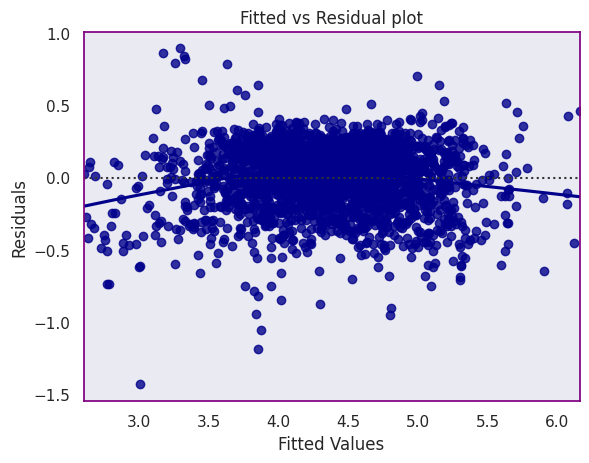

In [1268]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="darkblue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

This scatter plot shows the distribution of residual(errors) vs fitted values (predicted values).

The Fitted Values are mainly between 1.2 and 1.7. Most of the residuals are between -0.2 and .1. <br>
There is no pattern in the plot above.<br>
The assumptions of linearity and independence are satisfied.  

## Testing for Normality

**Why do the test?**

**Error Terms and Normality**
In linear regression, we assume that the error terms (also known as residuals) follow a normal distribution. These error terms represent the difference between the observed values and the predicted values from the regression model. When the error terms are normally distributed, it implies that the model assumptions are met, and our statistical inferences (such as confidence intervals and hypothesis tests) are valid. However, if the error terms deviate significantly from normality, it can impact the reliability of our regression results.

**Checking Normality:**

One way to assess the normality of error terms is by creating a normal probability plot of the residuals.
Here’s how it works:

*  We plot the theoretical percentiles of a standard normal distribution against the observed sample percentiles of the residuals.
*  If the resulting plot is approximately linear, we can assume that the error terms are normally distributed.
*  The diagonal line on the plot helps us assess the linearity between the theoretical and sample percentiles.

If the plot deviates significantly from linearity, it suggests non-normality of the error terms.

**Interpretation of Normal Probability Plot:**

*   **Linear Relationship: **If the normal probability plot of residuals is approximately linear, it supports the assumption that error terms are  
     normally distributed.
*   **Non-Normality:** If the plot shows deviations (e.g., curvature or outliers), it indicates non-normality. In such cases:

      *  Confidence intervals for regression coefficients may be unreliable.
      *  Coefficient estimates based on least squares minimization may be affected.
      *  Unusual data points (outliers) should be investigated to improve the model.

**Additional Considerations:**

*   Keep in mind that the normality assumption applies to the error terms, not necessarily the dependent or independent variables.
*   Statistical software often provides normality tests, but visual assessment using the normal probability plot is valuable.





<Axes: xlabel='Residuals', ylabel='Count'>

Text(0.5, 1.0, 'Normality of residuals')

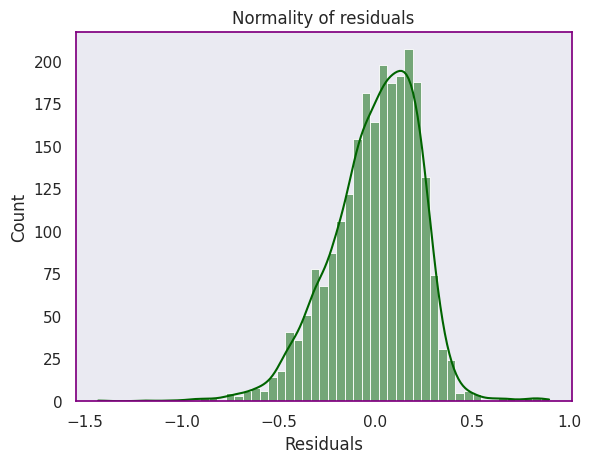

In [1269]:
sns.histplot(data=df_pred, x="Residuals", kde=True, color= "darkgreen" )
plt.title("Normality of residuals")
plt.show()

The histogram has a bell shape. <br>
Appears to be a normal distribution.

Text(0.5, 1.0, '')

Text(0.5, 0, 'Quantiles')

Text(0, 0.5, 'Ordered Values')

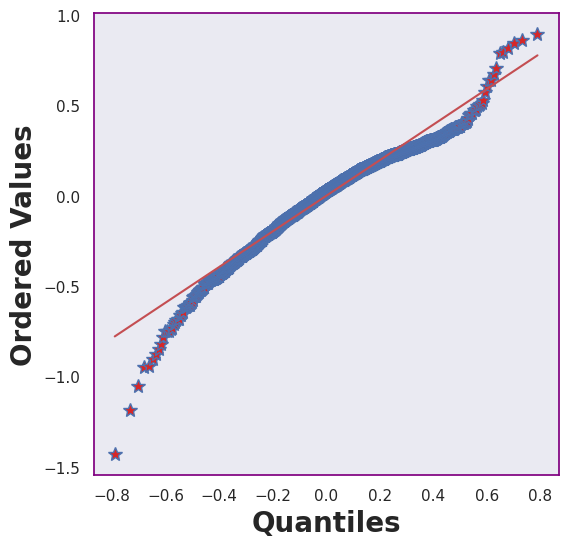

In [1270]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'df_pred' contains the data you want to plot
# Replace 'data' with your actual data
data = df_pred["Residuals"]

# Fit the distribution (you already have this part)
d = getattr(stats, 'norm')
param = d.fit(data)

# Create the probability plot
fig = plt.figure(figsize=[6, 6], dpi=100)
ax = fig.add_subplot(111)
res = stats.probplot(data, dist='norm', sparams=param, plot=plt, fit=True)

# Customize the markers
ax.get_lines()[0].set_marker('*')  # Set marker style (e.g., 'p' for pentagon)
ax.get_lines()[0].set_markerfacecolor('tab:red')  # Set marker color
ax.get_lines()[0].set_markersize(10.0)  # Set marker size

# Customize other plot features
ax.set_title("")  # Remove title
ax.set_xlabel("Quantiles", fontsize=20, fontweight='bold')
ax.set_ylabel("Ordered Values", fontsize=20, fontweight='bold')

plt.show()

The residuals for the most part are a straight line except for the tails.

In [1271]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9687750935554504, pvalue=1.644691178803239e-22)

Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test. <br>
Per the test the residuals are not normal. <br>
Since this iss an approximation, we can accept this distribution as close to being normal. <br>
As a result, the assumption is satisfied.

## Testing for Homoscedasticity

**Homoscedasticity:** <br>
Homoscedasticity refers to the condition where the dispersion of error terms (or residuals) remains consistent across the full range of values of the independent variable(s).<br>
When residuals exhibit homoscedasticity, statistical inferences are more reliable and valid. <br>

**Heteroscedasticity:** <br>
Heteroscedasticity occurs when the dispersion of error terms does not maintain consistency across all levels of the independent variable(s). <br>
Heteroscedasticity can lead to unreliable test statistics, standard errors, and hypothesis tests. <br>

**Checking for Homoscedasticity:** <br>

The residual versus fitted values plot provides a visual way to assess homoscedasticity. In cases of heteroscedasticity, the residuals may exhibit non-symmetrical shapes, such as forming an arrow pattern <br>

If the p-value from the Goldfeld-Quandt test is greater than 0.05, we fail to reject the null hypothesis of homoscedasticity. In other words, we do not have sufficient evidence to conclude that the variance of the errors (residuals) differs across different subsets of the data.<br>
      
*   Null hypothesis: Residuals are homoscedastic <br>
*   Alternate hypothesis: Residuals have heteroscedasticity




In [1272]:
# goldfeldquandt test for homoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.069816803115121), ('p-value', 0.12503805606566432)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. The assumption is satisfied.

## Final Model

In [1273]:
olsmodel_final_featured = sm.OLS(y_train, x_train7).fit() # Running the final model
print(olsmodel_final_featured.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     866.5
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           00:51:42   Log-Likelihood:                 117.57
No. Observations:                   2417   AIC:                            -203.1
Df Residuals:                       2401   BIC:                            -110.5
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1274]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() # Running the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     288.9
Date:                   Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                           00:51:42   Log-Likelihood:                 130.59
No. Observations:                   2417   AIC:                            -169.2
Df Residuals:                       2371   BIC:                             97.18
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [1275]:
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(x_train7.columns)):
    if i == 0:
        print(np.round(olsmodel_final_featured.params[i], 4), "+", end=" ")
    elif i != len(x_train7.columns) - 1:
        print(
            "(",
            np.round(olsmodel_final_featured.params[i], 4),
            ")*(",
            x_train7.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmodel_final_featured.params[i], 4), ")*(", x_train7.columns[i], ")")

Used Phone Price = -37.566 + ( 0.0219 )*( screen_size ) +  ( 0.0212 )*( main_camera_mp ) +  ( 0.0149 )*( selfie_camera_mp ) +  ( -0.0 )*( battery ) +  ( 0.0186 )*( release_year ) +  ( 0.434 )*( normalized_new_price ) +  ( 0.305 )*( weight_log ) +  ( -1.9949 )*( brand_name_Infinix ) +  ( 0.1081 )*( brand_name_Karbonn ) +  ( 0.0467 )*( brand_name_Lenovo ) +  ( 0.0659 )*( brand_name_Nokia ) +  ( -0.0598 )*( brand_name_Sony ) +  ( 0.0877 )*( brand_name_Xiaomi ) +  ( -0.0662 )*( os_Others ) +  ( 0.0469 )*( 4g_yes )


In [1276]:
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(np.round(olsmodel_final.params[i], 4), "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            "(",
            np.round(olsmodel_final.params[i], 4),
            ")*(",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmodel_final.params[i], 4), ")*(", x_train3.columns[i], ")")

Used Phone Price = -43.0446 + ( 0.0211 )*( screen_size ) +  ( 0.0208 )*( main_camera_mp ) +  ( 0.0145 )*( selfie_camera_mp ) +  ( 0.0001 )*( int_memory ) +  ( -0.0 )*( battery ) +  ( 0.0213 )*( release_year ) +  ( 0.0 )*( days_used ) +  ( 0.4371 )*( normalized_new_price ) +  ( 0.3177 )*( weight_log ) +  ( 0.0243 )*( brand_name_Alcatel ) +  ( -0.0462 )*( brand_name_Apple ) +  ( 0.0222 )*( brand_name_Asus ) +  ( -0.0535 )*( brand_name_BlackBerry ) +  ( -0.0725 )*( brand_name_Celkon ) +  ( 0.0349 )*( brand_name_Coolpad ) +  ( 0.0553 )*( brand_name_Gionee ) +  ( -0.0085 )*( brand_name_Google ) +  ( 0.001 )*( brand_name_HTC ) +  ( 0.0459 )*( brand_name_Honor ) +  ( 0.0135 )*( brand_name_Huawei ) +  ( -1.9342 )*( brand_name_Infinix ) +  ( 0.1181 )*( brand_name_Karbonn ) +  ( 0.0013 )*( brand_name_LG ) +  ( 0.0456 )*( brand_name_Lava ) +  ( 0.0551 )*( brand_name_Lenovo ) +  ( 0.0073 )*( brand_name_Meizu ) +  ( -0.0144 )*( brand_name_Micromax ) +  ( 0.0961 )*( brand_name_Microsoft ) +  ( -0.00

**Predict Used Phone Price**

We will utilize the metric functions provided by scikit-learn (sklearn) to calculate the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) scores. <br>

We will create a function to compute the Mean Absolute Percentage Error (MAPE) and the adjusted R-squared. <br>

The mean absolute percentage error (MAPE) quantifies the accuracy of predictions as a percentage. It is calculated by taking the average of the absolute percent errors between predicted values and actual values, divided by the actual values. MAPE is particularly useful when extreme values are absent from the data and none of the actual values are zero. <br>

We will create a function that consolidates all the above metrics into a single output.

In [1277]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [1278]:
# predictions on the test set
pred = olsmodel_final.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995 4.566741   4.364696
2341 3.696103   3.969256
1913 3.592093   3.602651
688  4.306495   4.106764
650  4.522115   5.129626
2291 4.259294   4.390414
40   4.997685   5.391301
1884 3.875359   4.023592
2538 4.206631   4.003159
45   5.380450   5.275084

In [1279]:
# predictions on the test set
pred = olsmodel_final_featured.predict(x_test7)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995 4.566741   4.371731
2341 3.696103   3.971332
1913 3.592093   3.636821
688  4.306495   4.124797
650  4.522115   5.176730
2291 4.259294   4.399474
40   4.997685   5.384732
1884 3.875359   4.040823
2538 4.206631   4.029145
45   5.380450   5.274014

Our model is working as expected. <br>
Actual and predicted amounts are extremely comparable.

<Axes: >

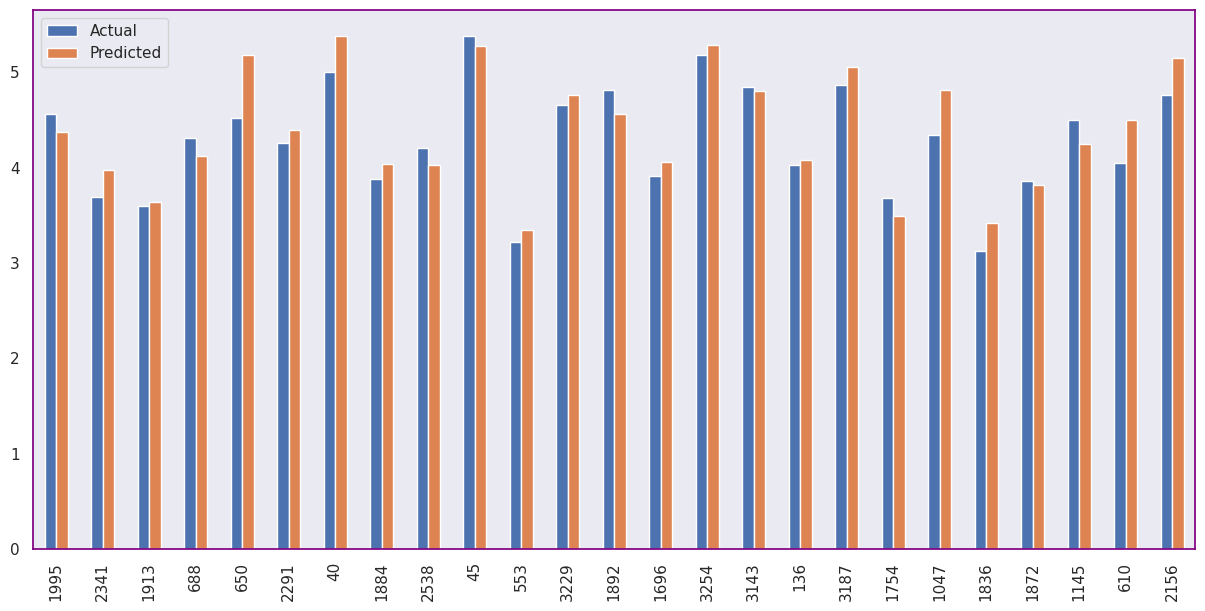

In [1280]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

In [1281]:
x_train7.columns # checking the columns of final train data

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'battery',
       'release_year', 'normalized_new_price', 'weight_log',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_Lenovo',
       'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others',
       '4g_yes'],
      dtype='object')

In [1282]:
x_test7.columns # checking the columns of final test data

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'battery',
       'release_year', 'normalized_new_price', 'weight_log',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_Lenovo',
       'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others',
       '4g_yes'],
      dtype='object')

In [1283]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmodel_final_train_perf

Training Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0 0.229244 0.179283   0.845748        0.842754 4.304175

In [1284]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_featured_train_perf = model_performance_regression(olsmodel_final_featured, x_train7, y_train)
olsmodel_final_featured_train_perf

Training Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0 0.230483 0.180064   0.844077        0.843037 4.321079

In [1285]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmodel_final_test_perf

Test Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0 0.237867 0.184334   0.843127        0.835838 4.493195

In [1286]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_featured_test_perf = model_performance_regression(olsmodel_final_featured, x_test7, y_test)
olsmodel_final_featured_test_perf

Test Performance



RMSE      MAE  R-squared  Adj. R-squared     MAPE
0 0.236896 0.183564   0.844405        0.841964 4.473149

**Observations**

Based on olsmodel_final_featured.

The model is able to explain ~84.4% of the variation in the data, which is very good.

The train and test RMSE and MAE are low and comparable. Our model is not suffering from overfitting. The model is performing well and making accurate predictions.

The MAPE on the test set suggests the model’s predictions have an absolute percentage error of approximately 4.32% of the used_price_log.

We can confidently state that the OLS model olsmodel_final is suitable for both prediction and inference purposes.

In [1287]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel1st_train_perf.T, olsmodel_final_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.229178                       0.229244
MAE                              0.179158                       0.179283
R-squared                        0.845837                       0.845748
Adj. R-squared                   0.842713                       0.842754
MAPE                             4.301420                       4.304175

In [1288]:
# training performance comparison

models_train_comp_df = pd.concat(
    [olsmodel1st_train_perf.T, olsmodel_final_featured_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.229178                       0.230483
MAE                              0.179158                       0.180064
R-squared                        0.845837                       0.844077
Adj. R-squared                   0.842713                       0.843037
MAPE                             4.301420                       4.321079

In [1289]:
# test performance comparison

models_test_comp_df = pd.concat(
    [olsmodel1st_test_perf.T, olsmodel_final_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression sklearn  Linear Regression statsmodels
RMSE                             0.237835                       0.237867
MAE                              0.184359                       0.184334
R-squared                        0.843169                       0.843127
Adj. R-squared                   0.835550                       0.835838
MAPE                             4.493813                       4.493195

Not any significan differences between the two models.

## Conclusions and Recommendations

**Interpretation of R-squared**

The R-squared value tells us that our model can explain 84.4% of the variance in the training set.


**Interpretation of Coefficients**

The following factors are influencing the price of a used phone based on our model: screen_size, main_camera_mp, selfie_camera_mp, battery, release_year, normalized_new_price, weight_log, brand_name_Infinix, brand_name_Karbonn, brand_name_Lenovo, brand_name_Nokia, brand_name_Sony, brand_name_Xiaomi, os_Others, and 4g_yes. <br>

The normalized_new_price is statistically significant in determining the used price. 1 euro increase in price of new phone will lead to an increase price of used phone by 0.4340 euros. <br>

Battery size, os_Others, brand_name_Infinix, and brand_name_Sony has a negtive impact on the price of a used phone. <br>

After normalized_new_price: main_camera_mp, selfie_camera_mp, brand_name_Infinix, and weight_log have the biggest impact on the  price of a used phone.

Based on the heat map produced on the original data I would have assumed screen_size, selfie_camera_mp, battery, and release_year would have more of an impact than they do on the price of a used phone.


**Interpretation of p-values (P > |t|)**

For each predictor variable there is a null hypothesis and alternate hypothesis.

Null hypothesis : Predictor variable is not significant

*   Null hypothesis : Predictor variable is not significant
*   Alternate hypothesis : Predictor variable is significant

There are no variables with the P_value>0.05, hence we can say the predictor variable is significant in this data set.

**Linear Regression Assumptions**

All of the assumptions for linear regression were met for the model
   
1. Linearity of dependent and independent variables <br>
2. ⁠Independence of residuals <br>
3. ⁠Homoscedasticity of residuals <br>
4. ⁠Normality of residuals <br>
5. ⁠No to little multicolinearity




**Recommendation**

Although the olsmodel_final model shows a R-squared rate of 84.6% we recommend using the olsmodel_final_featured model which has an R-squared of 84.4%. This is because the olsmodel_final_featured are giving better predicted cost vs actual than the oldmodel_final. <br>
The olsmodel_final_featured model can be used to accurately predict the price of the used phone. <br>
Investments in the brands that have negative coefficents should be reduced as they do not have a good used/resale price. <br>
Phones with higher new prices should be focused on more as they have higher used/resale prices.coefficients


In [1291]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/Python_Course/Project_3/SLF_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Python_Course/Project_3/SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 5814686 bytes to /content/drive/MyDrive/Python_Course/Project_3/SLF_Project_LearnerNotebook_FullCode.html


-


___